In [204]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import matplotlib.pyplot as plt
import pandas as pd
from src.model import BasicModel
import numpy as np
from scipy.interpolate import interp1d

plt.rcParams['figure.figsize'] = 15.7,13.27
plt.rcParams['font.family'] = 'AppleGothic'

class LEARN_INFO:
    def __init__(self, name, columns, is_contain_cluster_label=False, matching_type="general", jump=3):
        self.name = name
        self.columns = columns
        self.is_label = is_contain_cluster_label
        self.matching = matching_type
        self.jump = jump
    

# INPUT_REPORT_SIMULATION = [
#     LEARN_INFO(name="univariate", columns=['energy (kw 15min)'], is_contain_cluster_label=False),
#     LEARN_INFO(name="with cluster label", columns=['energy (kw 15min)'], is_contain_cluster_label=True),
# ]

DEFAULT_COLUMNS = [
    'energy (kw 15min)',
    ['week sin',
    'week cos'],
    ['year sin',
    'year cos'],
    'season idx',
    'weather idx',
    'avg ta',
    'avg rhm'
]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [213]:
_ = {
    "univariate": ['energy (kw 15min)'],
    "multivariate (week)": [
        'energy (kw 15min)',
        'week sin',
        'week cos'
    ],
#     "multivariate (year)": [
#         'energy (kw 15min)',
#         'year sin',
#         'year cos',
#     ],
    "multivariate (weather)": [
        'energy (kw 15min)',
        'weather idx'
    ],
#     "multivariate (avg ta)": [
#         'energy (kw 15min)',
#         'avg ta'
#     ],
#     "multivariate (avg rhm)": [
#         'energy (kw 15min)',
#         'avg rhm'
#     ],
#     "multivariate (season)": [
#         'energy (kw 15min)',
#         'season idx'
#     ]
}

# Input Report Simulation
IRS = []

for key in _.keys():
    IRS.append(
        LEARN_INFO(name="{} / with cluster".format(key), 
                   columns=_[key], 
                   is_contain_cluster_label=True),
    )
    
    
for key in _.keys():
    IRS.append(
        LEARN_INFO(name=key, 
                   columns=_[key], 
                   is_contain_cluster_label=False),
    )

# Training Model Array 
TMA = []

is_switch = False

for _ in IRS:
    bm = BasicModel(name=_.name,
                   columns=_.columns,
                   is_contain_cluster_label=_.is_label,
                   is_switch=is_switch,
                   matching_type=_.matching)
    
    bm.set_window()
    bm.set_model()
    print(bm)
    bm.training(epochs=50)
    
    bm.set_predict(is_reshape=True)
    bm.set_predict(is_reshape=True, is_val_datas=True)
    
    TMA.append(bm)
    
test_evaluate_df = pd.DataFrame();
val_evaluate_df = pd.DataFrame();

for _ in TMA:
    test_evaluate_df = test_evaluate_df.append(_.statistic(), ignore_index=True)
    val_evaluate_df = val_evaluate_df.append(_.statistic(is_val_datas=True), ignore_index=True)
    
test_evaluate_df.index = [_.name for _ in TMA]
val_evaluate_df.index = [_.name for _ in TMA]

###### [Notice] (multivariate (weather)) set predict (validation) info start ###### 

0 / 91
50 / 91
91 / 91 complete.

###### [Notice] set predict info success ###### 



In [214]:
test_evaluate_df

,cos,ecv,mae,map,mean dis,mean sim,mse,tss,wss
univariate / with cluster,0.956976,82.992173,0.191444,0.011358,1.125267,0.947374,0.069003,1456.910039,247.788742
multivariate (week) / with cluster,0.957154,83.684677,0.185685,0.006700,1.085605,0.949234,0.066193,1456.910039,237.699585
multivariate (weather) / with cluster,0.956059,82.875169,0.186555,0.016138,1.109880,0.948246,0.069477,1456.910039,249.493376
univariate,0.954569,84.202059,0.173240,0.019357,1.077546,0.943829,0.064094,1456.910039,230.161792
multivariate (week),0.956600,84.836791,0.176359,0.014701,1.055121,0.945348,0.061519,1456.910039,220.914308
multivariate (weather),0.954218,84.046896,0.174327,0.015728,1.080976,0.943649,0.064724,1456.910039,232.422369


In [215]:
val_evaluate_df

,cos,ecv,mae,map,mean dis,mean sim,mse,tss,wss
univariate / with cluster,0.950040,80.933152,0.199770,0.019538,1.234814,0.932624,0.083061,832.494756,158.730512
multivariate (week) / with cluster,0.952034,81.939185,0.197955,0.031557,1.194385,0.935013,0.078679,832.494756,150.355339
multivariate (weather) / with cluster,0.951697,81.606661,0.196251,0.028392,1.210420,0.934613,0.080127,832.494756,153.123583
univariate,0.940383,77.680366,0.196183,0.022947,1.299912,0.921433,0.097232,832.494756,185.809786
multivariate (week),0.942012,78.398589,0.202874,0.033790,1.279780,0.922802,0.094103,832.494756,179.830615
multivariate (weather),0.940838,77.913911,0.195355,0.025541,1.294586,0.922009,0.096214,832.494756,183.865533


검출되어야 할 개수 : 21

   time Confidense Result
0     1     73.03%     FP
1     2     68.58%     FP
2     3     76.38%     TP
3     4     61.31%     FP
4     5     80.15%     TP
5     6     66.31%     FP
6     7     67.27%     FP
7     8     82.53%     TP
8     9     95.48%     TP
9    10      19.0%     No
10   11     33.92%     No
11   12     94.82%     TP
12   13      69.7%     FP
13   14     78.63%     TP
14   15     62.91%     FP
15   16     73.26%     FP
16   17     69.44%     FP
17   18     61.64%     FP
18   19     55.54%     No
19   20     77.26%     TP
20   21     75.95%     TP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     73.03%       FP     0     1    0/1=0.0   0/21=0.0   
1     1     68.58%       FP     0     2    0/2=0.0   0/21=0.0   
2     2     76.38%       TP     1     2   1/3=0.33  1/21=0.05   
3     3     61.31%       FP     1     3   1/4=0.25  1/21=0.05   
4     4     80.15%       TP     2     3    2/5=0.4   2/21=0.1   
5     5     66.31%   

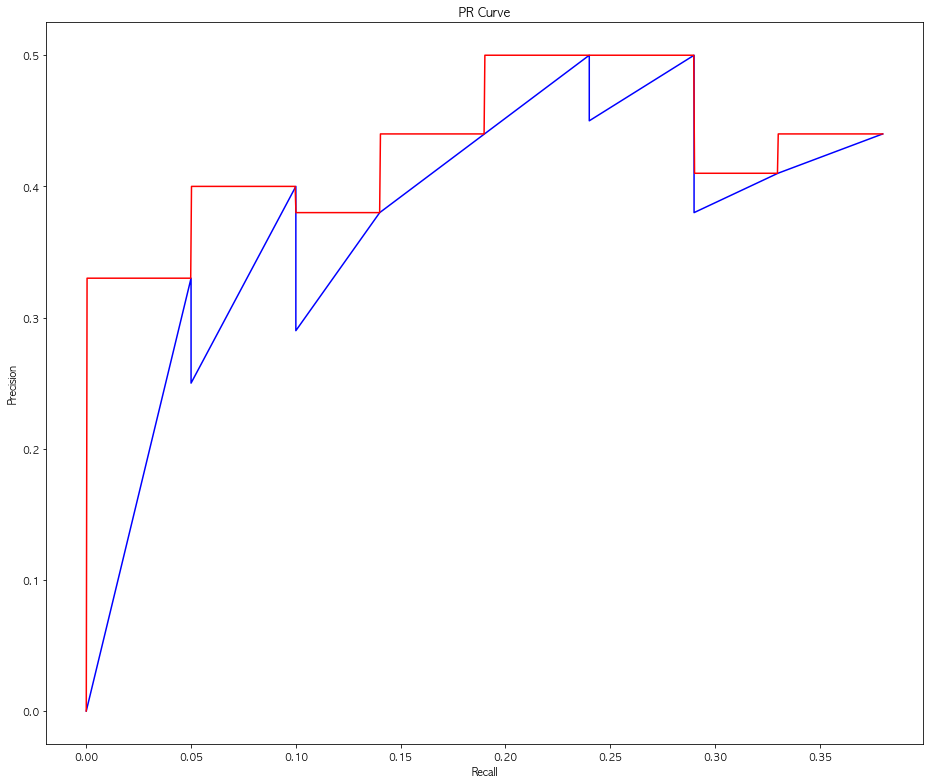

ap is 0.13908228228228228

검출되어야 할 개수 : 21

   time Confidense Result
0     1     73.03%     FP
1     2     74.44%     FP
2     3     72.37%     FP
3     4     61.31%     FP
4     5     81.28%     TP
5     6   -262.58%     No
6     7     36.94%     No
7     8   -469.44%     No
8     9      4.92%     No
9    10   -980.32%     No
10   11   -436.95%     No
11   12   -1691.9%     No
12   13   -236.58%     No
13   14   -188.18%     No
14   15  -1078.72%     No
15   16    -200.1%     No
16   17     66.37%     FP
17   18     59.45%     No
18   19     53.81%     No
19   20     69.77%     FP
20   21     68.78%     FP
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    0     73.03%       FP     0     1   0/1=0.0   0/21=0.0             0.00   
1    1     74.44%       FP     0     2   0/2=0.0   0/21=0.0             0.00   
2    2     72.37%       FP     0     3   0/3=0.0   0/21=0.0             0.00   
3    3     61.31%       FP     0     4   0/4=0.0   0/21=0.0     

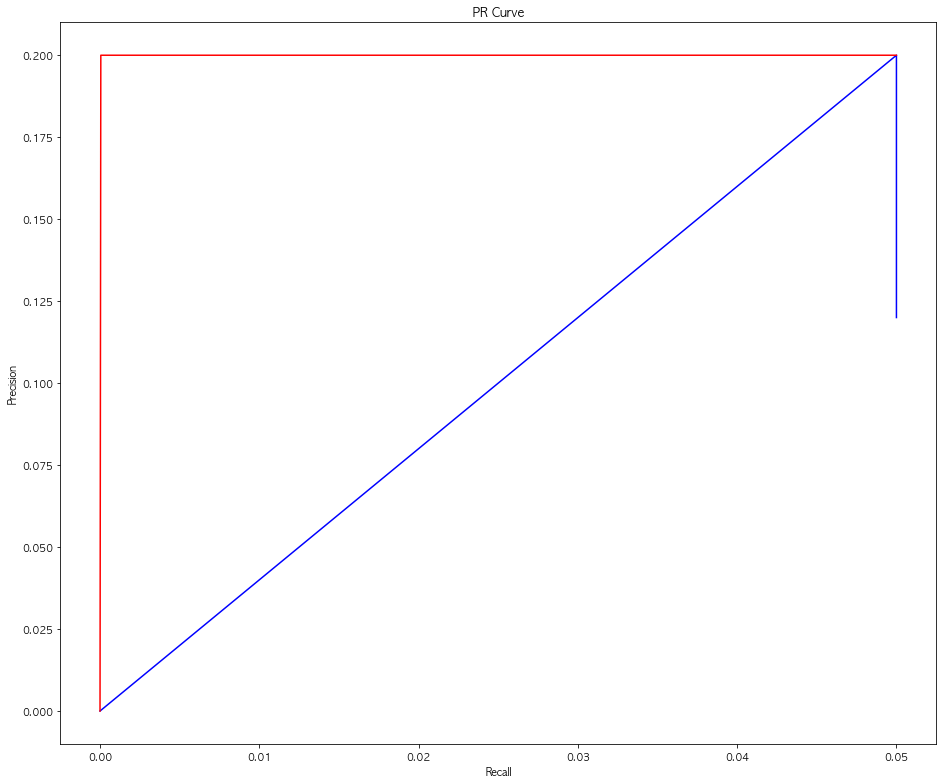

ap is 0.0

검출되어야 할 개수 : 21

   time Confidense Result
0     1     67.63%     FP
1     2     66.83%     FP
2     3     69.63%     FP
3     4     62.12%     FP
4     5     86.11%     TP
5     6     38.33%     No
6     7     42.24%     No
7     8     58.22%     No
8     9     83.05%     TP
9    10     22.37%     No
10   11     53.92%     No
11   12     46.68%     No
12   13     77.03%     TP
13   14     33.49%     No
14   15     85.39%     TP
15   16      84.4%     TP
16   17   -374.66%     No
17   18     92.93%     TP
18   19     89.29%     TP
19   20      64.6%     FP
20   21     66.41%     FP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     67.63%       FP     0     1    0/1=0.0   0/21=0.0   
1     1     66.83%       FP     0     2    0/2=0.0   0/21=0.0   
2     2     69.63%       FP     0     3    0/3=0.0   0/21=0.0   
3     3     62.12%       FP     0     4    0/4=0.0   0/21=0.0   
4     4     86.11%       TP     1     4    1/5=0.2  1/21=0.05   
5     8   

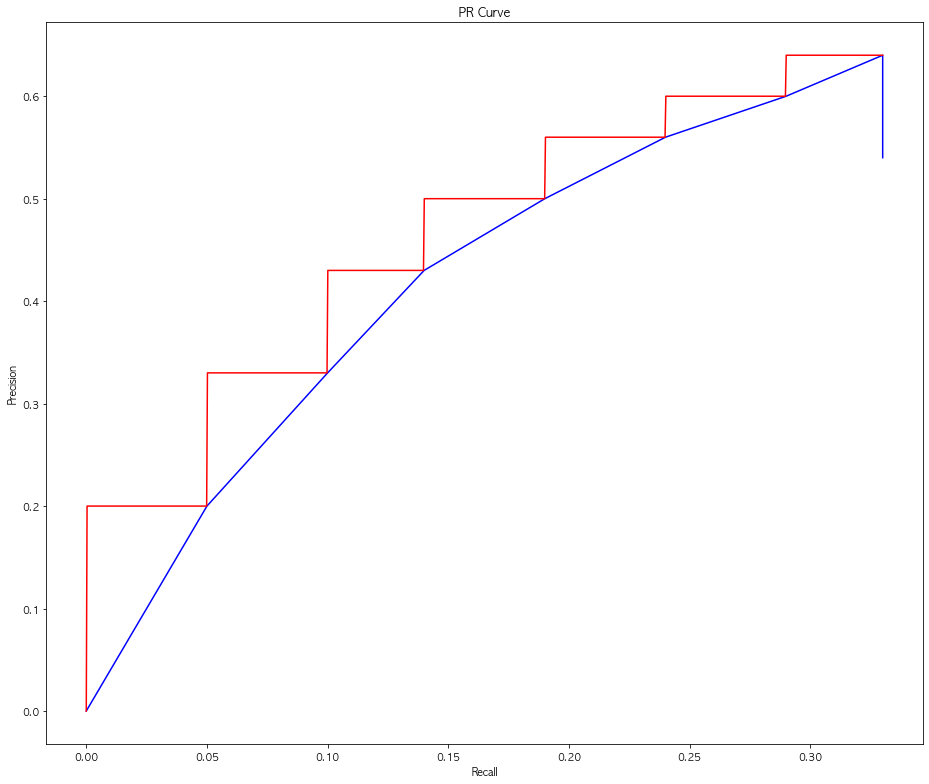

ap is 0.12572372372372376

검출되어야 할 개수 : 21

   time Confidense Result
0     1     98.68%     TP
1     2      86.8%     TP
2     3     96.34%     TP
3     4     83.12%     TP
4     5     91.23%     TP
5     6   -262.58%     No
6     7     90.31%     TP
7     8      97.3%     TP
8     9      43.5%     No
9    10     11.86%     No
10   11     31.87%     No
11   12     90.96%     TP
12   13     83.23%     TP
13   14     77.32%     TP
14   15     54.85%     No
15   16     95.21%     TP
16   17     42.57%     No
17   18    -497.3%     No
18   19  -1364.76%     No
19   20    -37.54%     No
20   21     -2.49%     No
   Time Confidense TP or FP 누적 TP 누적 FP  Precision      Recall  \
0     0     98.68%       TP     1     0    1/1=1.0   1/21=0.05   
1     1      86.8%       TP     2     0    2/2=1.0    2/21=0.1   
2     2     96.34%       TP     3     0    3/3=1.0   3/21=0.14   
3     3     83.12%       TP     4     0    4/4=1.0   4/21=0.19   
4     4     91.23%       TP     5     0    5/5=1.0   5

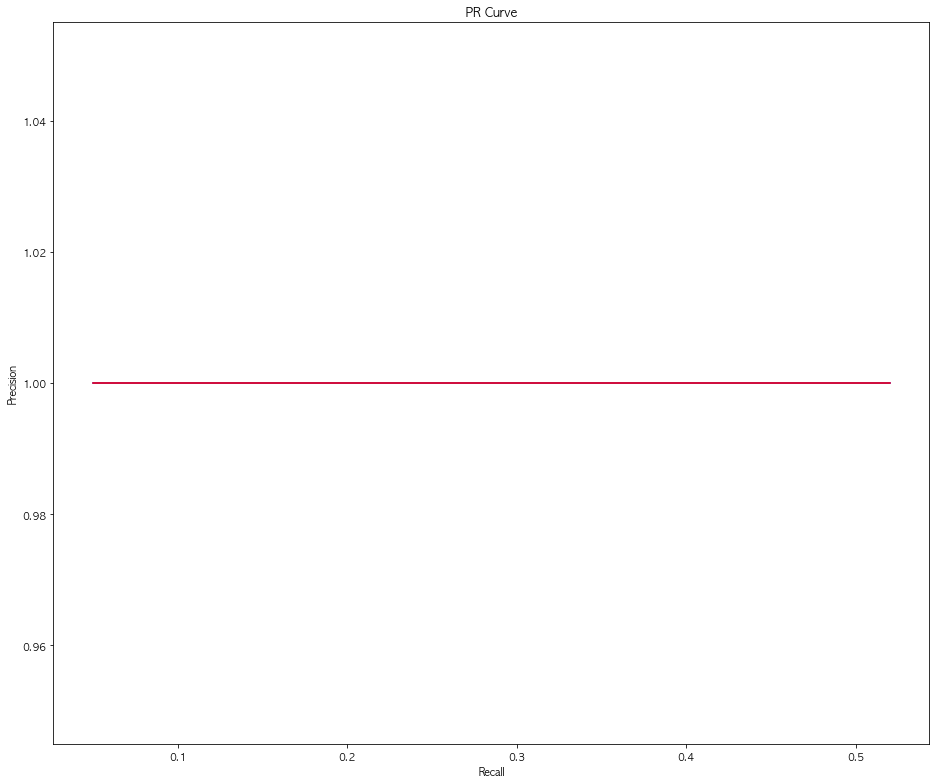

ap is 0

검출되어야 할 개수 : 21

   time Confidense Result
0     1      44.0%     No
1     2     79.04%     TP
2     3     43.35%     No
3     4     74.43%     FP
4     5     14.55%     No
5     6     96.78%     TP
6     7     66.73%     FP
7     8     76.95%     TP
8     9     46.41%     No
9    10     16.76%     No
10   11     47.55%     No
11   12     10.17%     No
12   13  -5978.22%     No
13   14  -1398.23%     No
14   15     40.95%     No
15   16     -5.78%     No
16   17   -161.66%     No
17   18      5.82%     No
18   19     85.63%     TP
19   20     77.75%     TP
20   21     84.54%     TP
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    1     79.04%       TP     1     0   1/1=1.0  1/21=0.05             1.00   
1    3     74.43%       FP     1     1   1/2=0.5  1/21=0.05             0.50   
2    5     96.78%       TP     2     1  2/3=0.67   2/21=0.1             0.67   
3    6     66.73%       FP     2     2   2/4=0.5   2/21=0.1             0.50   
4 

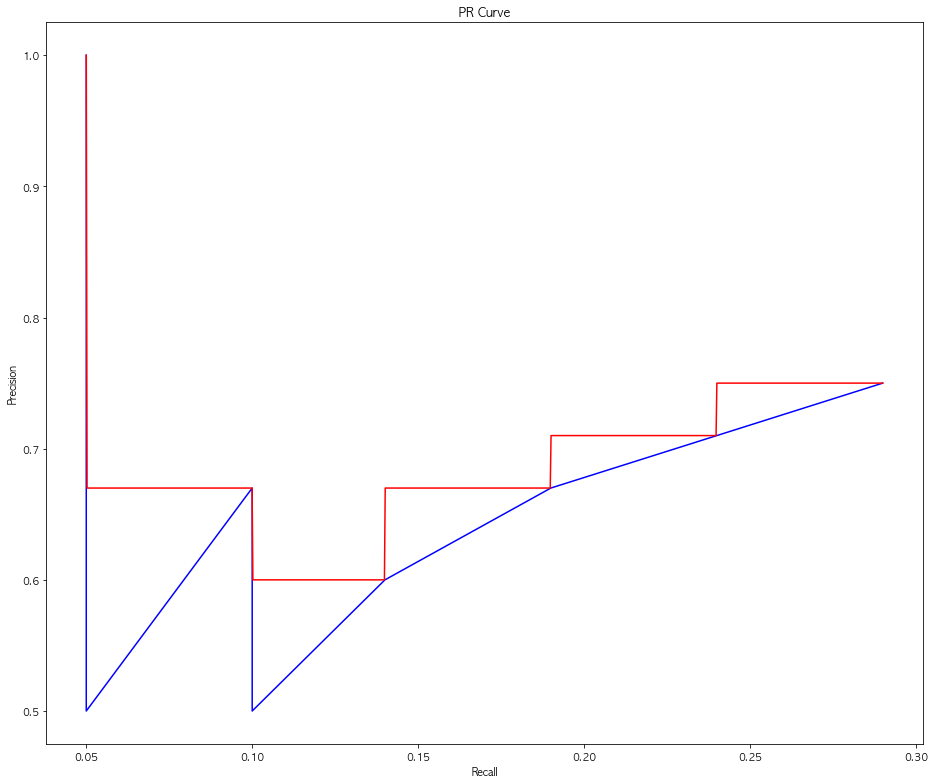

ap is 0.12572972972972973

검출되어야 할 개수 : 21

   time Confidense Result
0     1     96.78%     TP
1     2     98.22%     TP
2     3     96.34%     TP
3     4     86.19%     TP
4     5     93.23%     TP
5     6     48.69%     No
6     7  -2000.08%     No
7     8     18.83%     No
8     9     99.76%     TP
9    10     27.66%     No
10   11   -109.98%     No
11   12   -343.16%     No
12   13     38.02%     No
13   14     54.38%     No
14   15      6.58%     No
15   16    -21.91%     No
16   17     94.72%     TP
17   18     79.17%     TP
18   19     85.93%     TP
19   20      7.77%     No
20   21      5.24%     No
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    0     96.78%       TP     1     0   1/1=1.0  1/21=0.05              1.0   
1    1     98.22%       TP     2     0   2/2=1.0   2/21=0.1              1.0   
2    2     96.34%       TP     3     0   3/3=1.0  3/21=0.14              1.0   
3    3     86.19%       TP     4     0   4/4=1.0  4/21=0.19     

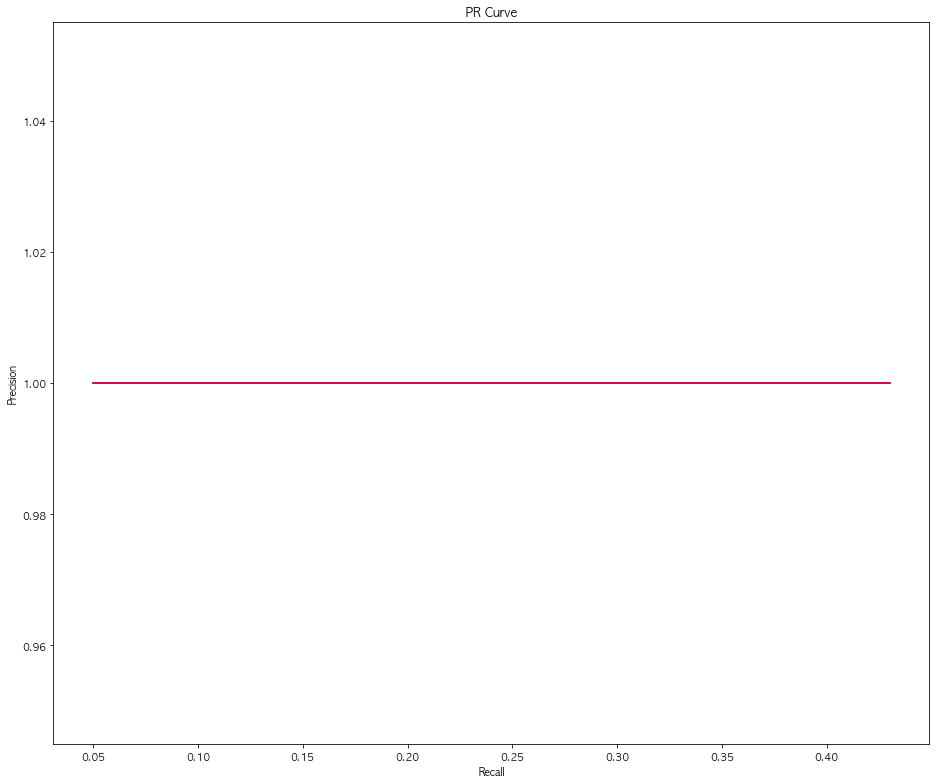

ap is 0

검출되어야 할 개수 : 21

   time Confidense Result
0     1     69.87%     FP
1     2     63.21%     FP
2     3     69.33%     FP
3     4     86.62%     TP
4     5     20.31%     No
5     6     48.69%     No
6     7   -954.41%     No
7     8   -435.51%     No
8     9   -109.68%     No
9    10     83.41%     TP
10   11    -94.27%     No
11   12   -387.66%     No
12   13    -10.84%     No
13   14     35.71%     No
14   15     49.23%     No
15   16     56.31%     No
16   17     70.79%     FP
17   18     67.44%     FP
18   19     51.13%     No
19   20      0.15%     No
20   21     36.44%     No
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    0     69.87%       FP     0     1   0/1=0.0   0/21=0.0             0.00   
1    1     63.21%       FP     0     2   0/2=0.0   0/21=0.0             0.00   
2    2     69.33%       FP     0     3   0/3=0.0   0/21=0.0             0.00   
3    3     86.62%       TP     1     3  1/4=0.25  1/21=0.05             0.25   
4 

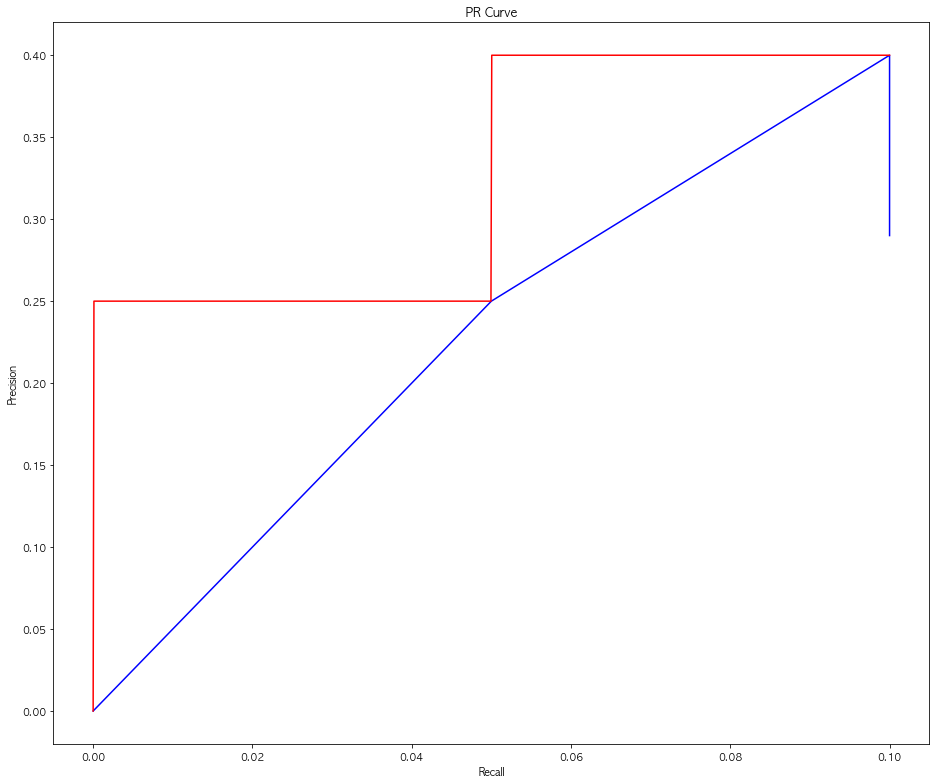

ap is 0.012462462462462463

검출되어야 할 개수 : 21

   time  Confidense Result
0     1      66.72%     FP
1     2      73.17%     FP
2     3      59.33%     No
3     4      74.43%     FP
4     5     -49.38%     No
5     6      60.26%     FP
6     7      40.55%     No
7     8       52.8%     No
8     9      29.72%     No
9    10       9.37%     No
10   11      27.83%     No
11   12      86.65%     TP
12   13       62.1%     FP
13   14      80.37%     TP
14   15      61.42%     FP
15   16      73.77%     FP
16   17      93.92%     TP
17   18     -996.8%     No
18   19  -16411.17%     No
19   20   -2081.64%     No
20   21    -1013.0%     No
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    0     66.72%       FP     0     1   0/1=0.0   0/21=0.0             0.00   
1    1     73.17%       FP     0     2   0/2=0.0   0/21=0.0             0.00   
2    3     74.43%       FP     0     3   0/3=0.0   0/21=0.0             0.00   
3    5     60.26%       FP     0     4   

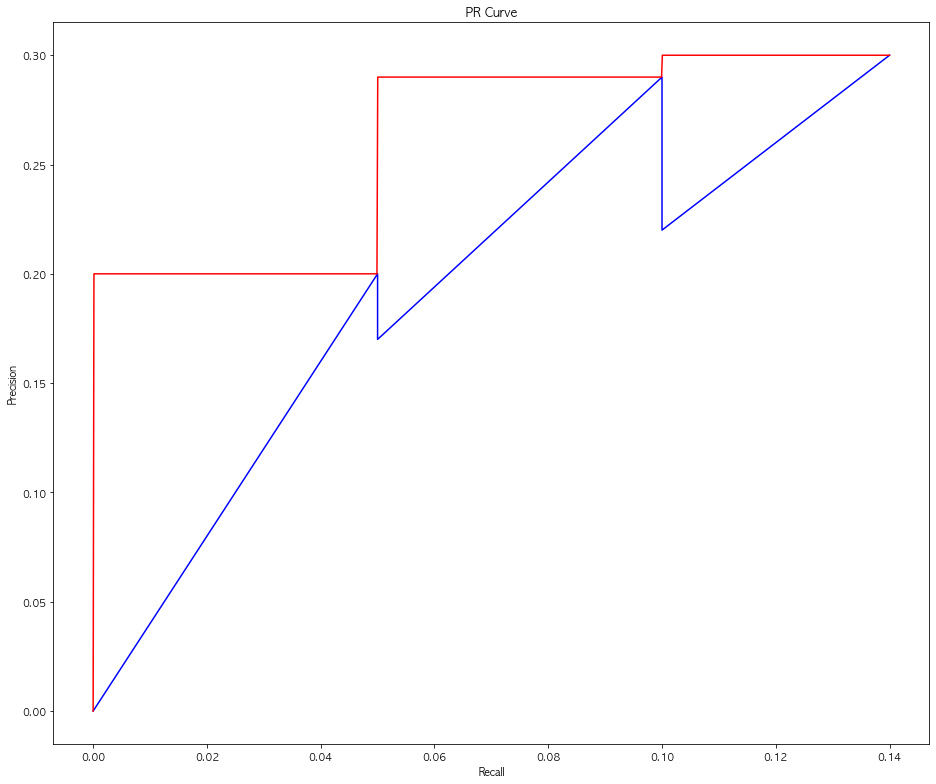

ap is 0.024418018018018017

검출되어야 할 개수 : 21

   time Confidense Result
0     1     -1.87%     No
1     2     21.06%     No
2     3     -2.71%     No
3     4    -31.21%     No
4     5    -72.89%     No
5     6     46.65%     No
6     7     51.25%     No
7     8     68.82%     FP
8     9      34.1%     No
9    10      9.86%     No
10   11     26.31%     No
11   12      63.6%     FP
12   13     44.57%     No
13   14     61.93%     FP
14   15     51.41%     No
15   16      75.0%     FP
16   17     91.21%     TP
17   18     53.39%     No
18   19   -120.14%     No
19   20   -997.21%     No
20   21   -622.22%     No
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    7     68.82%       FP     0     1   0/1=0.0   0/21=0.0              0.0   
1   11      63.6%       FP     0     2   0/2=0.0   0/21=0.0              0.0   
2   13     61.93%       FP     0     3   0/3=0.0   0/21=0.0              0.0   
3   15      75.0%       FP     0     4   0/4=0.0   0/21=0.0    

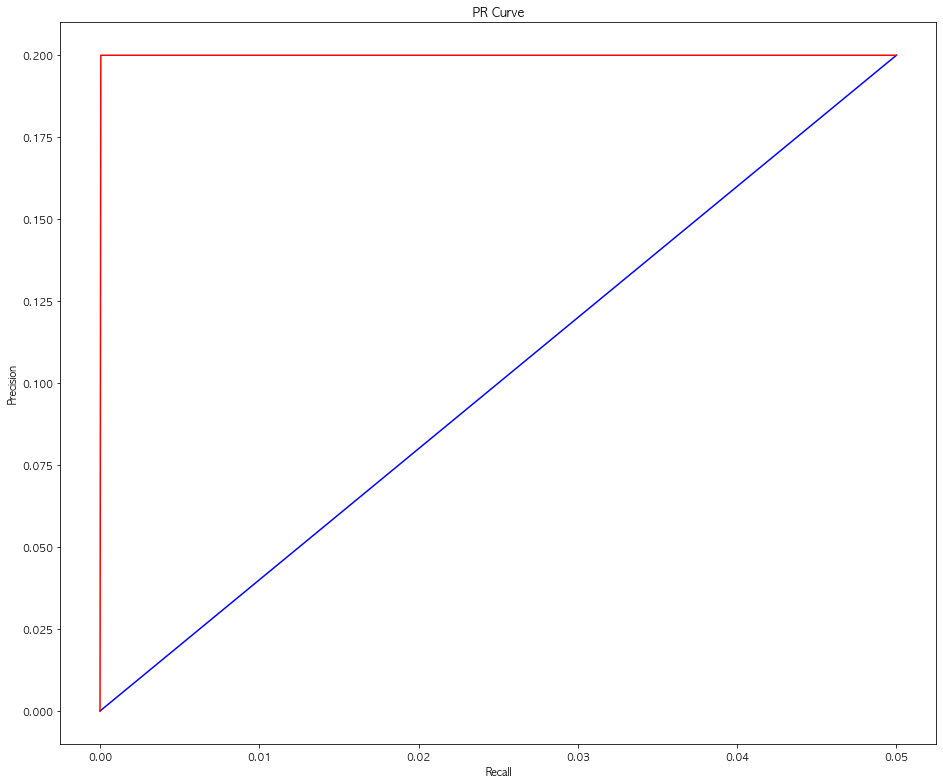

ap is 0.0

검출되어야 할 개수 : 21

   time Confidense Result
0     1     -1.87%     No
1     2      7.91%     No
2     3    -10.44%     No
3     4    -20.31%     No
4     5  -1872.89%     No
5     6     68.07%     FP
6     7     58.67%     No
7     8     51.24%     No
8     9     30.77%     No
9    10      9.37%     No
10   11     25.48%     No
11   12     79.02%     TP
12   13     64.56%     FP
13   14     74.53%     FP
14   15     43.74%     No
15   16     45.86%     No
16   17     65.28%     FP
17   18     93.36%     TP
18   19     25.44%     No
19   20     11.96%     No
20   21  -6244.76%     No
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    5     68.07%       FP     0     1   0/1=0.0   0/21=0.0             0.00   
1   11     79.02%       TP     1     1   1/2=0.5  1/21=0.05             0.50   
2   12     64.56%       FP     1     2  1/3=0.33  1/21=0.05             0.33   
3   13     74.53%       FP     1     3  1/4=0.25  1/21=0.05             0.25   


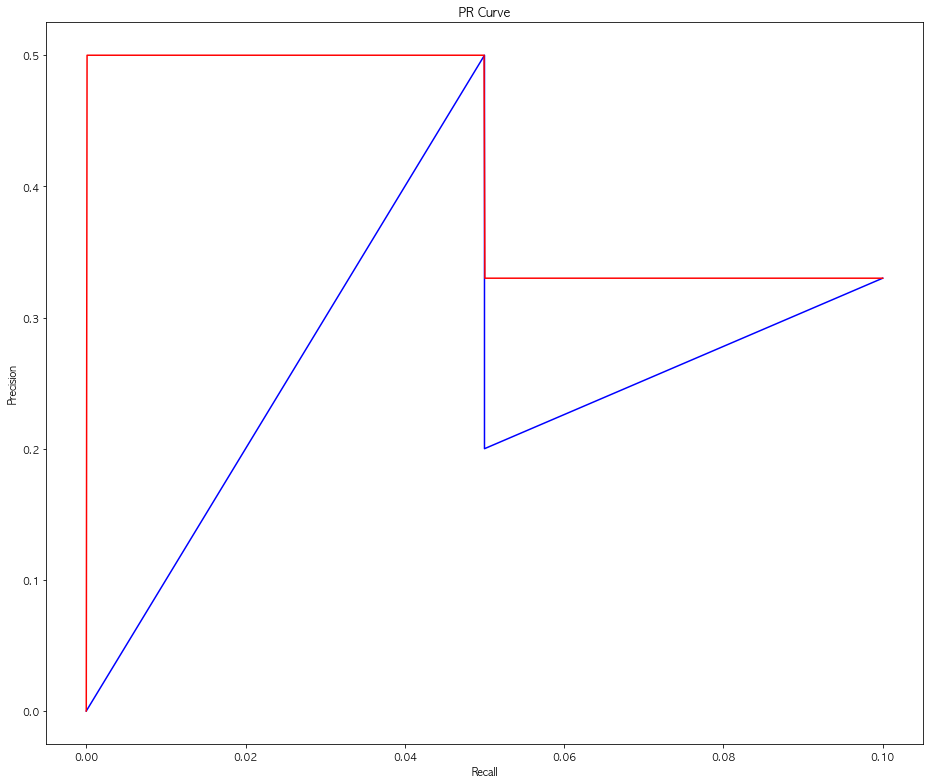

ap is 0.024924924924924926

검출되어야 할 개수 : 21

   time  Confidense Result
0     1    -161.15%     No
1     2    -311.99%     No
2     3    -340.29%     No
3     4    -257.71%     No
4     5    -732.27%     No
5     6      81.71%     TP
6     7      38.31%     No
7     8      47.08%     No
8     9      35.86%     No
9    10      11.57%     No
10   11      39.73%     No
11   12      94.17%     TP
12   13      85.65%     TP
13   14      90.43%     TP
14   15      73.53%     FP
15   16      73.77%     FP
16   17      83.41%     TP
17   18  -15865.52%     No
18   19    -279.33%     No
19   20    -110.82%     No
20   21     -29.84%     No
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    5     81.71%       TP     1     0   1/1=1.0  1/21=0.05             1.00   
1   11     94.17%       TP     2     0   2/2=1.0   2/21=0.1             1.00   
2   12     85.65%       TP     3     0   3/3=1.0  3/21=0.14             1.00   
3   13     90.43%       TP     4     0   

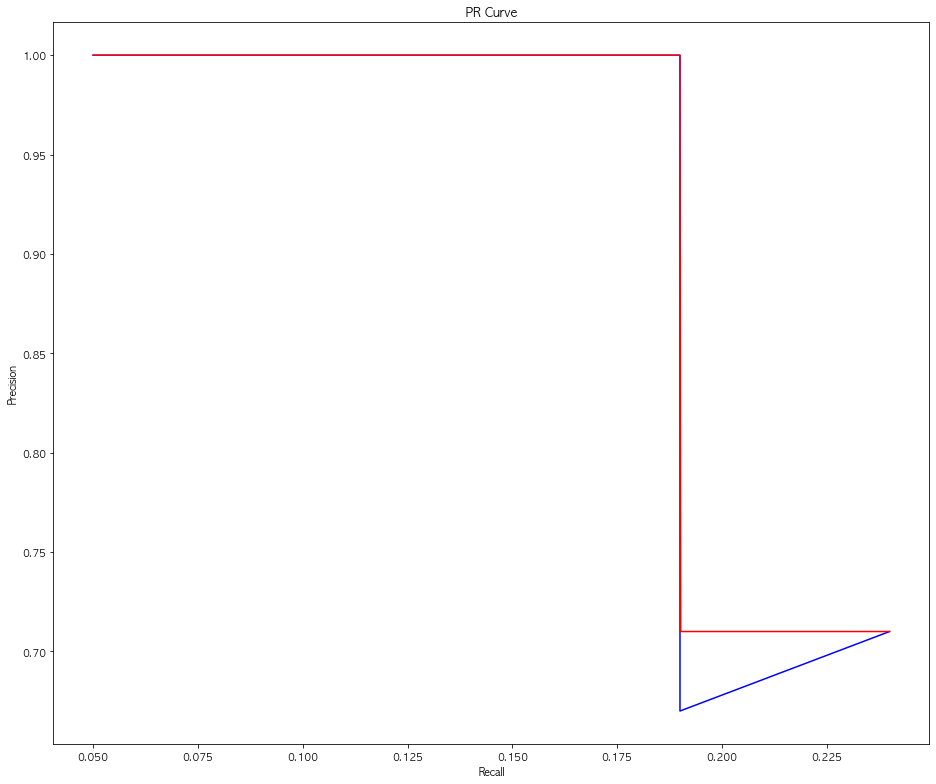

ap is 0.13997997997998002

검출되어야 할 개수 : 21

   time Confidense Result
0     1      63.4%     FP
1     2     73.17%     FP
2     3     59.33%     No
3     4     63.42%     FP
4     5   -117.86%     No
5     6     76.42%     TP
6     7     45.92%     No
7     8     72.66%     FP
8     9     71.14%     FP
9    10     16.76%     No
10   11     38.47%     No
11   12     15.06%     No
12   13   -356.55%     No
13   14   -685.21%     No
14   15     78.61%     TP
15   16     54.37%     No
16   17   -130.99%     No
17   18     34.65%     No
18   19     68.17%     FP
19   20      64.6%     FP
20   21     73.05%     FP
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    0      63.4%       FP     0     1   0/1=0.0   0/21=0.0             0.00   
1    1     73.17%       FP     0     2   0/2=0.0   0/21=0.0             0.00   
2    3     63.42%       FP     0     3   0/3=0.0   0/21=0.0             0.00   
3    5     76.42%       TP     1     3  1/4=0.25  1/21=0.05     

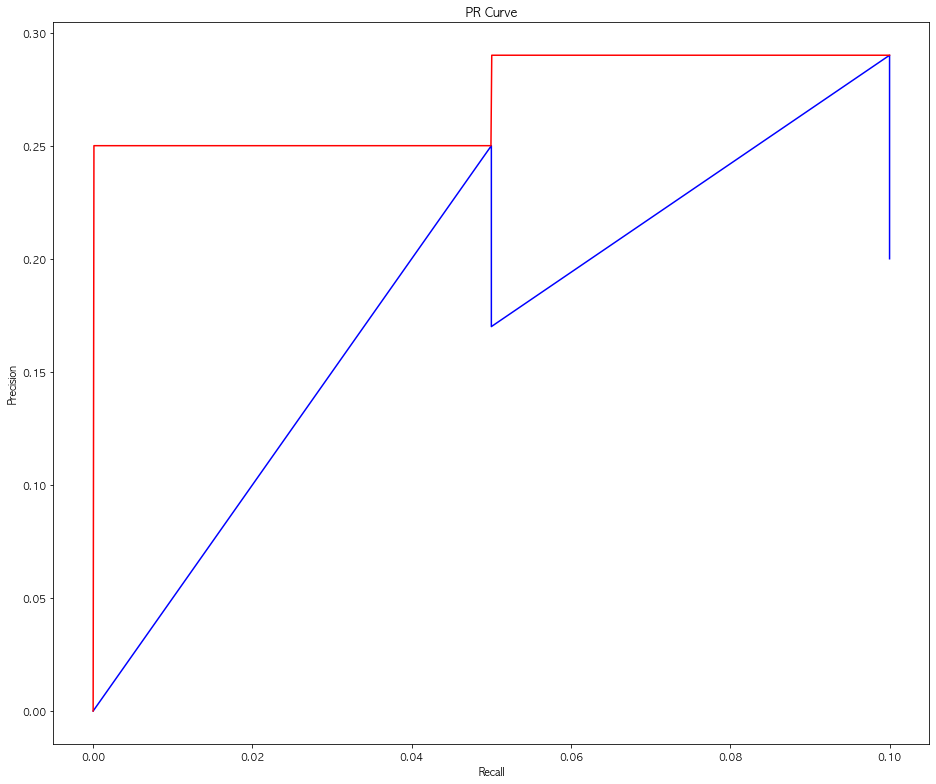

ap is 0.012462462462462463

검출되어야 할 개수 : 21

   time Confidense Result
0     1     72.89%     FP
1     2     81.78%     TP
2     3     72.35%     FP
3     4      89.3%     TP
4     5     56.06%     No
5     6      4.94%     No
6     7     92.02%     TP
7     8     72.12%     FP
8     9     74.18%     FP
9    10      18.4%     No
10   11     63.91%     FP
11   12     28.34%     No
12   13   -182.52%     No
13   14   -511.31%     No
14   15   -110.58%     No
15   16   -115.62%     No
16   17     15.96%     No
17   18     56.02%     No
18   19     73.02%     FP
19   20     43.58%     No
20   21     50.79%     No
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    0     72.89%       FP     0     1   0/1=0.0   0/21=0.0             0.00   
1    1     81.78%       TP     1     1   1/2=0.5  1/21=0.05             0.50   
2    2     72.35%       FP     1     2  1/3=0.33  1/21=0.05             0.33   
3    3      89.3%       TP     2     2   2/4=0.5   2/21=0.1    

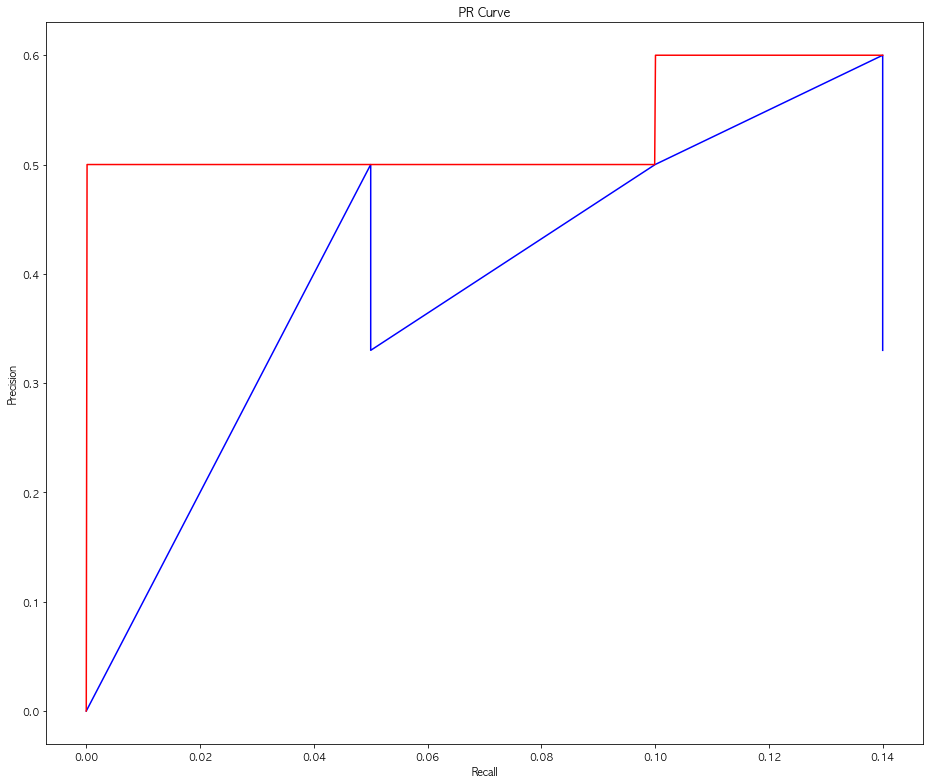

ap is 0.04988988988988989

검출되어야 할 개수 : 21

   time Confidense Result
0     1     66.72%     FP
1     2      66.7%     FP
2     3     66.16%     FP
3     4      89.3%     TP
4     5     69.08%     FP
5     6     82.56%     TP
6     7     72.86%     FP
7     8   -121.84%     No
8     9  -4182.35%     No
9    10      20.5%     No
10   11     53.43%     No
11   12     44.74%     No
12   13     81.26%     TP
13   14     89.04%     TP
14   15     94.94%     TP
15   16     41.03%     No
16   17     45.17%     No
17   18      72.5%     FP
18   19     98.13%     TP
19   20     43.58%     No
20   21     41.52%     No
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     66.72%       FP     0     1    0/1=0.0   0/21=0.0   
1     1      66.7%       FP     0     2    0/2=0.0   0/21=0.0   
2     2     66.16%       FP     0     3    0/3=0.0   0/21=0.0   
3     3      89.3%       TP     1     3   1/4=0.25  1/21=0.05   
4     4     69.08%       FP     1     4    1/5=0.2  1/21=0.

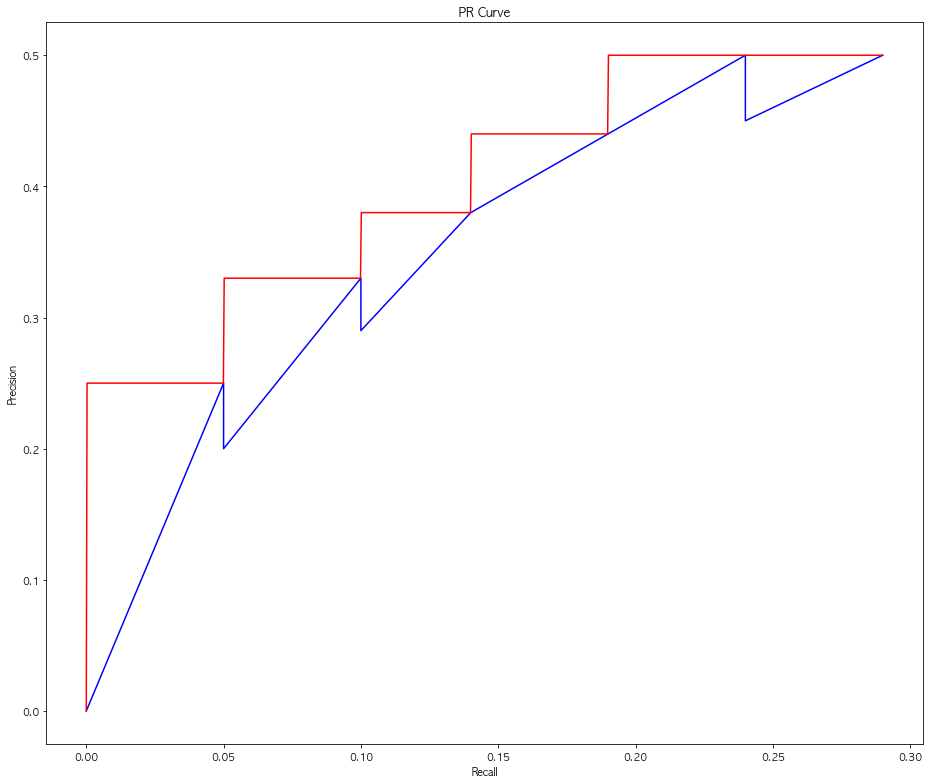

ap is 0.06574494494494493

검출되어야 할 개수 : 21

   time Confidense Result
0     1     96.78%     TP
1     2     96.41%     TP
2     3      92.3%     TP
3     4     96.65%     TP
4     5     25.72%     No
5     6    -16.68%     No
6     7     63.26%     FP
7     8     75.18%     TP
8     9      43.5%     No
9    10     16.46%     No
10   11     36.71%     No
11   12     73.68%     FP
12   13     80.05%     TP
13   14     82.92%     TP
14   15     85.83%     TP
15   16     81.84%     TP
16   17    -82.99%     No
17   18     -6.16%     No
18   19     51.13%     No
19   20    -26.85%     No
20   21     41.52%     No
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     96.78%       TP     1     0    1/1=1.0  1/21=0.05   
1     1     96.41%       TP     2     0    2/2=1.0   2/21=0.1   
2     2      92.3%       TP     3     0    3/3=1.0  3/21=0.14   
3     3     96.65%       TP     4     0    4/4=1.0  4/21=0.19   
4     6     63.26%       FP     4     1    4/5=0.8  4/21=0.

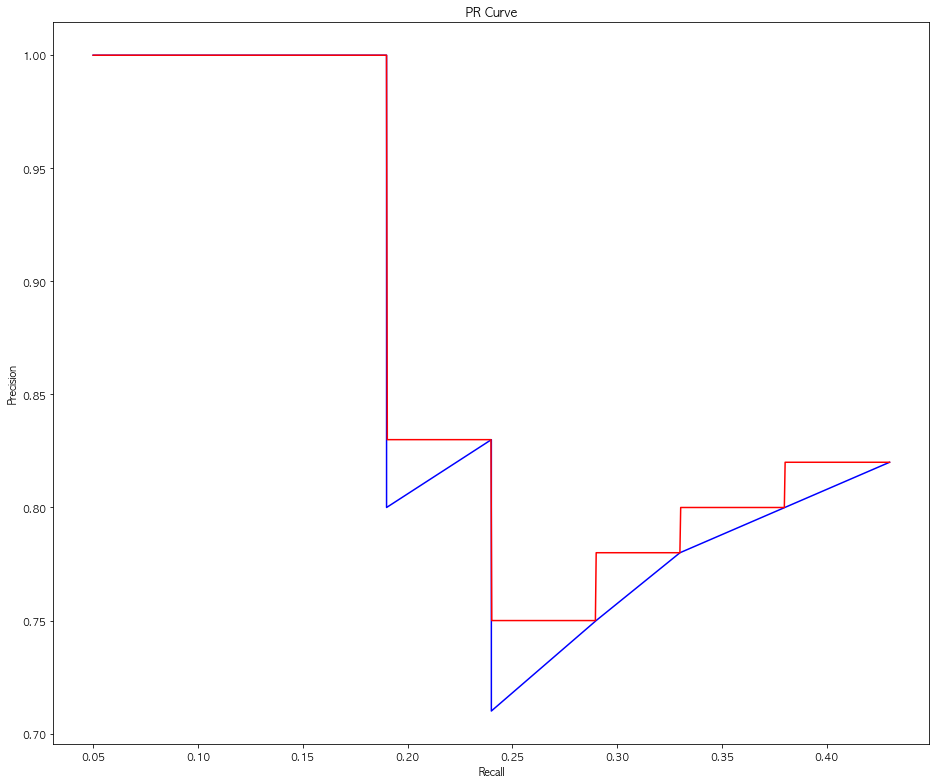

ap is 0.28882282282282284

검출되어야 할 개수 : 21

   time Confidense Result
0     1     90.61%     TP
1     2     84.39%     TP
2     3      78.0%     TP
3     4      89.3%     TP
4     5     56.06%     No
5     6     84.24%     TP
6     7     97.56%     TP
7     8     91.85%     TP
8     9     48.35%     No
9    10      18.4%     No
10   11     46.64%     No
11   12     69.07%     FP
12   13      55.2%     No
13   14     15.52%     No
14   15     11.76%     No
15   16     38.65%     No
16   17   -130.99%     No
17   18     77.19%     TP
18   19      99.0%     TP
19   20     77.75%     TP
20   21     87.09%     TP
   Time Confidense TP or FP 누적 TP 누적 FP   Precision      Recall  \
0     0     90.61%       TP     1     0     1/1=1.0   1/21=0.05   
1     1     84.39%       TP     2     0     2/2=1.0    2/21=0.1   
2     2      78.0%       TP     3     0     3/3=1.0   3/21=0.14   
3     3      89.3%       TP     4     0     4/4=1.0   4/21=0.19   
4     5     84.24%       TP     5     0     5/5=1

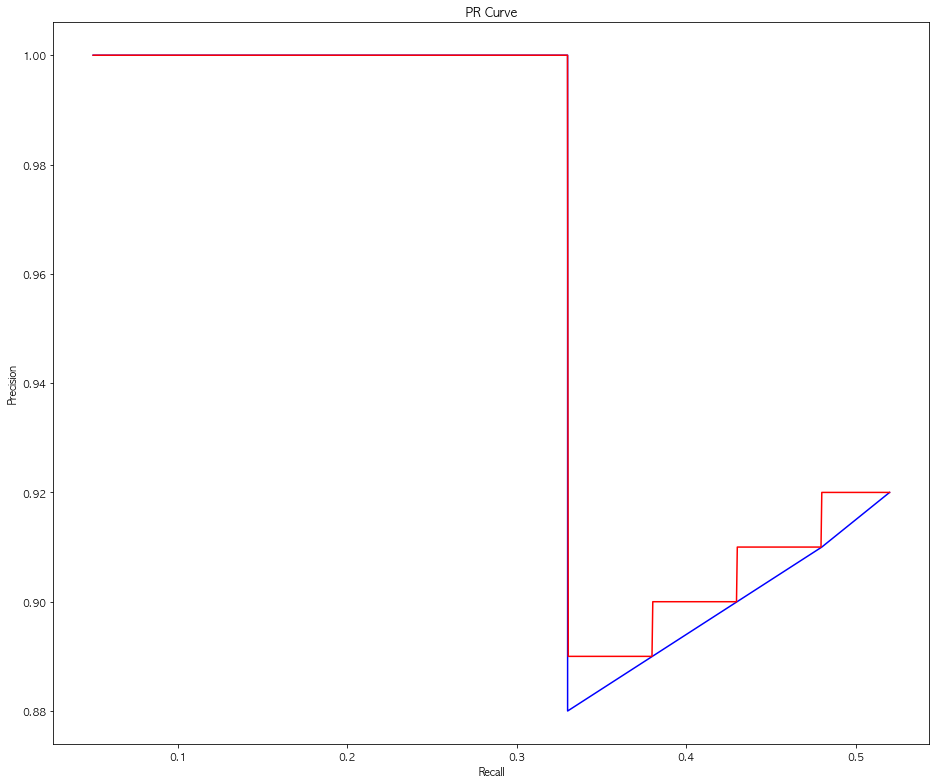

ap is 0.4133083083083083

검출되어야 할 개수 : 21

   time Confidense Result
0     1      94.8%     TP
1     2     98.22%     TP
2     3     90.15%     TP
3     4     98.89%     TP
4     5    -12.71%     No
5     6    -221.3%     No
6     7     67.97%     FP
7     8    -39.37%     No
8     9      75.8%     TP
9    10     26.87%     No
10   11     78.44%     TP
11   12     39.84%     No
12   13    -75.02%     No
13   14    -458.0%     No
14   15   -266.57%     No
15   16   -257.96%     No
16   17   -148.24%     No
17   18     -6.16%     No
18   19     10.25%     No
19   20     86.04%     TP
20   21     89.54%     TP
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    0      94.8%       TP     1     0   1/1=1.0  1/21=0.05             1.00   
1    1     98.22%       TP     2     0   2/2=1.0   2/21=0.1             1.00   
2    2     90.15%       TP     3     0   3/3=1.0  3/21=0.14             1.00   
3    3     98.89%       TP     4     0   4/4=1.0  4/21=0.19      

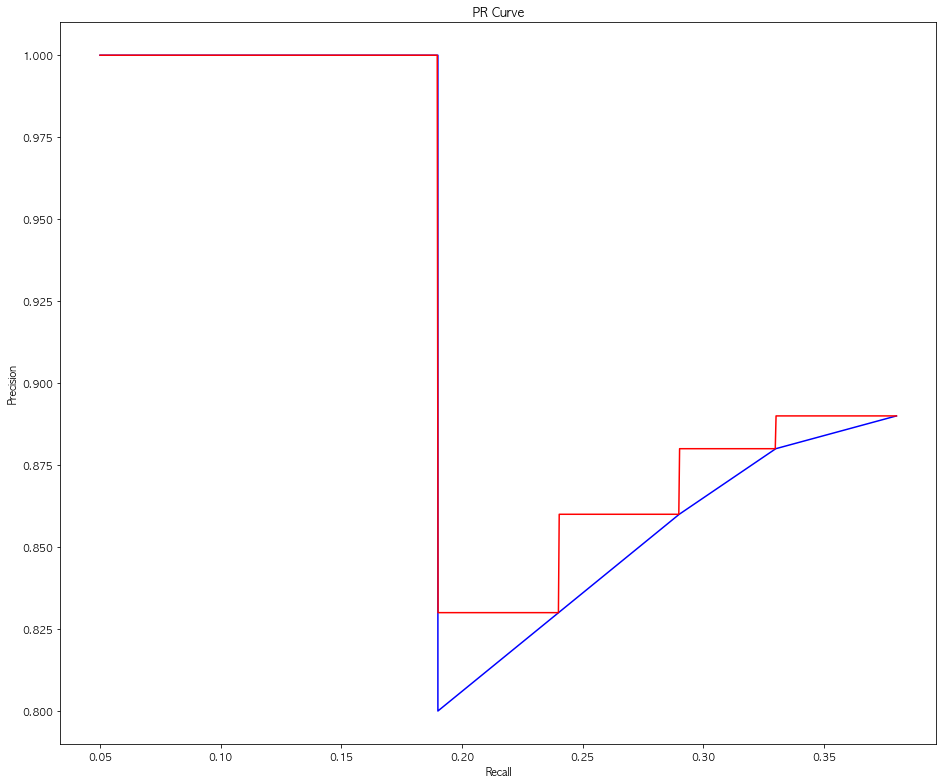

ap is 0.25862552552552553

검출되어야 할 개수 : 21

   time Confidense Result
0     1     96.01%     TP
1     2     88.27%     TP
2     3     90.15%     TP
3     4     96.92%     TP
4     5     71.98%     FP
5     6   -237.54%     No
6     7     98.36%     TP
7     8     50.07%     No
8     9      43.5%     No
9    10      18.4%     No
10   11     53.92%     No
11   12    -67.77%     No
12   13     -5.67%     No
13   14  -1152.09%     No
14   15     93.67%     TP
15   16     49.48%     No
16   17     93.39%     TP
17   18   -594.08%     No
18   19    -27.18%     No
19   20   -110.82%     No
20   21      12.4%     No
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    0     96.01%       TP     1     0   1/1=1.0  1/21=0.05             1.00   
1    1     88.27%       TP     2     0   2/2=1.0   2/21=0.1             1.00   
2    2     90.15%       TP     3     0   3/3=1.0  3/21=0.14             1.00   
3    3     96.92%       TP     4     0   4/4=1.0  4/21=0.19     

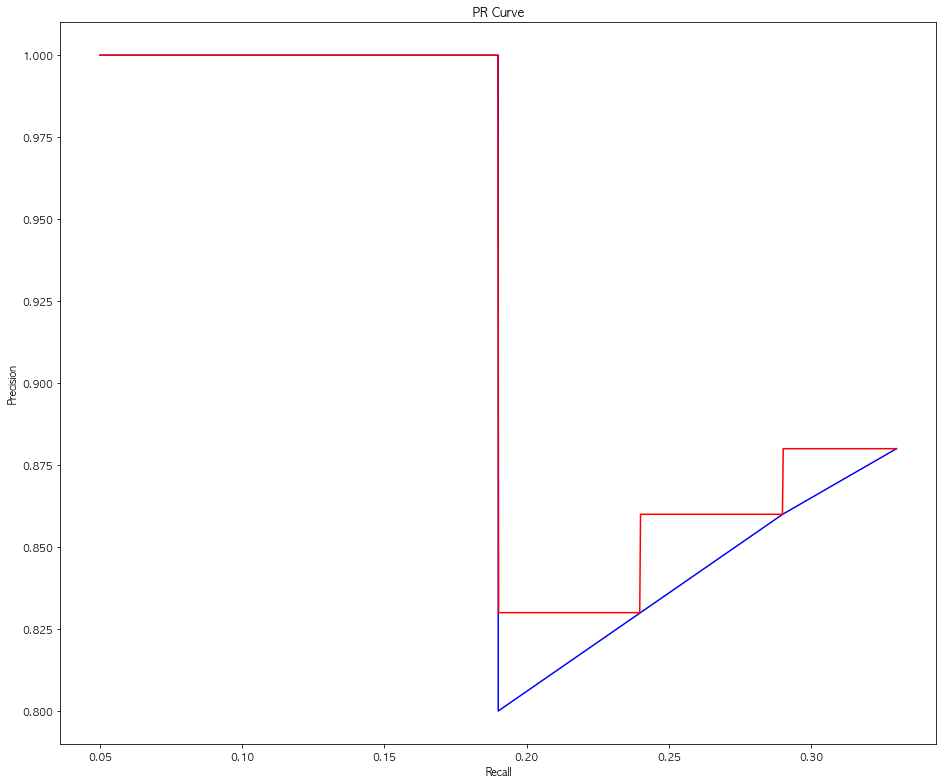

ap is 0.2239411411411412

검출되어야 할 개수 : 21

   time Confidense Result
0     1      63.4%     FP
1     2     70.02%     FP
2     3     55.65%     No
3     4      59.3%     No
4     5    -49.38%     No
5     6  -1491.24%     No
6     7     71.46%     FP
7     8    -50.88%     No
8     9     89.47%     TP
9    10     37.71%     No
10   11     94.03%     TP
11   12   -408.39%     No
12   13   -520.44%     No
13   14  -1018.42%     No
14   15   -120.68%     No
15   16    -200.1%     No
16   17    -14.36%     No
17   18      62.8%     FP
18   19     54.66%     No
19   20     74.96%     FP
20   21     95.93%     TP
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    0      63.4%       FP     0     1   0/1=0.0   0/21=0.0             0.00   
1    1     70.02%       FP     0     2   0/2=0.0   0/21=0.0             0.00   
2    6     71.46%       FP     0     3   0/3=0.0   0/21=0.0             0.00   
3    8     89.47%       TP     1     3  1/4=0.25  1/21=0.05      

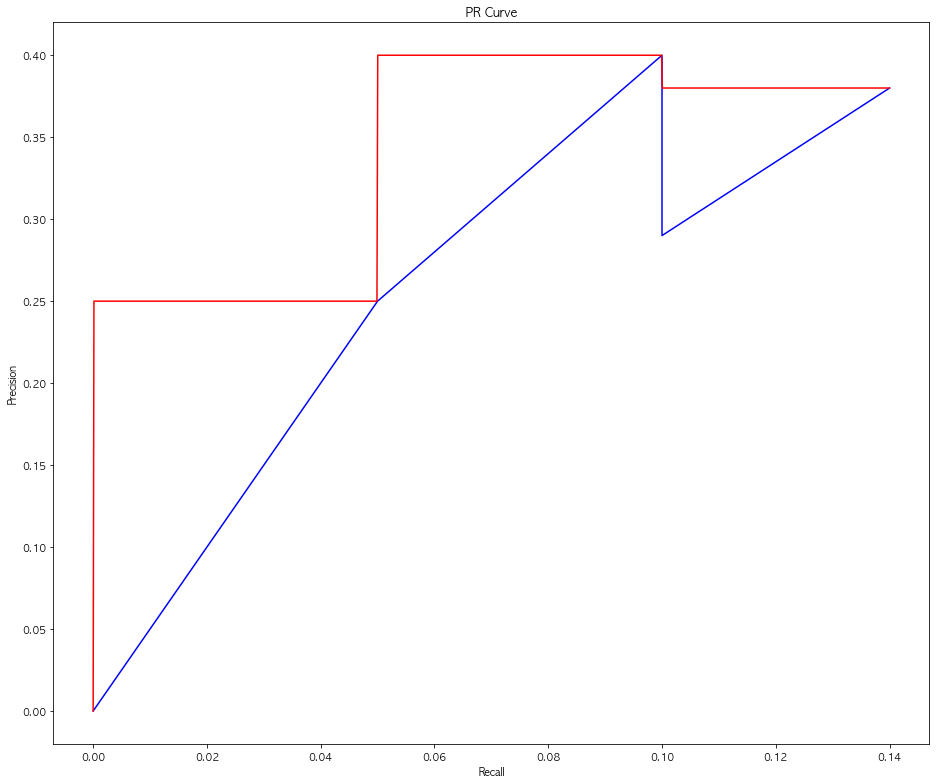

ap is 0.032393393393393394

검출되어야 할 개수 : 21

   time Confidense Result
0     1     72.07%     FP
1     2     69.49%     FP
2     3     73.33%     FP
3     4     64.71%     FP
4     5     80.15%     TP
5     6     70.26%     FP
6     7     89.61%     TP
7     8     93.99%     TP
8     9     67.56%     FP
9    10     20.68%     No
10   11     52.27%     No
11   12     65.17%     FP
12   13     82.64%     TP
13   14     82.42%     TP
14   15     58.43%     No
15   16     66.72%     FP
16   17     57.22%     No
17   18     47.59%     No
18   19     49.92%     No
19   20     66.99%     FP
20   21     65.27%     FP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     72.07%       FP     0     1    0/1=0.0   0/21=0.0   
1     1     69.49%       FP     0     2    0/2=0.0   0/21=0.0   
2     2     73.33%       FP     0     3    0/3=0.0   0/21=0.0   
3     3     64.71%       FP     0     4    0/4=0.0   0/21=0.0   
4     4     80.15%       TP     1     4    1/5=0.2  1/21=0

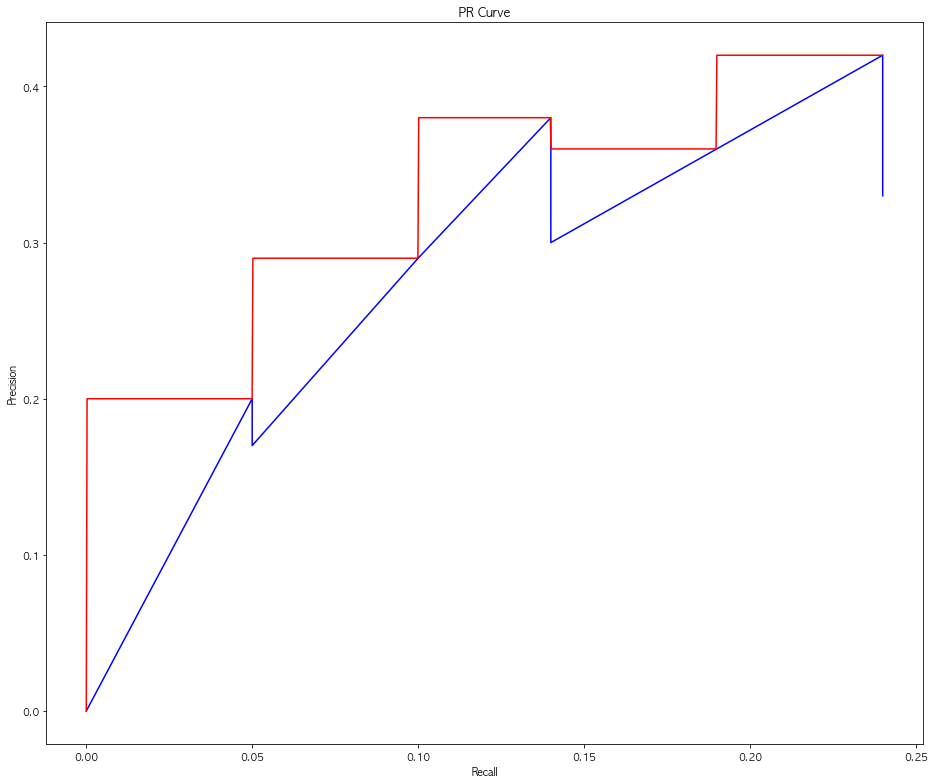

ap is 0.05733333333333332

검출되어야 할 개수 : 21

   time Confidense Result
0     1     68.48%     FP
1     2     62.81%     FP
2     3     68.76%     FP
3     4     56.83%     No
4     5      70.4%     FP
5     6     60.38%     FP
6     7     63.74%     FP
7     8      66.7%     FP
8     9     44.38%     No
9    10     12.27%     No
10   11     30.88%     No
11   12     94.14%     TP
12   13     63.38%     FP
13   14     65.56%     FP
14   15     51.79%     No
15   16     61.26%     FP
16   17     54.05%     No
17   18     48.28%     No
18   19     49.21%     No
19   20     66.99%     FP
20   21     66.98%     FP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     68.48%       FP     0     1    0/1=0.0   0/21=0.0   
1     1     62.81%       FP     0     2    0/2=0.0   0/21=0.0   
2     2     68.76%       FP     0     3    0/3=0.0   0/21=0.0   
3     4      70.4%       FP     0     4    0/4=0.0   0/21=0.0   
4     5     60.38%       FP     0     5    0/5=0.0   0/21=0

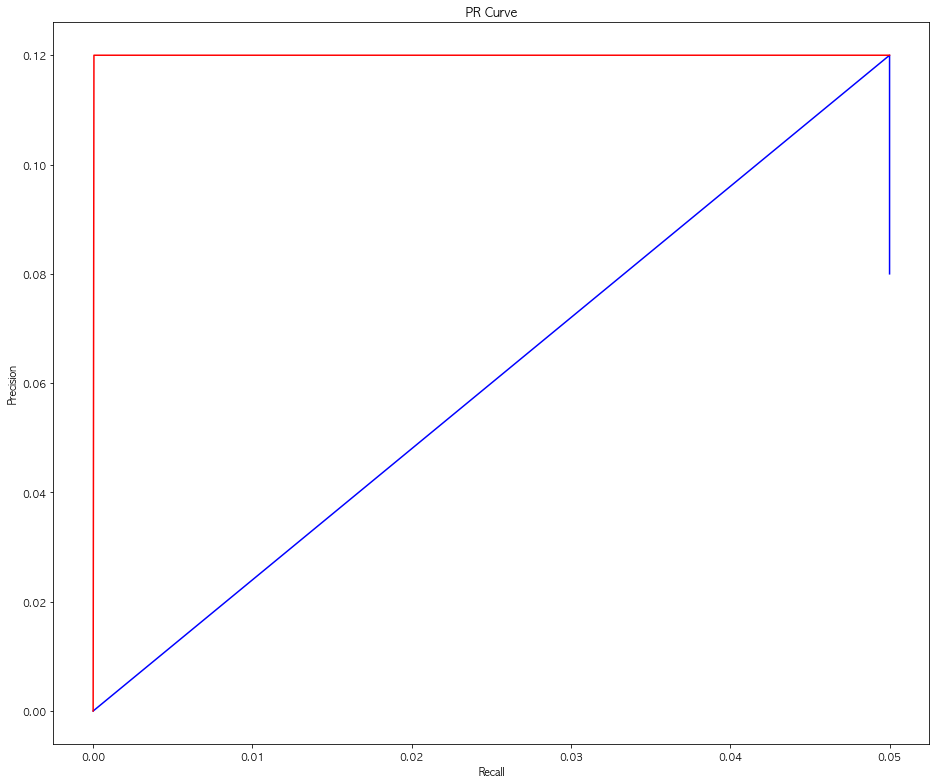

ap is 0.0

검출되어야 할 개수 : 21

   time Confidense Result
0     1     66.81%     FP
1     2     63.57%     FP
2     3     70.52%     FP
3     4     58.25%     No
4     5     84.85%     TP
5     6    -221.3%     No
6     7     74.77%     FP
7     8     24.91%     No
8     9     85.09%     TP
9    10     28.51%     No
10   11     97.42%     TP
11   12   -162.47%     No
12   13    -60.39%     No
13   14    -88.17%     No
14   15     40.95%     No
15   16    -735.8%     No
16   17     70.79%     FP
17   18     61.64%     FP
18   19     50.65%     No
19   20     70.75%     FP
20   21     67.87%     FP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     66.81%       FP     0     1    0/1=0.0   0/21=0.0   
1     1     63.57%       FP     0     2    0/2=0.0   0/21=0.0   
2     2     70.52%       FP     0     3    0/3=0.0   0/21=0.0   
3     4     84.85%       TP     1     3   1/4=0.25  1/21=0.05   
4     6     74.77%       FP     1     4    1/5=0.2  1/21=0.05   
5     8   

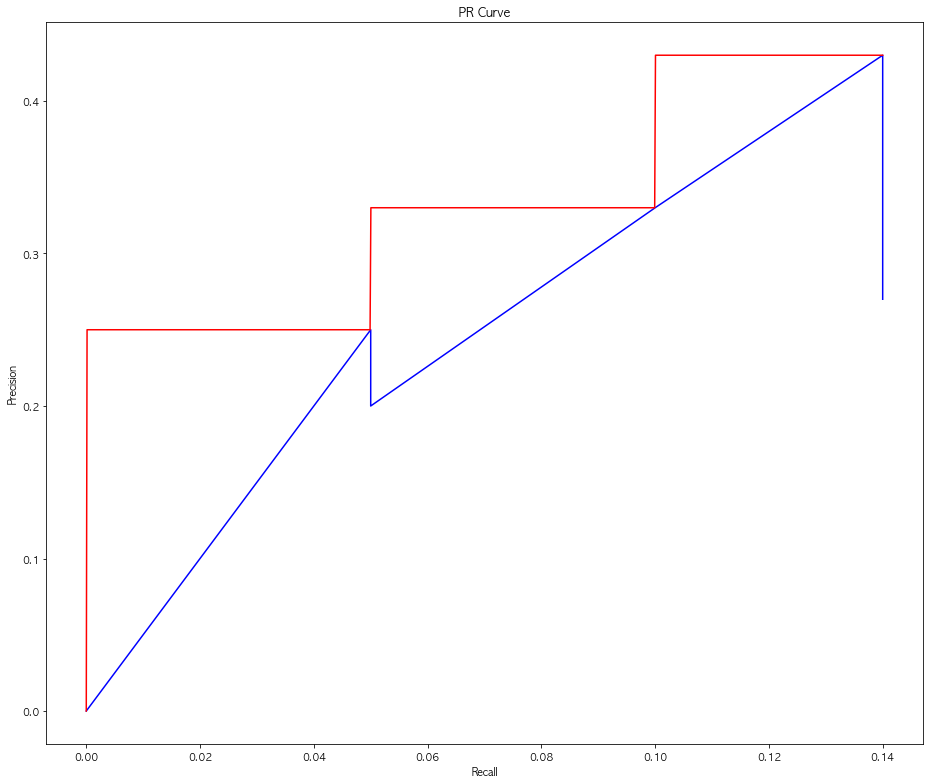

ap is 0.028901101101101105

검출되어야 할 개수 : 21

   time Confidense Result
0     1     72.07%     FP
1     2     67.69%     FP
2     3     75.34%     TP
3     4     63.82%     FP
4     5     98.83%     TP
5     6   -119.22%     No
6     7     90.31%     TP
7     8     96.97%     TP
8     9     65.75%     FP
9    10     27.66%     No
10   11      44.9%     No
11   12     99.93%     TP
12   13     17.36%     No
13   14   -275.08%     No
14   15   -266.57%     No
15   16   -522.35%     No
16   17   -182.35%     No
17   18     99.38%     TP
18   19     57.38%     No
19   20     85.09%     TP
20   21     68.78%     FP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     72.07%       FP     0     1    0/1=0.0   0/21=0.0   
1     1     67.69%       FP     0     2    0/2=0.0   0/21=0.0   
2     2     75.34%       TP     1     2   1/3=0.33  1/21=0.05   
3     3     63.82%       FP     1     3   1/4=0.25  1/21=0.05   
4     4     98.83%       TP     2     3    2/5=0.4   2/21=

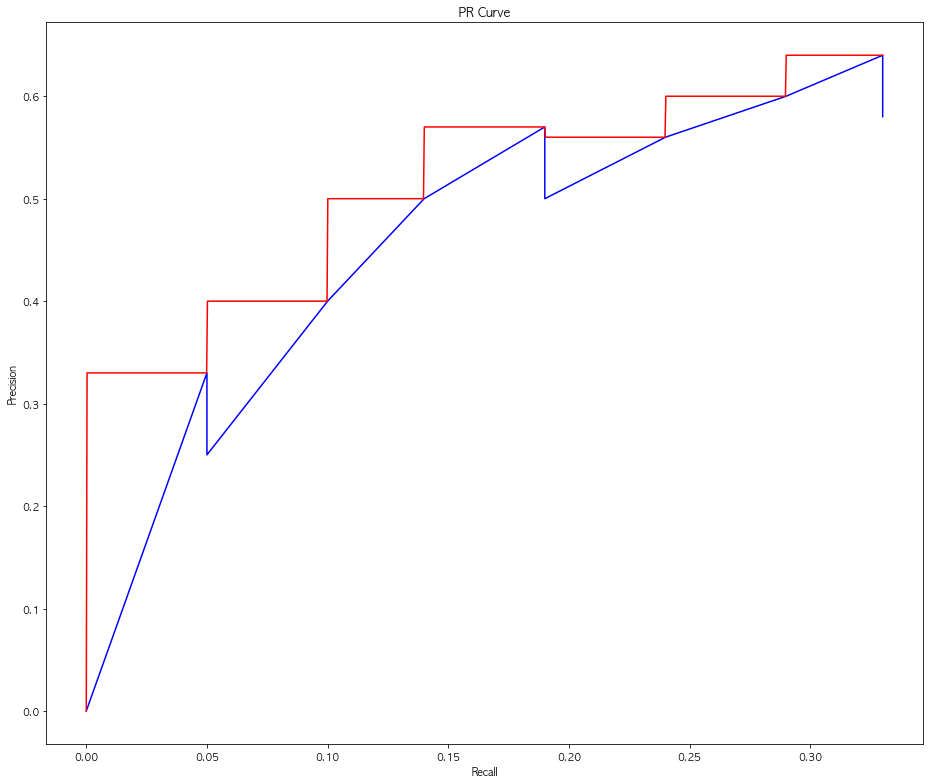

ap is 0.14190000000000003

검출되어야 할 개수 : 21

   time Confidense Result
0     1     66.01%     FP
1     2     62.81%     FP
2     3     73.33%     FP
3     4     59.74%     No
4     5     79.06%     TP
5     6     23.75%     No
6     7     51.86%     No
7     8     79.28%     TP
8     9     71.14%     FP
9    10     19.16%     No
10   11     57.79%     No
11   12     87.54%     TP
12   13     95.43%     TP
13   14   -105.33%     No
14   15     57.53%     No
15   16    -83.96%     No
16   17     45.17%     No
17   18     58.41%     No
18   19     55.54%     No
19   20     72.79%     FP
20   21     71.68%     FP
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    0     66.01%       FP     0     1   0/1=0.0   0/21=0.0             0.00   
1    1     62.81%       FP     0     2   0/2=0.0   0/21=0.0             0.00   
2    2     73.33%       FP     0     3   0/3=0.0   0/21=0.0             0.00   
3    4     79.06%       TP     1     3  1/4=0.25  1/21=0.05     

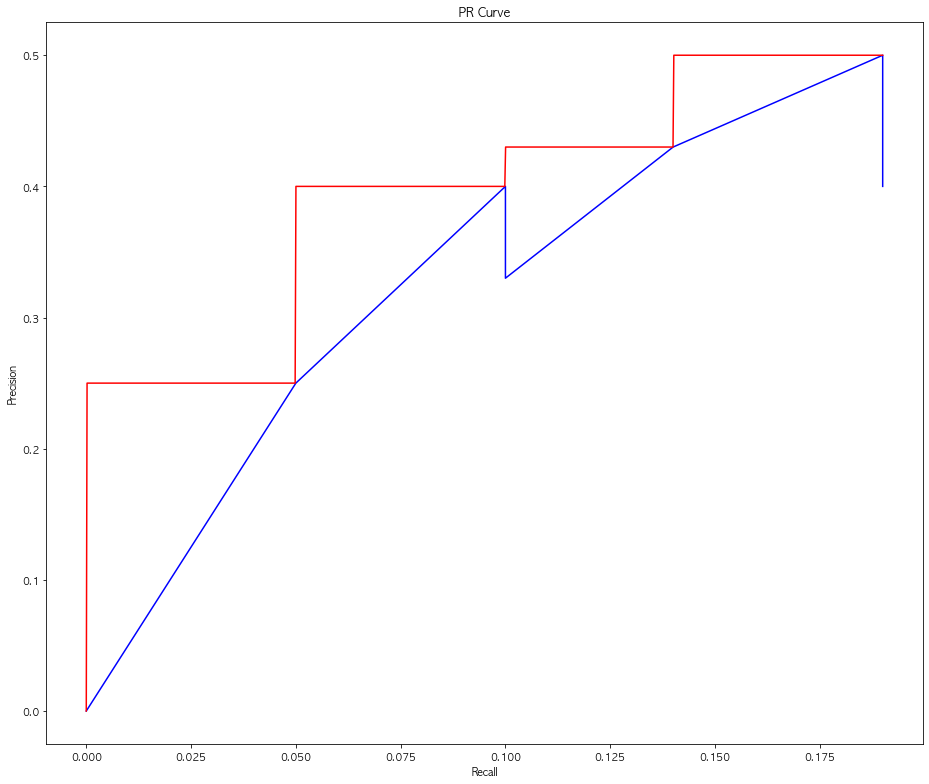

ap is 0.04951601601601602

검출되어야 할 개수 : 21

   time Confidense Result
0     1     70.23%     FP
1     2     67.69%     FP
2     3     75.34%     TP
3     4     62.96%     FP
4     5     66.05%     FP
5     6     80.32%     TP
6     7     71.66%     FP
7     8     95.24%     TP
8     9     65.75%     FP
9    10     19.98%     No
10   11     78.44%     TP
11   12     43.33%     No
12   13     30.05%     No
13   14      1.21%     No
14   15     70.97%     FP
15   16  -1830.97%     No
16   17   -300.91%     No
17   18     87.46%     TP
18   19     76.42%     TP
19   20      83.4%     TP
20   21     67.87%     FP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     70.23%       FP     0     1    0/1=0.0   0/21=0.0   
1     1     67.69%       FP     0     2    0/2=0.0   0/21=0.0   
2     2     75.34%       TP     1     2   1/3=0.33  1/21=0.05   
3     3     62.96%       FP     1     3   1/4=0.25  1/21=0.05   
4     4     66.05%       FP     1     4    1/5=0.2  1/21=0.

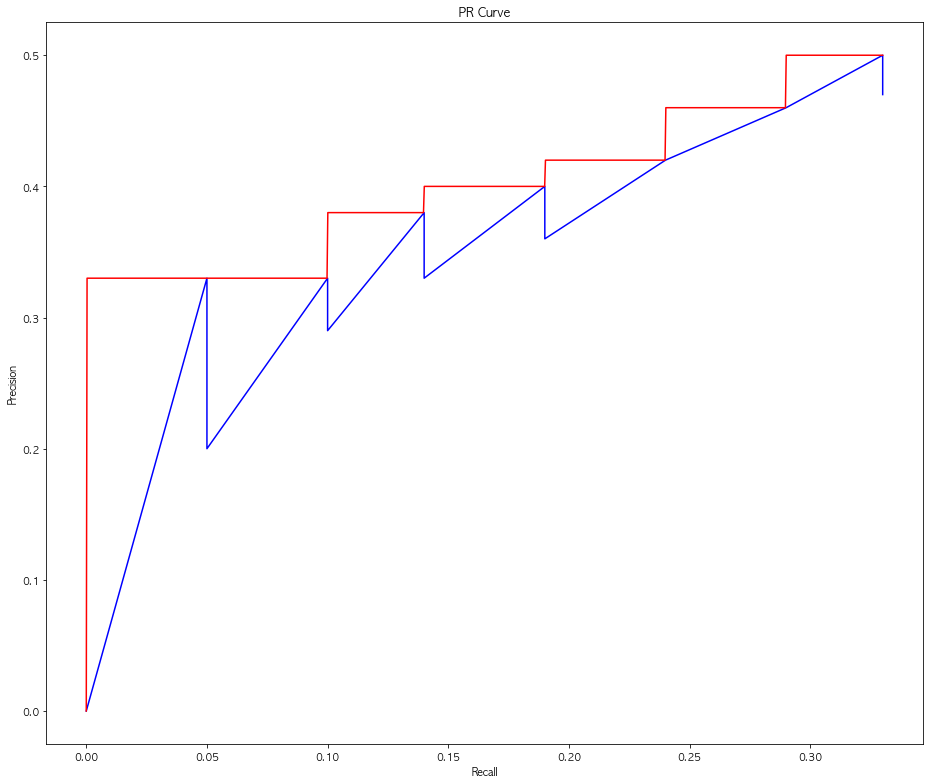

ap is 0.11143033033033035

검출되어야 할 개수 : 21

   time Confidense Result
0     1     71.14%     FP
1     2     63.57%     FP
2     3     72.37%     FP
3     4     59.74%     No
4     5     84.85%     TP
5     6     84.64%     TP
6     7      69.6%     FP
7     8     88.72%     TP
8     9     62.21%     FP
9    10     16.46%     No
10   11     43.29%     No
11   12     43.33%     No
12   13     23.93%     No
13   14   -383.16%     No
14   15    -77.32%     No
15   16   -257.96%     No
16   17   -374.66%     No
17   18     56.02%     No
18   19     89.29%     TP
19   20     94.68%     TP
20   21     66.98%     FP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     71.14%       FP     0     1    0/1=0.0   0/21=0.0   
1     1     63.57%       FP     0     2    0/2=0.0   0/21=0.0   
2     2     72.37%       FP     0     3    0/3=0.0   0/21=0.0   
3     4     84.85%       TP     1     3   1/4=0.25  1/21=0.05   
4     5     84.64%       TP     2     3    2/5=0.4   2/21=0

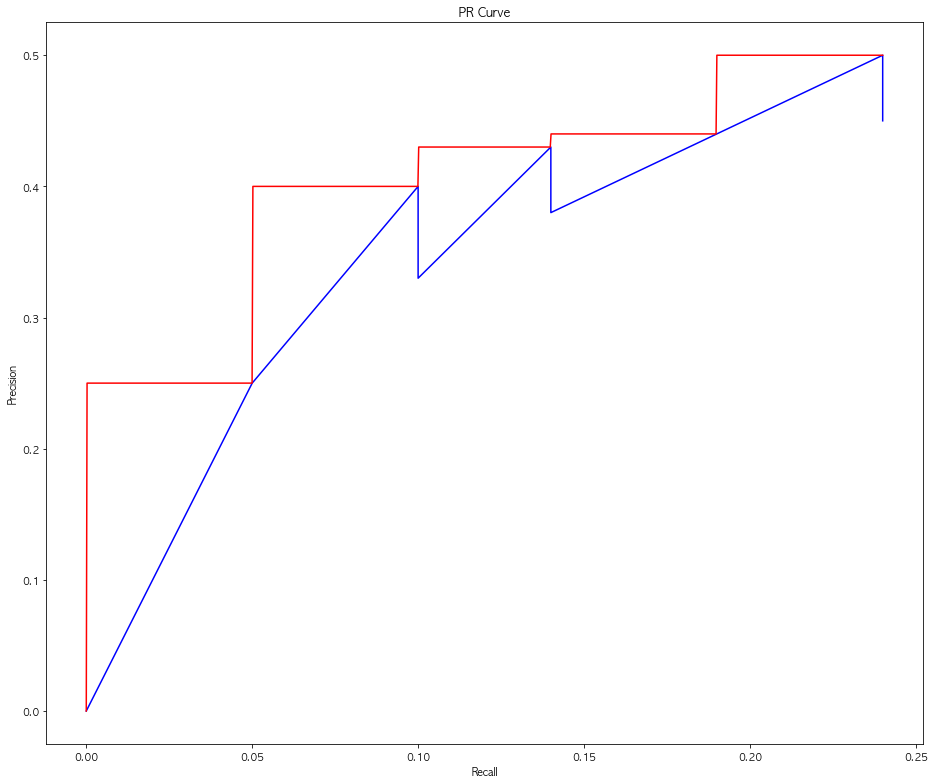

ap is 0.07125045045045045

검출되어야 할 개수 : 21

   time Confidense Result
0     1     70.23%     FP
1     2     64.36%     FP
2     3     67.09%     FP
3     4     56.15%     No
4     5     69.55%     FP
5     6     82.56%     TP
6     7     65.84%     FP
7     8   -194.94%     No
8     9     43.71%     No
9    10     25.12%     No
10   11      68.6%     FP
11   12     70.05%     FP
12   13     79.94%     TP
13   14     98.21%     TP
14   15     75.67%     TP
15   16     98.56%     TP
16   17     51.07%     No
17   18     75.59%     TP
18   19     74.77%     FP
19   20     90.97%     TP
20   21     84.54%     TP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     70.23%       FP     0     1    0/1=0.0   0/21=0.0   
1     1     64.36%       FP     0     2    0/2=0.0   0/21=0.0   
2     2     67.09%       FP     0     3    0/3=0.0   0/21=0.0   
3     4     69.55%       FP     0     4    0/4=0.0   0/21=0.0   
4     5     82.56%       TP     1     4    1/5=0.2  1/21=0.

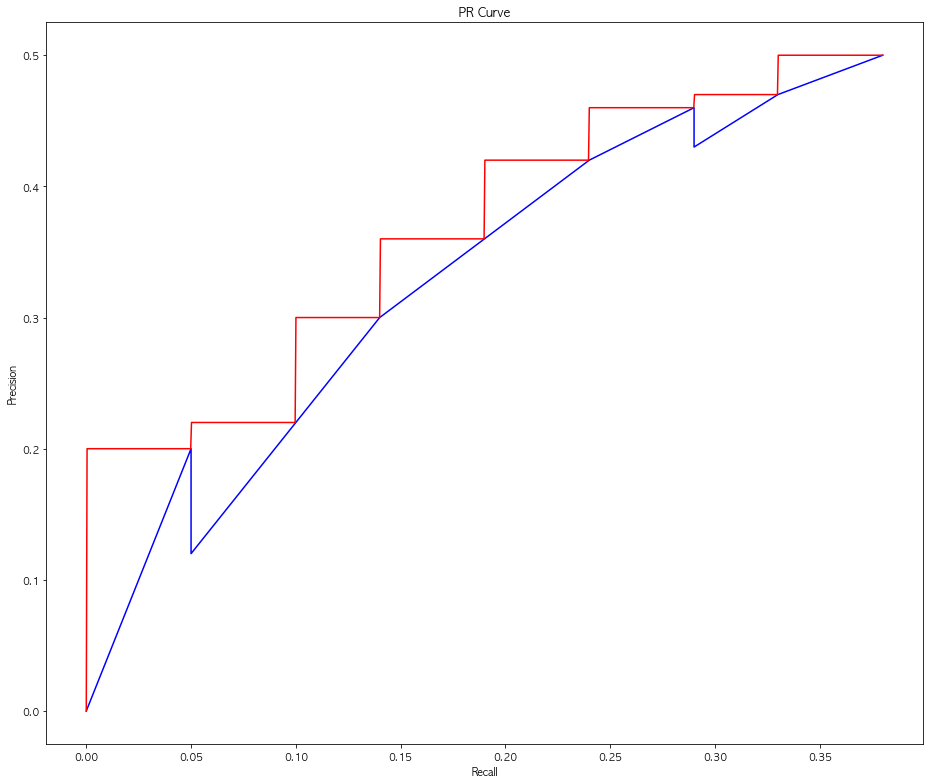

ap is 0.11283603603603604

검출되어야 할 개수 : 21

   time Confidense Result
0     1     84.23%     TP
1     2     80.15%     TP
2     3     80.64%     TP
3     4     72.77%     FP
4     5     91.56%     TP
5     6     97.81%     TP
6     7     82.05%     TP
7     8      91.8%     TP
8     9     61.75%     FP
9    10     16.63%     No
10   11     40.12%     No
11   12     97.82%     TP
12   13     87.06%     TP
13   14      71.0%     FP
14   15     56.81%     No
15   16     62.98%     FP
16   17     57.22%     No
17   18     49.72%     No
18   19     47.85%     No
19   20     67.89%     FP
20   21     66.98%     FP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     84.23%       TP     1     0    1/1=1.0  1/21=0.05   
1     1     80.15%       TP     2     0    2/2=1.0   2/21=0.1   
2     2     80.64%       TP     3     0    3/3=1.0  3/21=0.14   
3     3     72.77%       FP     3     1   3/4=0.75  3/21=0.14   
4     4     91.56%       TP     4     1    4/5=0.8  4/21=0.

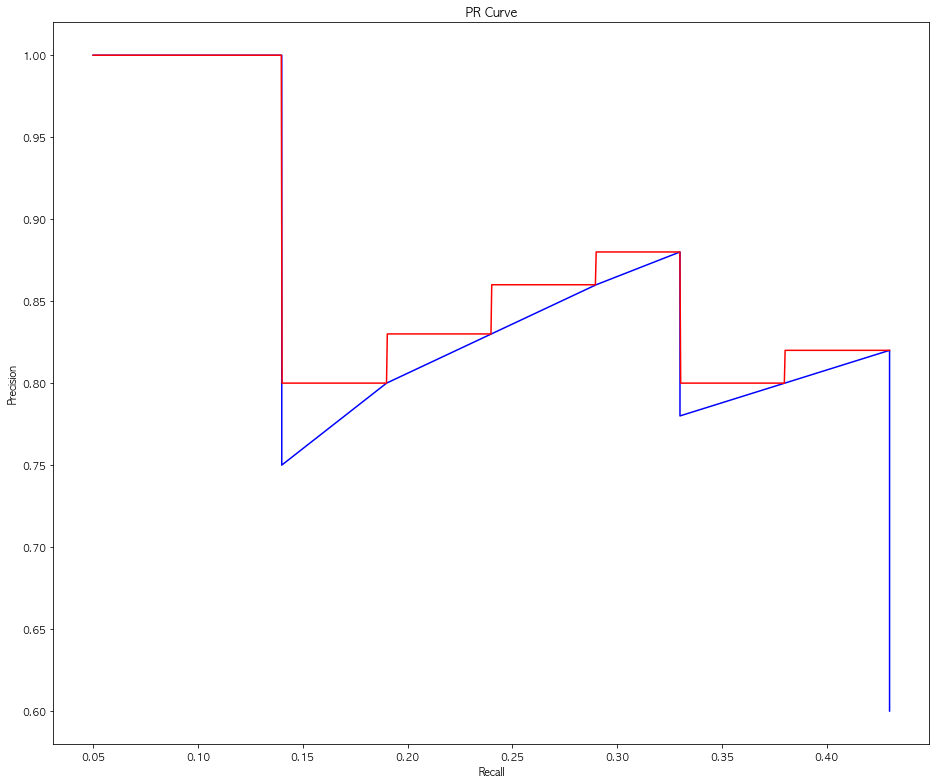

ap is 0.2879099099099099

검출되어야 할 개수 : 21

   time Confidense Result
0     1     67.63%     FP
1     2     63.57%     FP
2     3     72.37%     FP
3     4     59.74%     No
4     5     74.75%     FP
5     6     94.83%     TP
6     7     90.31%     TP
7     8     81.77%     TP
8     9     61.12%     FP
9    10     16.76%     No
10   11     47.55%     No
11   12     32.35%     No
12   13     93.14%     TP
13   14   -105.33%     No
14   15     -7.26%     No
15   16     81.34%     TP
16   17   -341.49%     No
17   18     79.17%     TP
18   19     62.58%     FP
19   20     89.63%     TP
20   21     66.98%     FP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     67.63%       FP     0     1    0/1=0.0   0/21=0.0   
1     1     63.57%       FP     0     2    0/2=0.0   0/21=0.0   
2     2     72.37%       FP     0     3    0/3=0.0   0/21=0.0   
3     4     74.75%       FP     0     4    0/4=0.0   0/21=0.0   
4     5     94.83%       TP     1     4    1/5=0.2  1/21=0.0

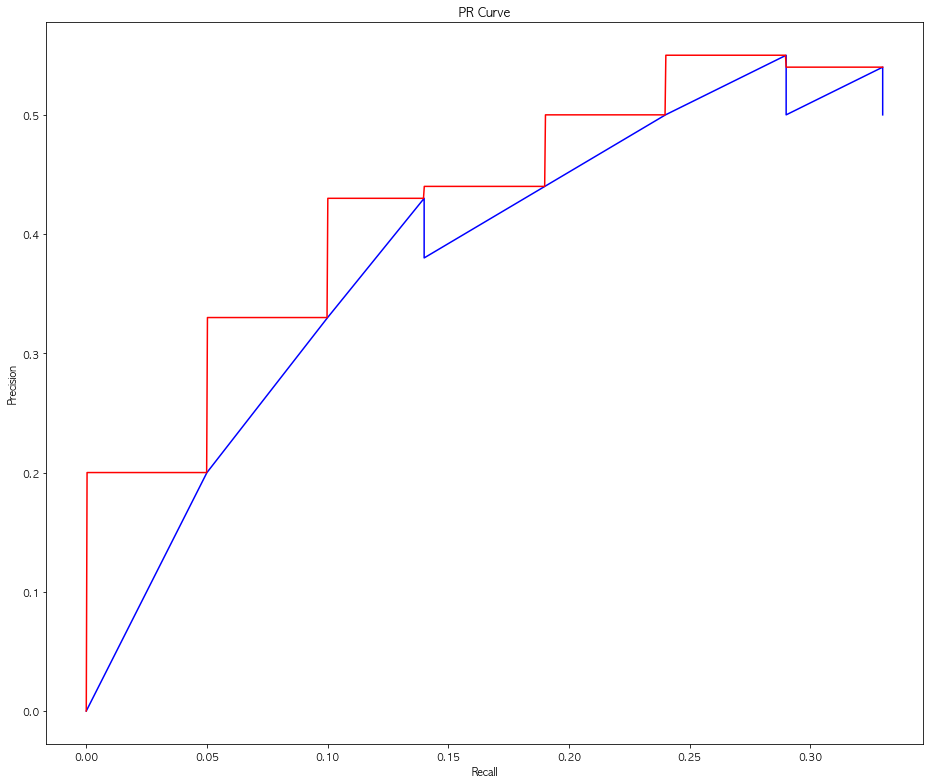

ap is 0.1172804804804805

검출되어야 할 개수 : 21

   time Confidense Result
0     1     66.01%     FP
1     2     62.81%     FP
2     3     75.34%     TP
3     4     58.99%     No
4     5     75.94%     TP
5     6     84.24%     TP
6     7     67.66%     FP
7     8      93.5%     TP
8     9      43.5%     No
9    10      24.1%     No
10   11     56.44%     No
11   12     64.11%     FP
12   13     77.93%     TP
13   14     21.93%     No
14   15     66.78%     FP
15   16    -83.96%     No
16   17   -374.66%     No
17   18     81.09%     TP
18   19     66.18%     FP
19   20     77.26%     TP
20   21     71.68%     FP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     66.01%       FP     0     1    0/1=0.0   0/21=0.0   
1     1     62.81%       FP     0     2    0/2=0.0   0/21=0.0   
2     2     75.34%       TP     1     2   1/3=0.33  1/21=0.05   
3     4     75.94%       TP     2     2    2/4=0.5   2/21=0.1   
4     5     84.24%       TP     3     2    3/5=0.6  3/21=0.1

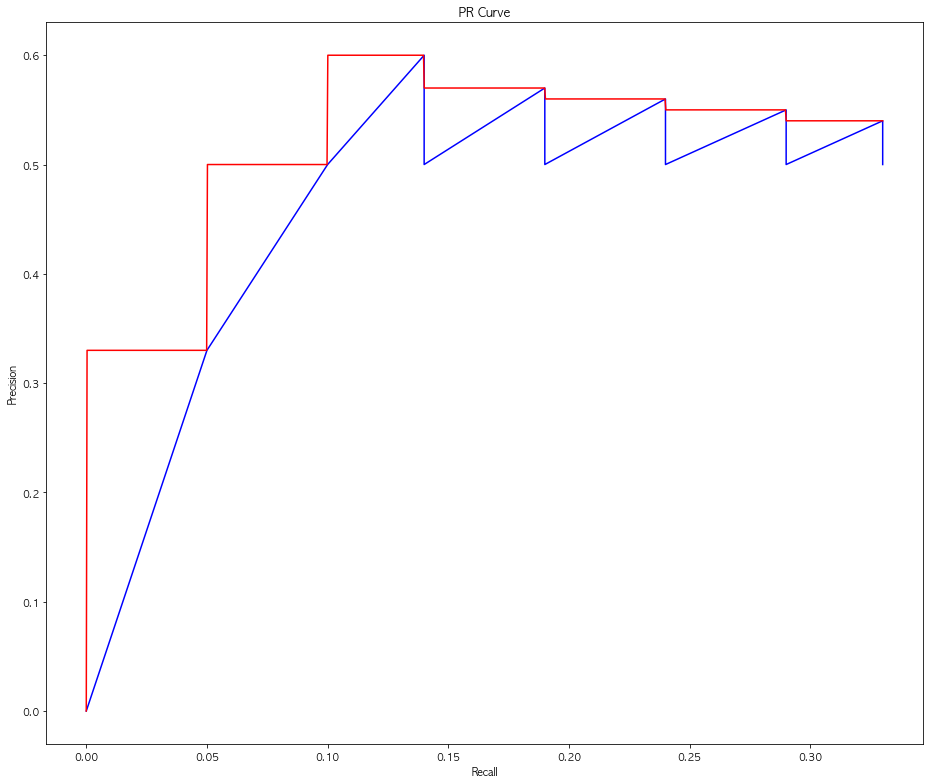

ap is 0.14834144144144149

검출되어야 할 개수 : 21

   time Confidense Result
0     1     75.02%     TP
1     2     65.98%     FP
2     3     74.32%     FP
3     4     66.55%     FP
4     5     91.56%     TP
5     6      1.53%     No
6     7     77.92%     TP
7     8     75.18%     TP
8     9     69.71%     FP
9    10     27.66%     No
10   11     45.75%     No
11   12     73.68%     FP
12   13     80.05%     TP
13   14     95.31%     TP
14   15     85.83%     TP
15   16      84.4%     TP
16   17    -14.36%     No
17   18     81.09%     TP
18   19     68.81%     FP
19   20     94.68%     TP
20   21     84.78%     TP
   Time Confidense TP or FP 누적 TP 누적 FP   Precision      Recall  \
0     0     75.02%       TP     1     0     1/1=1.0   1/21=0.05   
1     1     65.98%       FP     1     1     1/2=0.5   1/21=0.05   
2     2     74.32%       FP     1     2    1/3=0.33   1/21=0.05   
3     3     66.55%       FP     1     3    1/4=0.25   1/21=0.05   
4     4     91.56%       TP     2     3     2/5=0

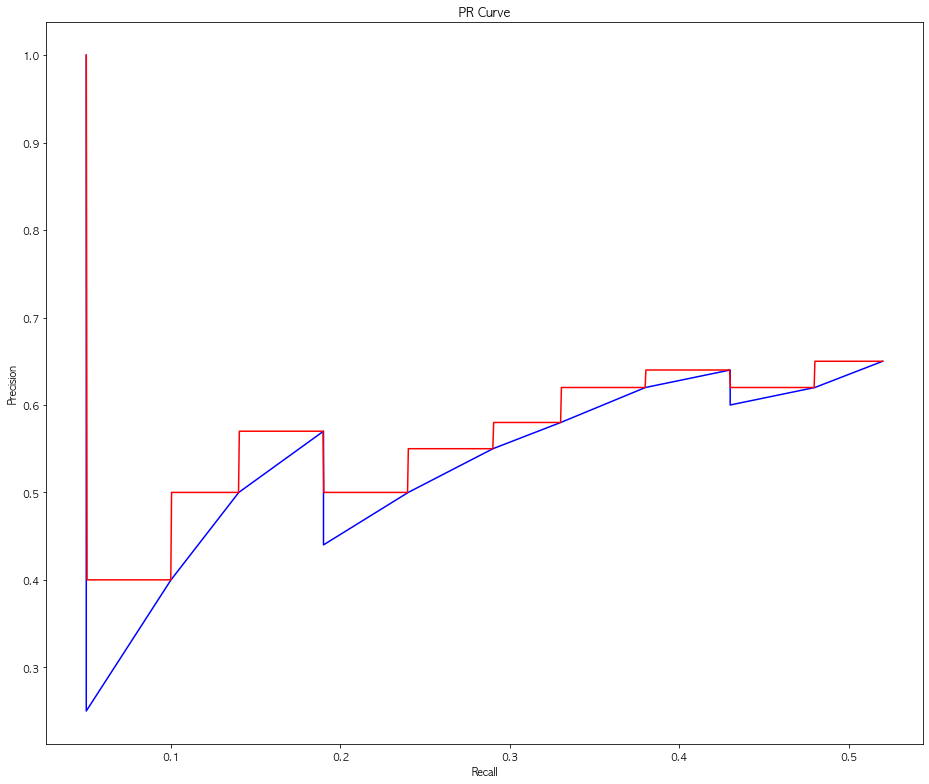

ap is 0.23559749749749748

검출되어야 할 개수 : 21

   time Confidense Result
0     1     81.72%     TP
1     2     77.76%     TP
2     3     96.41%     TP
3     4     96.92%     TP
4     5     25.72%     No
5     6     46.65%     No
6     7     73.83%     FP
7     8     45.64%     No
8     9     68.33%     FP
9    10      29.4%     No
10   11     63.91%     FP
11   12    -78.15%     No
12   13   -109.85%     No
13   14   -124.67%     No
14   15    -77.32%     No
15   16   -865.68%     No
16   17      85.9%     TP
17   18      64.0%     FP
18   19     52.98%     No
19   20     70.75%     FP
20   21     68.78%     FP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     81.72%       TP     1     0    1/1=1.0  1/21=0.05   
1     1     77.76%       TP     2     0    2/2=1.0   2/21=0.1   
2     2     96.41%       TP     3     0    3/3=1.0  3/21=0.14   
3     3     96.92%       TP     4     0    4/4=1.0  4/21=0.19   
4     6     73.83%       FP     4     1    4/5=0.8  4/21=0.

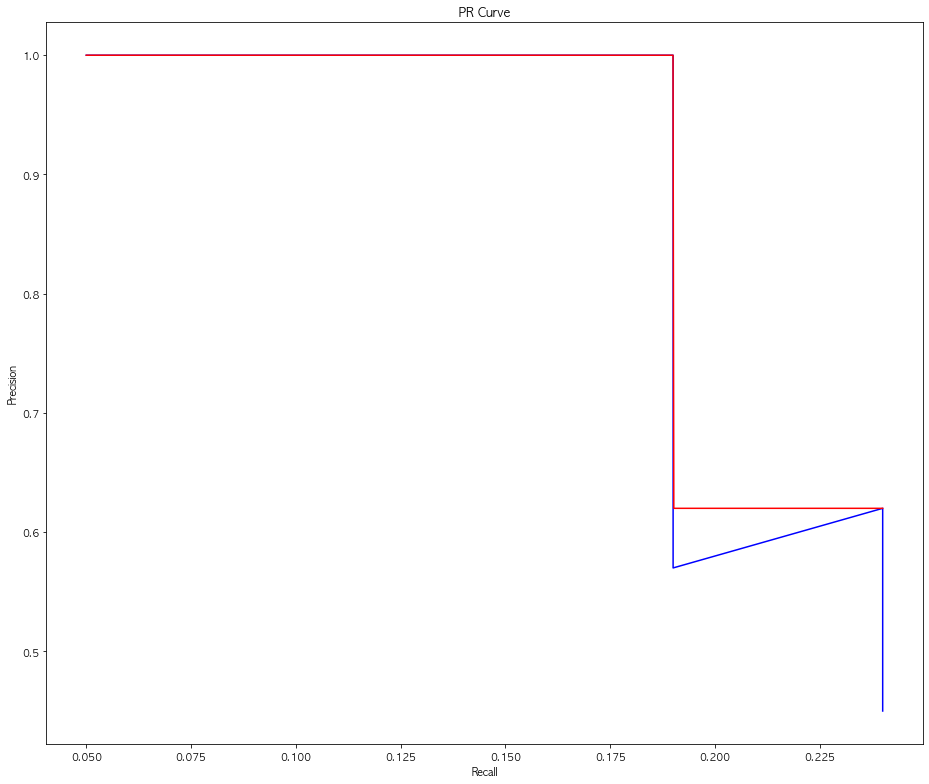

ap is 0.13997997997998002

검출되어야 할 개수 : 21

   time Confidense Result
0     1     68.48%     FP
1     2     66.83%     FP
2     3     71.43%     FP
3     4     61.31%     FP
4     5     98.83%     TP
5     6     60.26%     FP
6     7     64.09%     FP
7     8     95.24%     TP
8     9     71.14%     FP
9    10     19.98%     No
10   11      44.9%     No
11   12     36.18%     No
12   13     41.09%     No
13   14      1.21%     No
14   15     62.31%     FP
15   16  -2302.42%     No
16   17   -148.24%     No
17   18     85.22%     TP
18   19     67.47%     FP
19   20     97.62%     TP
20   21     90.81%     TP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     68.48%       FP     0     1    0/1=0.0   0/21=0.0   
1     1     66.83%       FP     0     2    0/2=0.0   0/21=0.0   
2     2     71.43%       FP     0     3    0/3=0.0   0/21=0.0   
3     3     61.31%       FP     0     4    0/4=0.0   0/21=0.0   
4     4     98.83%       TP     1     4    1/5=0.2  1/21=0.

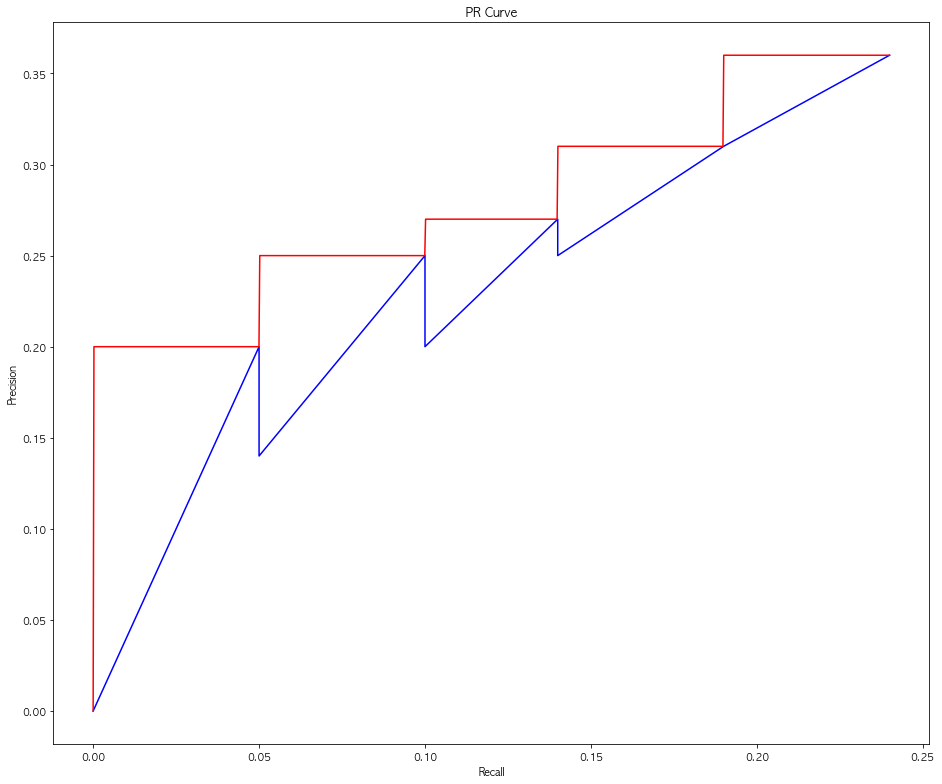

ap is 0.04849729729729729

검출되어야 할 개수 : 21

   time Confidense Result
0     1     85.54%     TP
1     2     80.15%     TP
2     3     87.26%     TP
3     4     70.57%     FP
4     5     86.11%     TP
5     6     76.41%     TP
6     7  -5933.45%     No
7     8    -801.6%     No
8     9  -4182.35%     No
9    10     70.31%     FP
10   11     17.13%     No
11   12   -343.16%     No
12   13    -42.14%     No
13   14     11.56%     No
14   15      6.58%     No
15   16     28.89%     No
16   17     88.29%     TP
17   18     77.33%     TP
18   19     67.47%     FP
19   20     88.06%     TP
20   21     86.21%     TP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     85.54%       TP     1     0    1/1=1.0  1/21=0.05   
1     1     80.15%       TP     2     0    2/2=1.0   2/21=0.1   
2     2     87.26%       TP     3     0    3/3=1.0  3/21=0.14   
3     3     70.57%       FP     3     1   3/4=0.75  3/21=0.14   
4     4     86.11%       TP     4     1    4/5=0.8  4/21=0.

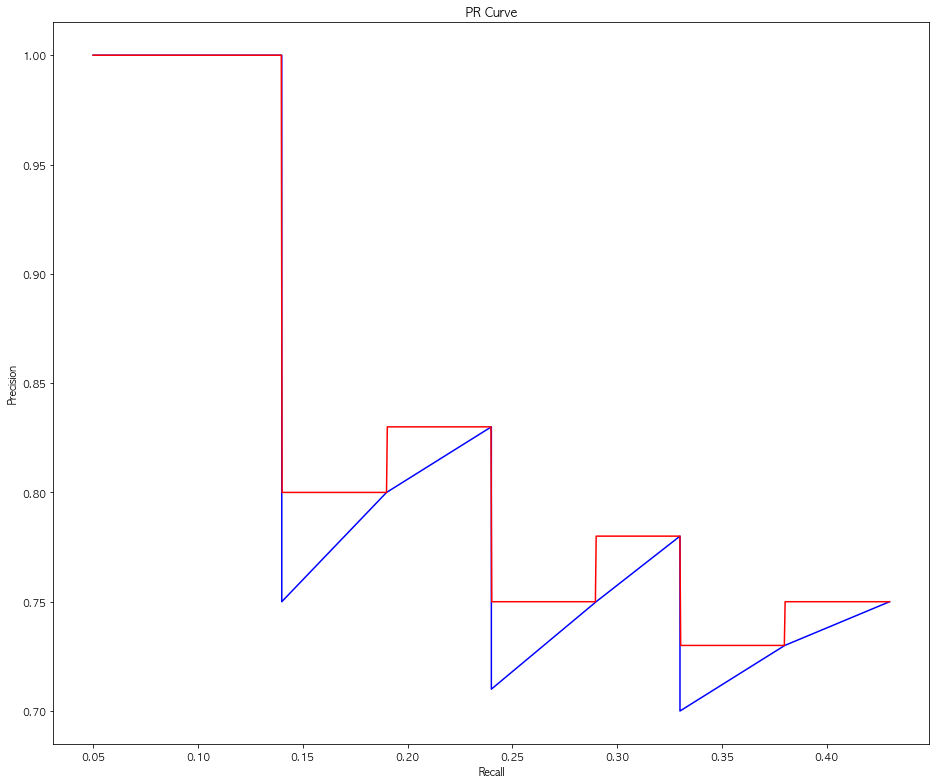

ap is 0.275015015015015

검출되어야 할 개수 : 21

   time Confidense Result
0     1     92.76%     TP
1     2     85.39%     TP
2     3     90.11%     TP
3     4      77.6%     TP
4     5     97.75%     TP
5     6     70.26%     FP
6     7     79.36%     TP
7     8     86.64%     TP
8     9     81.17%     TP
9    10      4.92%     No
10   11     67.35%     FP
11   12    -54.33%     No
12   13    -30.72%     No
13   14     74.08%     FP
14   15     60.14%     FP
15   16     73.26%     FP
16   17     64.83%     FP
17   18     57.41%     No
18   19     52.98%     No
19   20     73.86%     FP
20   21     74.83%     FP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     92.76%       TP     1     0    1/1=1.0  1/21=0.05   
1     1     85.39%       TP     2     0    2/2=1.0   2/21=0.1   
2     2     90.11%       TP     3     0    3/3=1.0  3/21=0.14   
3     3      77.6%       TP     4     0    4/4=1.0  4/21=0.19   
4     4     97.75%       TP     5     0    5/5=1.0  5/21=0.24

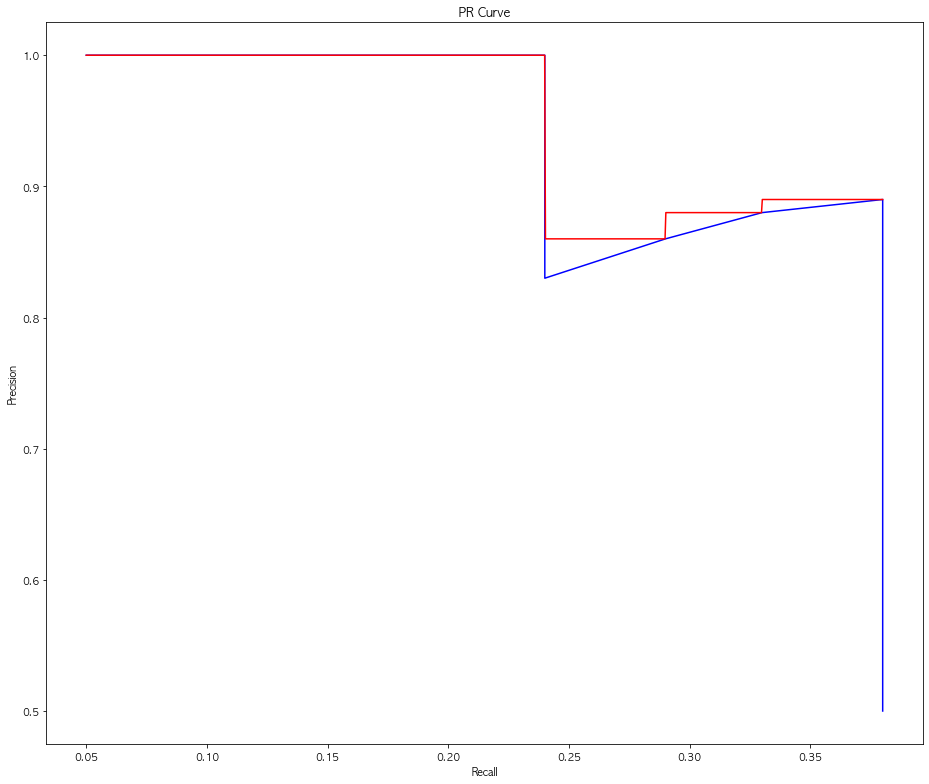

ap is 0.26743543543543546

검출되어야 할 개수 : 21

   time Confidense Result
0     1     73.03%     FP
1     2     70.43%     FP
2     3     77.45%     TP
3     4     65.61%     FP
4     5     95.17%     TP
5     6     83.14%     TP
6     7     97.56%     TP
7     8     76.95%     TP
8     9     47.04%     No
9    10     18.05%     No
10   11     30.27%     No
11   12     74.89%     FP
12   13     71.13%     FP
13   14     84.34%     TP
14   15     60.51%     FP
15   16     91.91%     TP
16   17     57.57%     No
17   18     79.77%     TP
18   19    -243.4%     No
19   20  -1128.54%     No
20   21     -2.49%     No
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     73.03%       FP     0     1    0/1=0.0   0/21=0.0   
1     1     70.43%       FP     0     2    0/2=0.0   0/21=0.0   
2     2     77.45%       TP     1     2   1/3=0.33  1/21=0.05   
3     3     65.61%       FP     1     3   1/4=0.25  1/21=0.05   
4     4     95.17%       TP     2     3    2/5=0.4   2/21=0

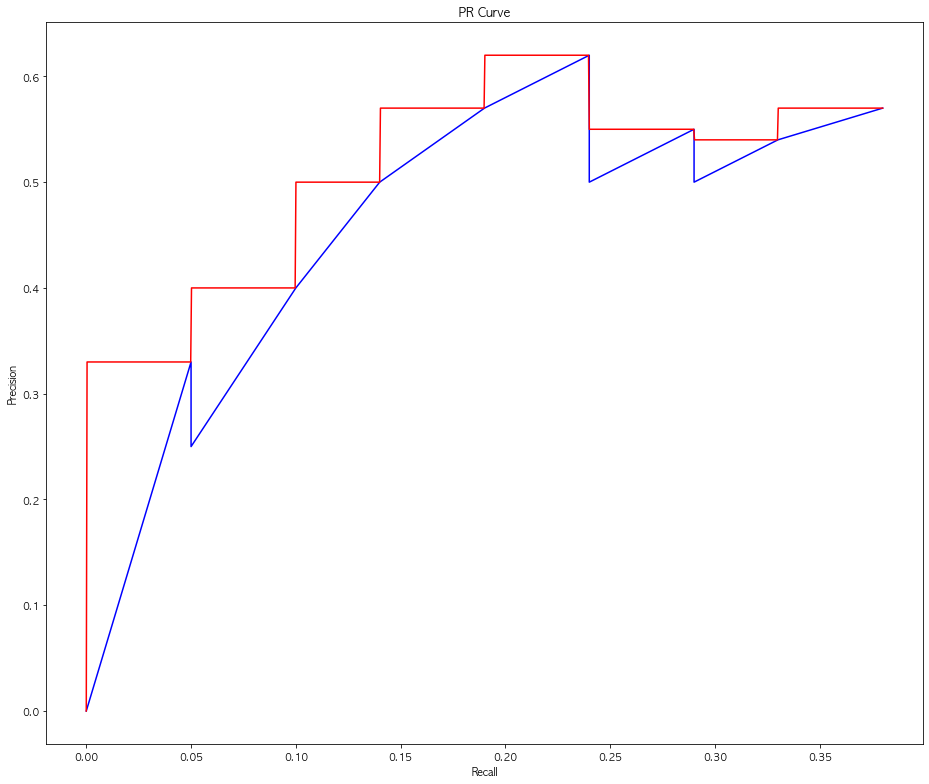

ap is 0.16368148148148148

검출되어야 할 개수 : 21

   time Confidense Result
0     1     82.96%     TP
1     2     77.76%     TP
2     3      85.9%     TP
3     4     73.92%     FP
4     5     56.06%     No
5     6     72.88%     FP
6     7     63.26%     FP
7     8     67.05%     FP
8     9     33.12%     No
9    10     18.05%     No
10   11     37.86%     No
11   12     84.61%     TP
12   13     82.92%     TP
13   14     92.72%     TP
14   15     54.12%     No
15   16     95.21%     TP
16   17     93.92%     TP
17   18     75.28%     TP
18   19   -711.12%     No
19   20   -1370.4%     No
20   21      5.24%     No
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     82.96%       TP     1     0    1/1=1.0  1/21=0.05   
1     1     77.76%       TP     2     0    2/2=1.0   2/21=0.1   
2     2      85.9%       TP     3     0    3/3=1.0  3/21=0.14   
3     3     73.92%       FP     3     1   3/4=0.75  3/21=0.14   
4     5     72.88%       FP     3     2    3/5=0.6  3/21=0.

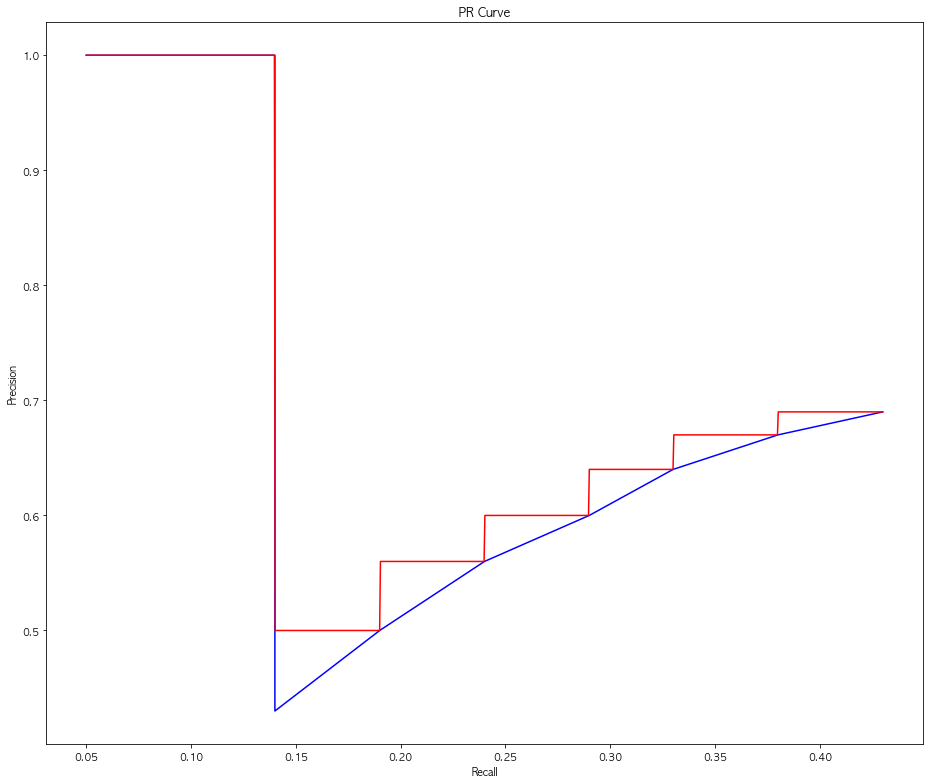

ap is 0.23073873873873876

검출되어야 할 개수 : 21

   time Confidense Result
0     1     56.25%     No
1     2     55.66%     No
2     3     28.76%     No
3     4     50.29%     No
4     5   -391.05%     No
5     6     89.44%     TP
6     7     49.17%     No
7     8     73.68%     FP
8     9      34.1%     No
9    10      10.3%     No
10   11     37.28%     No
11   12     75.86%     TP
12   13     85.65%     TP
13   14     -6.81%     No
14   15     85.83%     TP
15   16     88.29%     TP
16   17    -82.99%     No
17   18   -441.61%     No
18   19   -108.26%     No
19   20    -37.54%     No
20   21    -10.85%     No
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    5     89.44%       TP     1     0   1/1=1.0  1/21=0.05             1.00   
1    7     73.68%       FP     1     1   1/2=0.5  1/21=0.05             0.50   
2   11     75.86%       TP     2     1  2/3=0.67   2/21=0.1             0.67   
3   12     85.65%       TP     3     1  3/4=0.75  3/21=0.14     

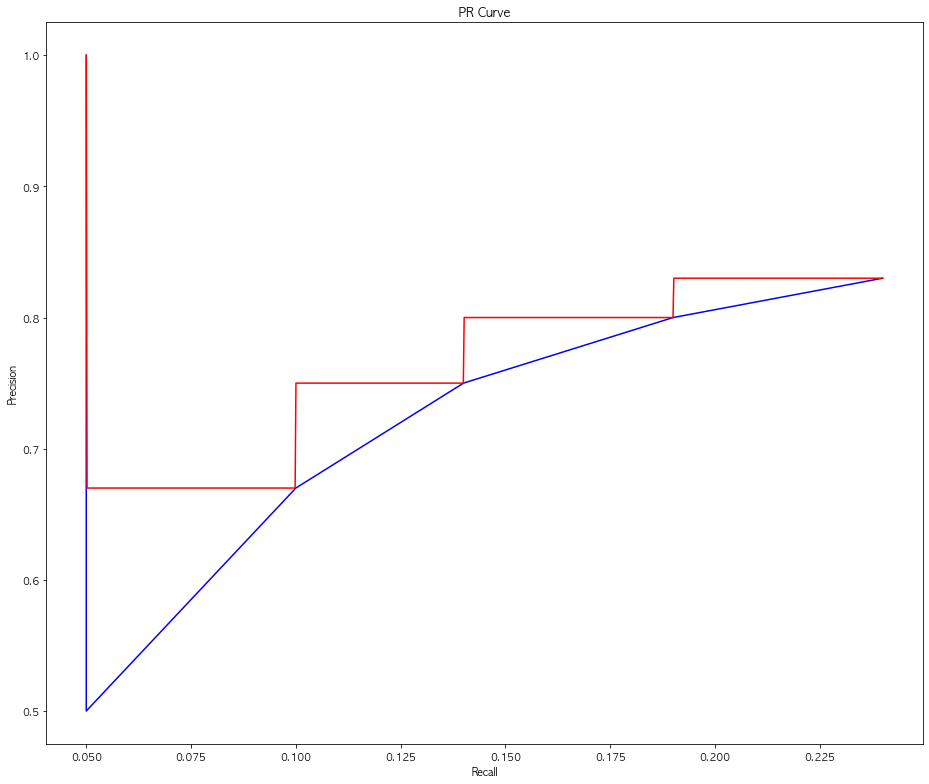

ap is 0.1030773773773774

검출되어야 할 개수 : 21

   time Confidense Result
0     1     39.44%     No
1     2     63.21%     FP
2     3     33.92%     No
3     4     54.93%     No
4     5    -60.61%     No
5     6     53.79%     No
6     7     51.79%     No
7     8     58.09%     No
8     9      43.5%     No
9    10     13.39%     No
10   11     36.71%     No
11   12     78.16%     TP
12   13     61.32%     FP
13   14     61.19%     FP
14   15     70.98%     FP
15   16      55.5%     No
16   17     66.39%     FP
17   18      74.6%     FP
18   19     91.42%     TP
19   20    -31.18%     No
20   21   -380.56%     No
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    1     63.21%       FP     0     1   0/1=0.0   0/21=0.0             0.00   
1   11     78.16%       TP     1     1   1/2=0.5  1/21=0.05             0.50   
2   12     61.32%       FP     1     2  1/3=0.33  1/21=0.05             0.33   
3   13     61.19%       FP     1     3  1/4=0.25  1/21=0.05      

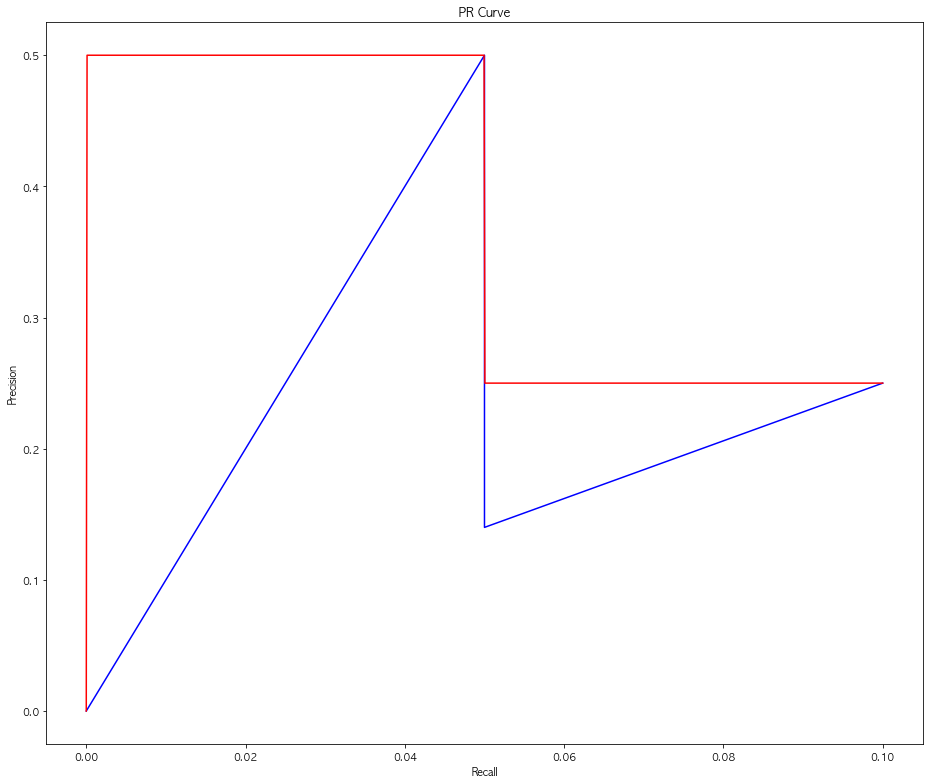

ap is 0.024924924924924926

검출되어야 할 개수 : 21

   time Confidense Result
0     1   -186.57%     No
1     2   -122.45%     No
2     3   -340.29%     No
3     4   -257.71%     No
4     5   -125.29%     No
5     6      56.0%     No
6     7     64.95%     FP
7     8     71.66%     FP
8     9     41.42%     No
9    10     14.65%     No
10   11     33.18%     No
11   12     82.66%     TP
12   13     69.12%     FP
13   14     56.75%     No
14   15     59.63%     No
15   16     87.31%     TP
16   17       2.8%     No
17   18  -1664.66%     No
18   19   -356.54%     No
19   20   -181.42%     No
20   21    -65.74%     No
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    6     64.95%       FP     0     1   0/1=0.0   0/21=0.0             0.00   
1    7     71.66%       FP     0     2   0/2=0.0   0/21=0.0             0.00   
2   11     82.66%       TP     1     2  1/3=0.33  1/21=0.05             0.33   
3   12     69.12%       FP     1     3  1/4=0.25  1/21=0.05    

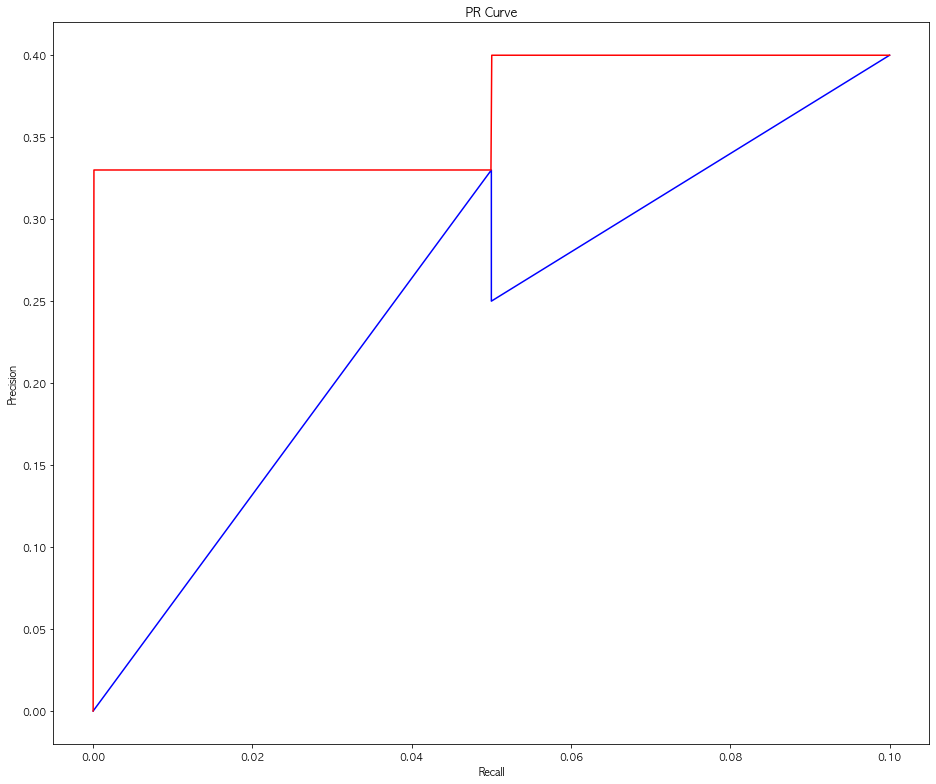

ap is 0.016450450450450453

검출되어야 할 개수 : 21

   time Confidense Result
0     1     24.01%     No
1     2     14.72%     No
2     3     23.27%     No
3     4     34.36%     No
4     5     25.72%     No
5     6   -375.29%     No
6     7    -128.4%     No
7     8   -568.01%     No
8     9     54.12%     No
9    10      63.2%     FP
10   11     47.05%     No
11   12  -8858.11%     No
12   13    -68.74%     No
13   14    -66.93%     No
14   15     37.27%     No
15   16     28.89%     No
16   17     31.82%     No
17   18     61.97%     FP
18   19     73.02%     FP
19   20      7.77%     No
20   21     41.52%     No
  Time Confidense TP or FP 누적 TP 누적 FP Precision    Recall  Precision Value  \
0    9      63.2%       FP     0     1   0/1=0.0  0/21=0.0              0.0   
1   17     61.97%       FP     0     2   0/2=0.0  0/21=0.0              0.0   
2   18     73.02%       FP     0     3   0/3=0.0  0/21=0.0              0.0   

   Recall Value  
0           0.0  
1           0.0  
2           

/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


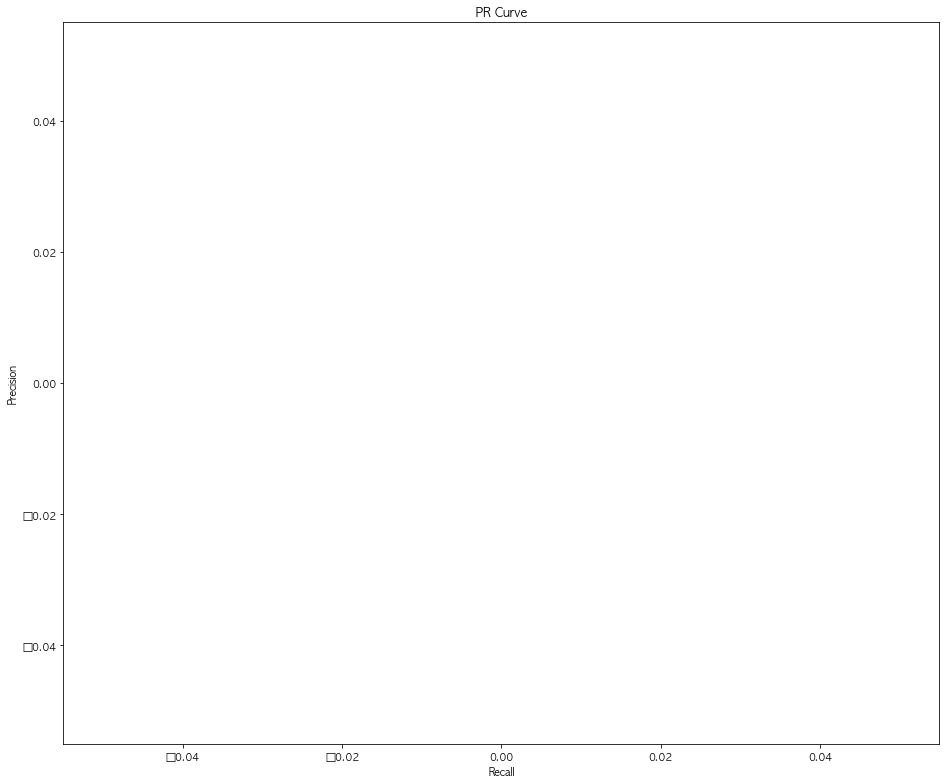

ap is 0

검출되어야 할 개수 : 21

   time  Confidense Result
0     1      56.25%     No
1     2      42.62%     No
2     3      43.35%     No
3     4      63.42%     FP
4     5   -2421.17%     No
5     6    -375.29%     No
6     7      44.34%     No
7     8      -6.93%     No
8     9   -4182.35%     No
9    10      48.67%     No
10   11      67.35%     FP
11   12     -795.3%     No
12   13    -279.35%     No
13   14    -116.33%     No
14   15      54.58%     No
15   16       6.78%     No
16   17    -300.91%     No
17   18    -681.19%     No
18   19   -1037.45%     No
19   20  -24021.44%     No
20   21    -508.15%     No
  Time Confidense TP or FP 누적 TP 누적 FP Precision    Recall  Precision Value  \
0    3     63.42%       FP     0     1   0/1=0.0  0/21=0.0              0.0   
1   10     67.35%       FP     0     2   0/2=0.0  0/21=0.0              0.0   

   Recall Value  
0           0.0  
1           0.0  


/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


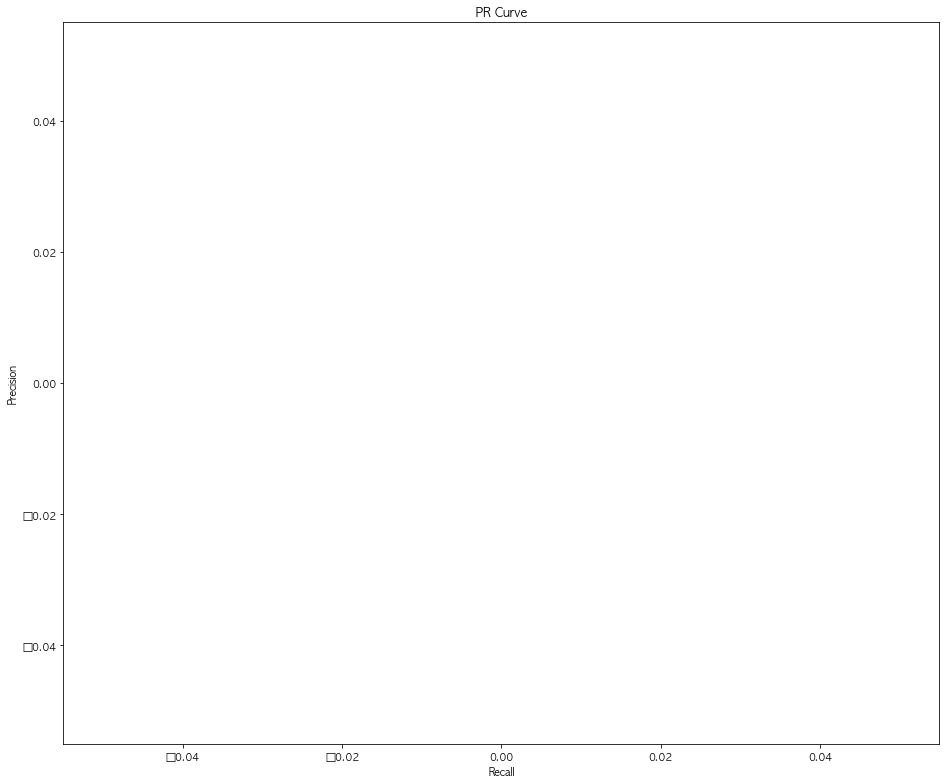

ap is 0

검출되어야 할 개수 : 21

   time  Confidense Result
0     1    -338.04%     No
1     2    -311.99%     No
2     3   -2297.89%     No
3     4    -552.62%     No
4     5    -542.75%     No
5     6      64.87%     FP
6     7      55.33%     No
7     8       60.8%     FP
8     9      33.44%     No
9    10      11.16%     No
10   11      25.21%     No
11   12      65.34%     FP
12   13      70.11%     FP
13   14      97.03%     TP
14   15      84.07%     TP
15   16      81.34%     TP
16   17      35.95%     No
17   18     -35.18%     No
18   19      29.03%     No
19   20  -24021.44%     No
20   21    -159.26%     No
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    5     64.87%       FP     0     1   0/1=0.0   0/21=0.0             0.00   
1    7      60.8%       FP     0     2   0/2=0.0   0/21=0.0             0.00   
2   11     65.34%       FP     0     3   0/3=0.0   0/21=0.0             0.00   
3   12     70.11%       FP     0     4   0/4=0.0   0/21=0.0 

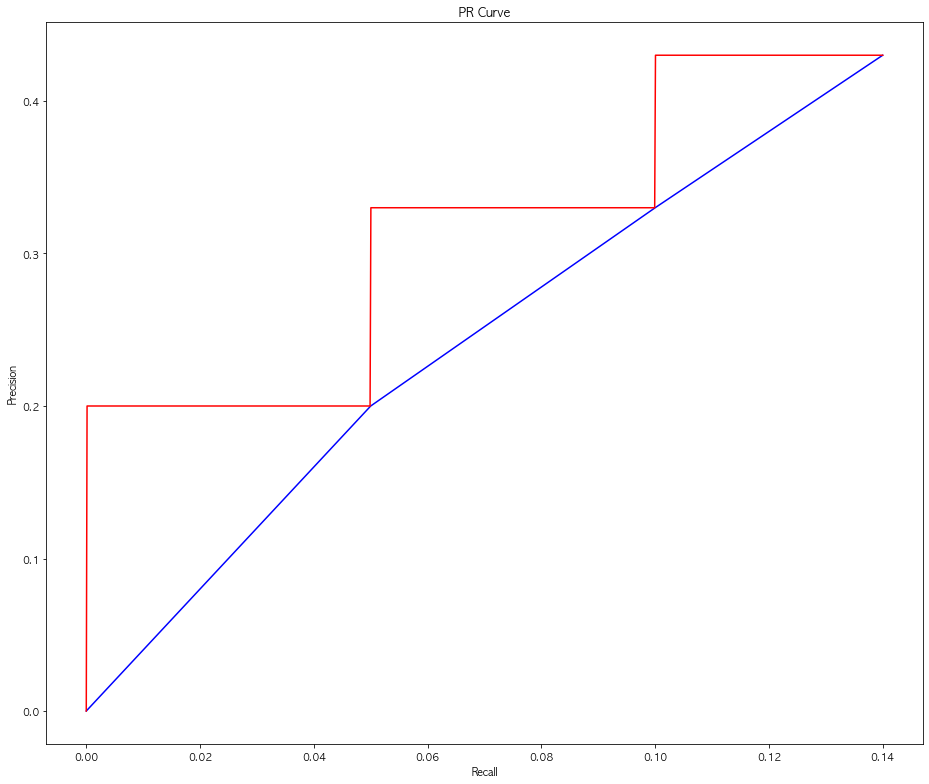

ap is 0.026413613613613617

검출되어야 할 개수 : 21

   time Confidense Result
0     1     -9.57%     No
1     2     14.72%     No
2     3    -18.79%     No
3     4     21.72%     No
4     5   -911.28%     No
5     6     55.69%     No
6     7     62.45%     FP
7     8     98.81%     TP
8     9     37.01%     No
9    10     27.66%     No
10   11      60.7%     FP
11   12     32.35%     No
12   13     41.09%     No
13   14    -458.0%     No
14   15   -120.68%     No
15   16   -115.62%     No
16   17    -40.81%     No
17   18     89.81%     TP
18   19     55.54%     No
19   20     72.79%     FP
20   21     77.09%     TP
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    6     62.45%       FP     0     1   0/1=0.0   0/21=0.0             0.00   
1    7     98.81%       TP     1     1   1/2=0.5  1/21=0.05             0.50   
2   10      60.7%       FP     1     2  1/3=0.33  1/21=0.05             0.33   
3   17     89.81%       TP     2     2   2/4=0.5   2/21=0.1    

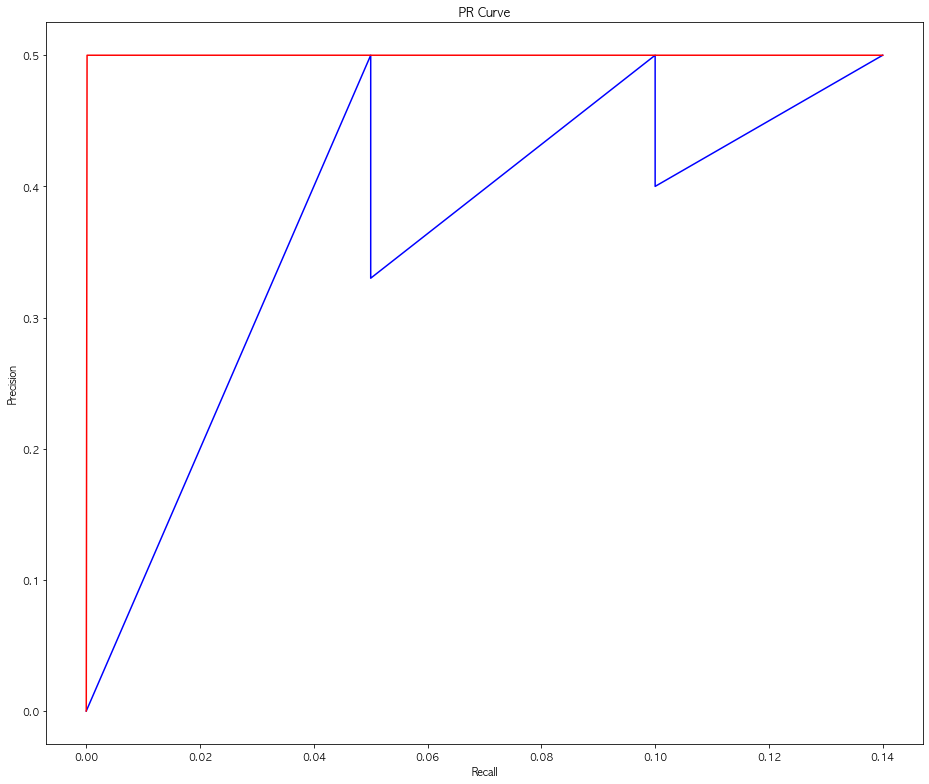

ap is 0.0

검출되어야 할 개수 : 21

   time Confidense Result
0     1     70.23%     FP
1     2     69.49%     FP
2     3     72.37%     FP
3     4     64.71%     FP
4     5     84.85%     TP
5     6    -33.67%     No
6     7  -2000.08%     No
7     8  -1039.62%     No
8     9   -715.31%     No
9    10   -980.32%     No
10   11     24.87%     No
11   12   -320.16%     No
12   13   -279.35%     No
13   14    -41.75%     No
14   15      6.58%     No
15   16     82.63%     TP
16   17     68.23%     FP
17   18     52.04%     No
18   19     49.92%     No
19   20     69.77%     FP
20   21     67.87%     FP
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    0     70.23%       FP     0     1   0/1=0.0   0/21=0.0             0.00   
1    1     69.49%       FP     0     2   0/2=0.0   0/21=0.0             0.00   
2    2     72.37%       FP     0     3   0/3=0.0   0/21=0.0             0.00   
3    3     64.71%       FP     0     4   0/4=0.0   0/21=0.0             0.00   


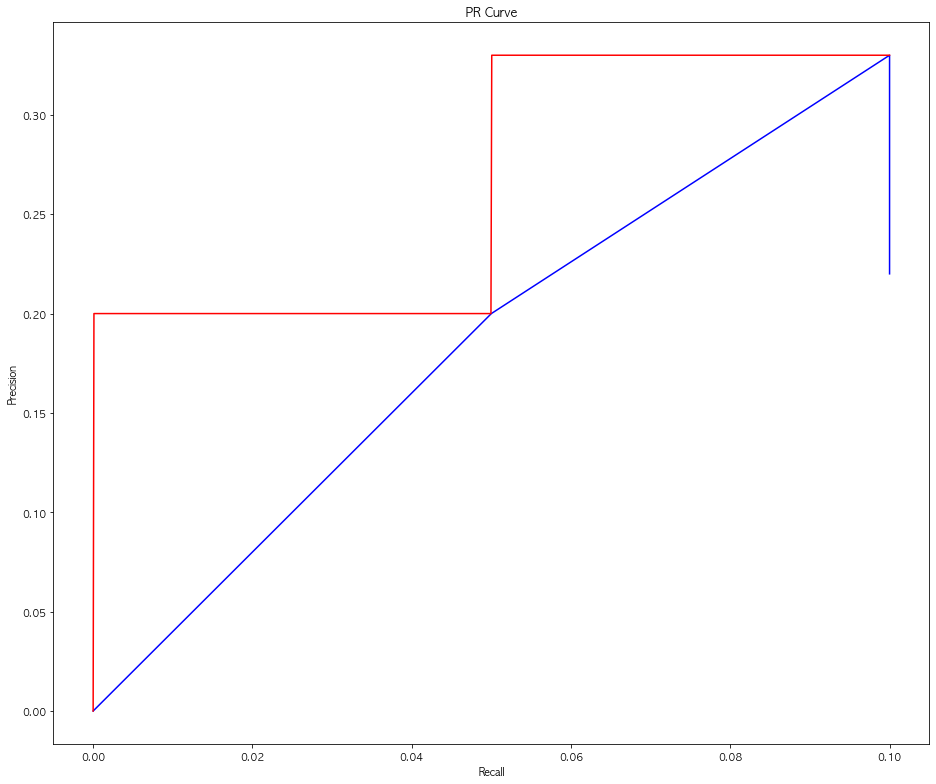

ap is 0.009969969969969971

검출되어야 할 개수 : 21

   time Confidense Result
0     1     71.14%     FP
1     2     65.16%     FP
2     3     68.76%     FP
3     4     56.83%     No
4     5     73.07%     FP
5     6     63.63%     FP
6     7     65.46%     FP
7     8      92.8%     TP
8     9     58.62%     No
9    10     16.63%     No
10   11     39.46%     No
11   12      74.6%     FP
12   13     79.94%     TP
13   14     68.17%     FP
14   15     58.43%     No
15   16     63.87%     FP
16   17     55.59%     No
17   18     48.99%     No
18   19     49.21%     No
19   20     70.75%     FP
20   21     66.11%     FP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     71.14%       FP     0     1    0/1=0.0   0/21=0.0   
1     1     65.16%       FP     0     2    0/2=0.0   0/21=0.0   
2     2     68.76%       FP     0     3    0/3=0.0   0/21=0.0   
3     4     73.07%       FP     0     4    0/4=0.0   0/21=0.0   
4     5     63.63%       FP     0     5    0/5=0.0   0/21=

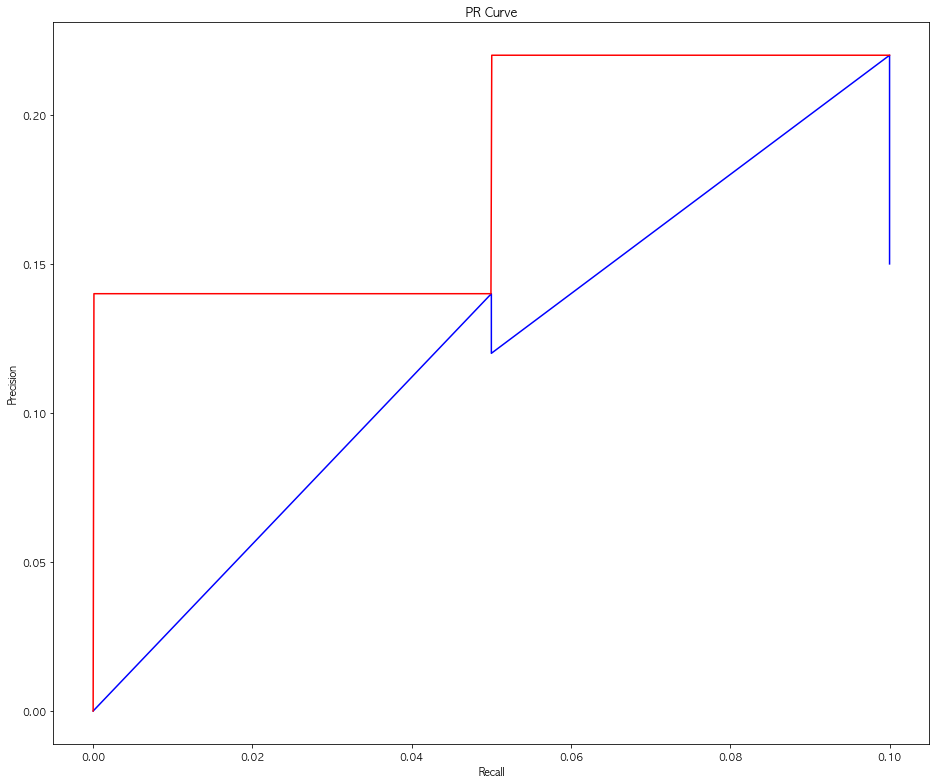

ap is 0.00697897897897898

검출되어야 할 개수 : 21

   time Confidense Result
0     1     72.07%     FP
1     2     63.57%     FP
2     3     68.76%     FP
3     4     56.83%     No
4     5     73.07%     FP
5     6     63.63%     FP
6     7     59.82%     No
7     8     65.03%     FP
8     9     45.54%     No
9    10     11.95%     No
10   11     30.88%     No
11   12     89.44%     TP
12   13     61.01%     FP
13   14     64.73%     FP
14   15     51.79%     No
15   16      62.1%     FP
16   17     68.23%     FP
17   18     52.86%     No
18   19     45.34%     No
19   20     66.99%     FP
20   21     67.87%     FP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     72.07%       FP     0     1    0/1=0.0   0/21=0.0   
1     1     63.57%       FP     0     2    0/2=0.0   0/21=0.0   
2     2     68.76%       FP     0     3    0/3=0.0   0/21=0.0   
3     4     73.07%       FP     0     4    0/4=0.0   0/21=0.0   
4     5     63.63%       FP     0     5    0/5=0.0   0/21=0

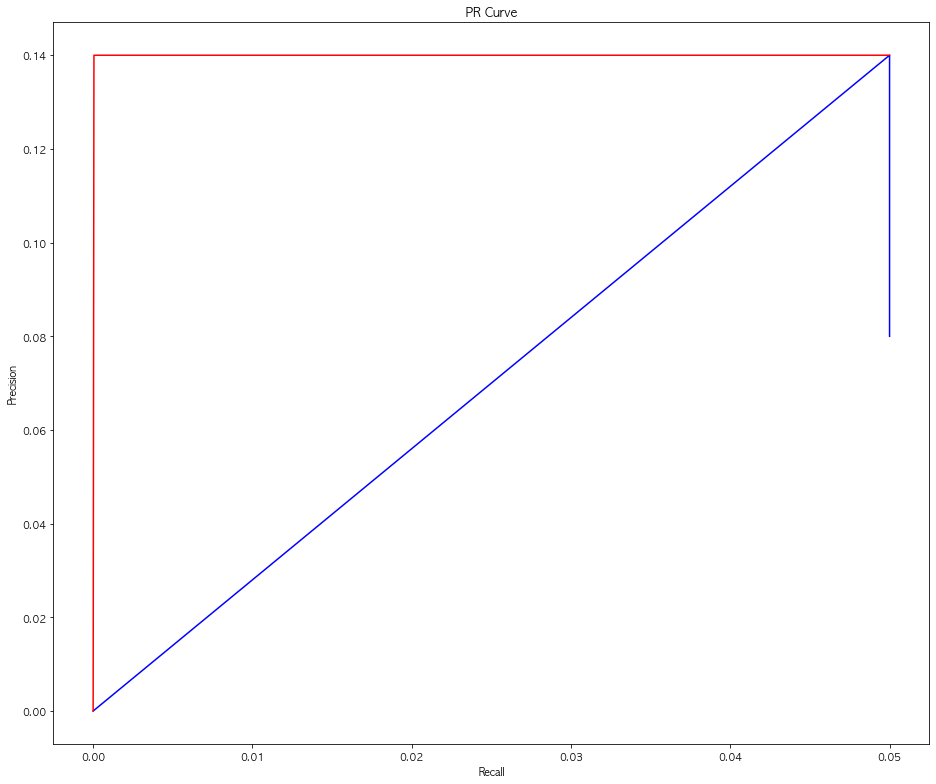

ap is 0.0

검출되어야 할 개수 : 21

   time Confidense Result
0     1     69.34%     FP
1     2     65.98%     FP
2     3     67.09%     FP
3     4     57.53%     No
4     5     72.16%     FP
5     6     61.96%     FP
6     7     59.09%     No
7     8     64.23%     FP
8     9     43.82%     No
9    10     11.65%     No
10   11     32.55%     No
11   12     91.73%     TP
12   13     61.78%     FP
13   14     63.92%     FP
14   15     55.28%     No
15   16     59.63%     No
16   17     51.22%     No
17   18     44.43%     No
18   19     44.18%     No
19   20     69.77%     FP
20   21      72.7%     FP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     69.34%       FP     0     1    0/1=0.0   0/21=0.0   
1     1     65.98%       FP     0     2    0/2=0.0   0/21=0.0   
2     2     67.09%       FP     0     3    0/3=0.0   0/21=0.0   
3     4     72.16%       FP     0     4    0/4=0.0   0/21=0.0   
4     5     61.96%       FP     0     5    0/5=0.0   0/21=0.0   
5     7   

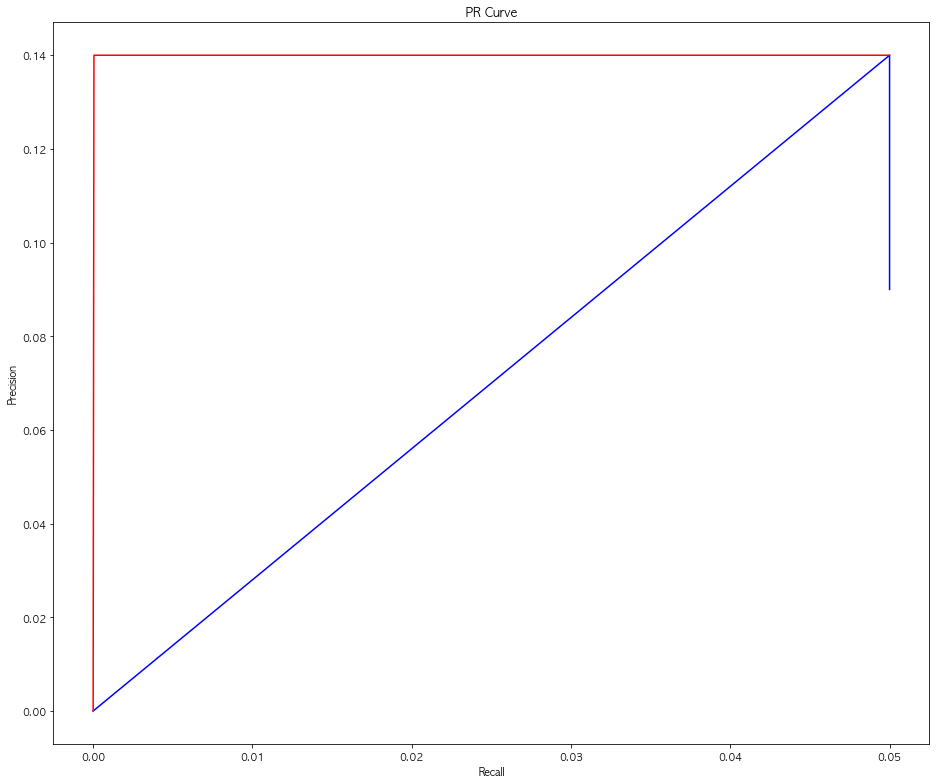

ap is 0.0

검출되어야 할 개수 : 21

   time Confidense Result
0     1     67.63%     FP
1     2     64.36%     FP
2     3     67.09%     FP
3     4     56.83%     No
4     5     74.96%     FP
5     6     57.44%     No
6     7     58.38%     No
7     8     65.03%     FP
8     9     43.82%     No
9    10     12.77%     No
10   11     33.45%     No
11   12     91.73%     TP
12   13      69.7%     FP
13   14      71.0%     FP
14   15     52.45%     No
15   16     60.43%     FP
16   17     59.86%     No
17   18     51.24%     No
18   19     45.94%     No
19   20     68.82%     FP
20   21     78.28%     TP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     67.63%       FP     0     1    0/1=0.0   0/21=0.0   
1     1     64.36%       FP     0     2    0/2=0.0   0/21=0.0   
2     2     67.09%       FP     0     3    0/3=0.0   0/21=0.0   
3     4     74.96%       FP     0     4    0/4=0.0   0/21=0.0   
4     7     65.03%       FP     0     5    0/5=0.0   0/21=0.0   
5    11   

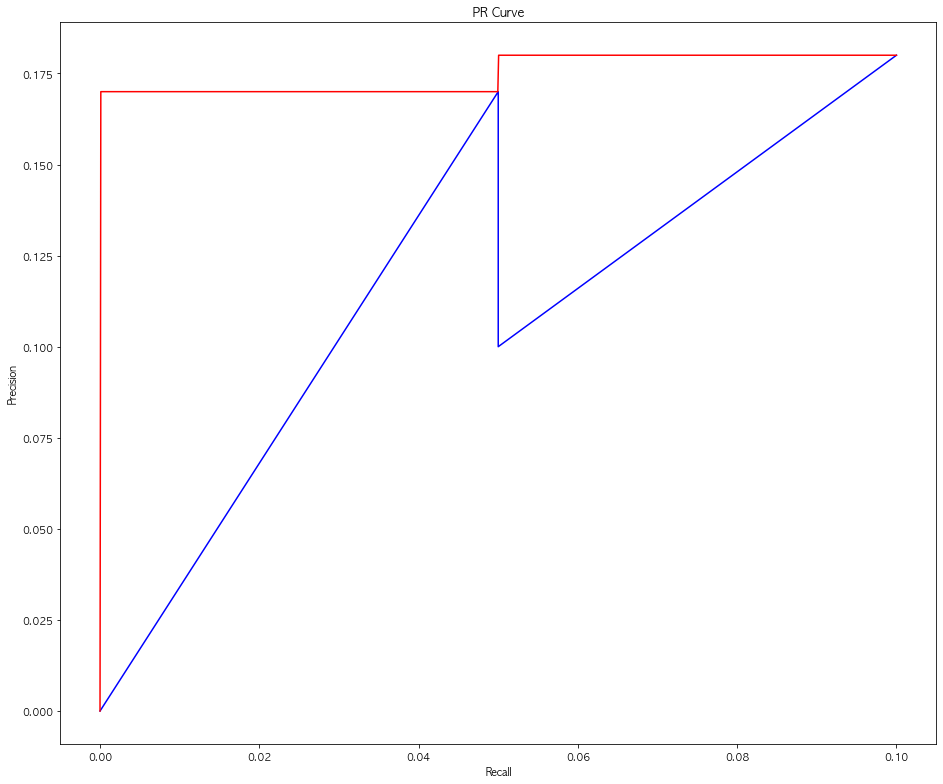

ap is 0.008474474474474476

검출되어야 할 개수 : 21

   time Confidense Result
0     1     68.48%     FP
1     2     68.58%     FP
2     3     67.92%     FP
3     4     59.74%     No
4     5     96.13%     TP
5     6   -922.14%     No
6     7   -179.75%     No
7     8   -207.78%     No
8     9      75.8%     TP
9    10     22.37%     No
10   11     47.55%     No
11   12     43.33%     No
12   13     90.76%     TP
13   14    -35.28%     No
14   15    -59.76%     No
15   16   -257.96%     No
16   17  -1016.67%     No
17   18     61.97%     FP
18   19     89.29%     TP
19   20     56.91%     No
20   21     83.39%     TP
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    0     68.48%       FP     0     1   0/1=0.0   0/21=0.0             0.00   
1    1     68.58%       FP     0     2   0/2=0.0   0/21=0.0             0.00   
2    2     67.92%       FP     0     3   0/3=0.0   0/21=0.0             0.00   
3    4     96.13%       TP     1     3  1/4=0.25  1/21=0.05    

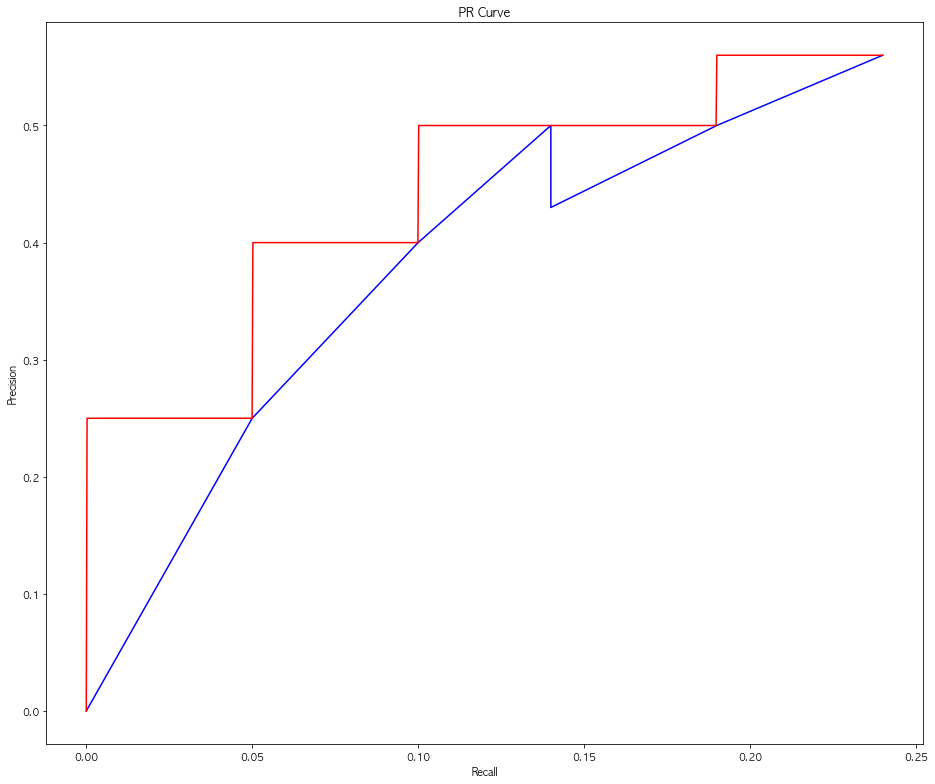

ap is 0.07712912912912911

검출되어야 할 개수 : 21

   time Confidense Result
0     1     77.13%     TP
1     2     74.44%     FP
2     3      83.3%     TP
3     4      68.5%     FP
4     5     97.75%     TP
5     6   -615.26%     No
6     7     66.73%     FP
7     8     91.85%     TP
8     9     62.21%     FP
9    10     16.18%     No
10   11     47.55%     No
11   12     90.96%     TP
12   13     90.97%     TP
13   14     48.27%     No
14   15     67.48%     FP
15   16     87.31%     TP
16   17    -82.99%     No
17   18     92.93%     TP
18   19     81.86%     TP
19   20     90.97%     TP
20   21     94.12%     TP
   Time Confidense TP or FP 누적 TP 누적 FP   Precision      Recall  \
0     0     77.13%       TP     1     0     1/1=1.0   1/21=0.05   
1     1     74.44%       FP     1     1     1/2=0.5   1/21=0.05   
2     2      83.3%       TP     2     1    2/3=0.67    2/21=0.1   
3     3      68.5%       FP     2     2     2/4=0.5    2/21=0.1   
4     4     97.75%       TP     3     2     3/5=0

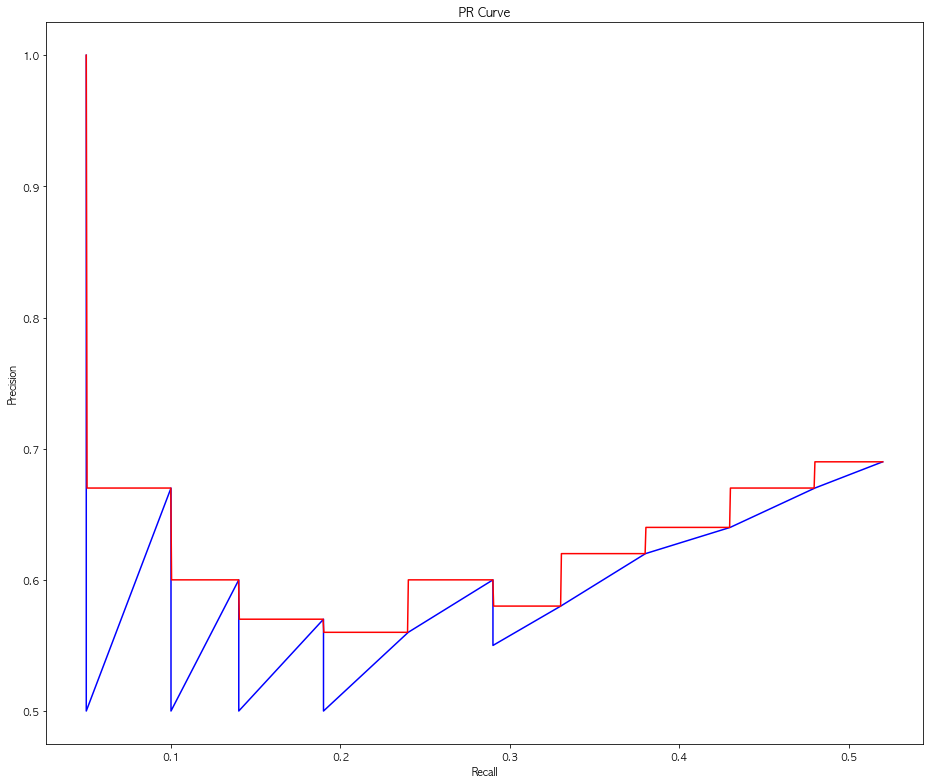

ap is 0.2608147147147147

검출되어야 할 개수 : 21

   time Confidense Result
0     1     77.13%     TP
1     2      86.8%     TP
2     3      99.9%     TP
3     4     83.12%     TP
4     5      1.85%     No
5     6     96.88%     TP
6     7     91.55%     TP
7     8     91.85%     TP
8     9     56.17%     No
9    10     24.74%     No
10   11     56.44%     No
11   12    -67.77%     No
12   13     63.29%     FP
13   14     33.49%     No
14   15     34.54%     No
15   16    -735.8%     No
16   17   -119.71%     No
17   18     94.91%     TP
18   19     76.42%     TP
19   20     88.56%     TP
20   21      79.5%     TP
   Time Confidense TP or FP 누적 TP 누적 FP   Precision      Recall  \
0     0     77.13%       TP     1     0     1/1=1.0   1/21=0.05   
1     1      86.8%       TP     2     0     2/2=1.0    2/21=0.1   
2     2      99.9%       TP     3     0     3/3=1.0   3/21=0.14   
3     3     83.12%       TP     4     0     4/4=1.0   4/21=0.19   
4     5     96.88%       TP     5     0     5/5=1.

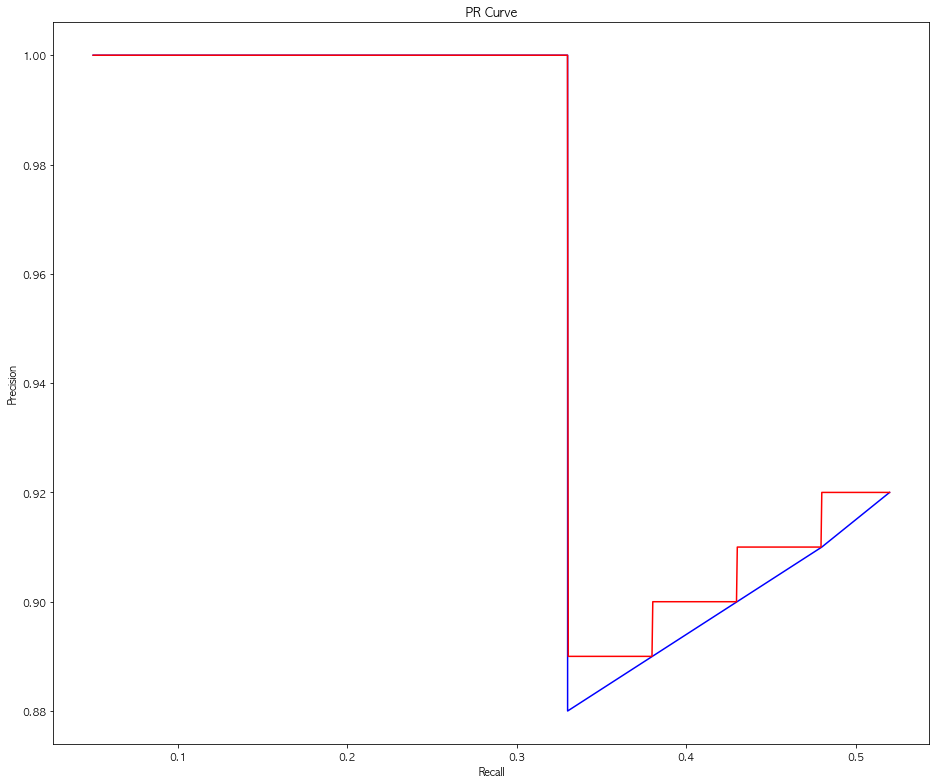

ap is 0.4133083083083083

검출되어야 할 개수 : 21

   time Confidense Result
0     1     77.13%     TP
1     2     70.43%     FP
2     3     80.86%     TP
3     4     70.57%     FP
4     5     93.23%     TP
5     6      41.5%     No
6     7     11.66%     No
7     8      78.1%     TP
8     9     72.62%     FP
9    10     20.41%     No
10   11     56.44%     No
11   12     46.68%     No
12   13     73.86%     FP
13   14   -146.61%     No
14   15     -7.26%     No
15   16   -103.16%     No
16   17   -300.91%     No
17   18     79.17%     TP
18   19     71.67%     FP
19   20     88.56%     TP
20   21     95.93%     TP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     77.13%       TP     1     0    1/1=1.0  1/21=0.05   
1     1     70.43%       FP     1     1    1/2=0.5  1/21=0.05   
2     2     80.86%       TP     2     1   2/3=0.67   2/21=0.1   
3     3     70.57%       FP     2     2    2/4=0.5   2/21=0.1   
4     4     93.23%       TP     3     2    3/5=0.6  3/21=0.1

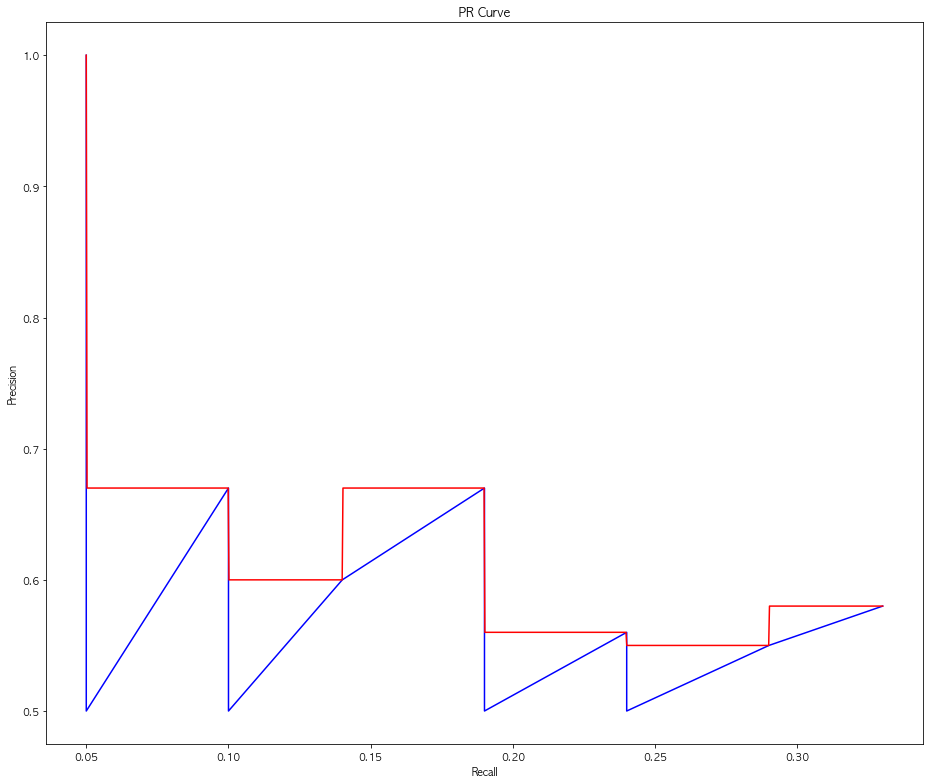

ap is 0.14557757757757758

검출되어야 할 개수 : 21

   time Confidense Result
0     1     99.48%     TP
1     2     92.98%     TP
2     3     96.41%     TP
3     4     83.12%     TP
4     5     82.39%     TP
5     6   -560.63%     No
6     7    -45.44%     No
7     8    -28.87%     No
8     9     89.47%     TP
9    10     30.36%     No
10   11     81.07%     TP
11   12   -162.47%     No
12   13     30.05%     No
13   14   -200.81%     No
14   15     27.58%     No
15   16   -375.51%     No
16   17   -148.24%     No
17   18     75.59%     TP
18   19     68.81%     FP
19   20     92.94%     TP
20   21     78.28%     TP
   Time Confidense TP or FP 누적 TP 누적 FP   Precision      Recall  \
0     0     99.48%       TP     1     0     1/1=1.0   1/21=0.05   
1     1     92.98%       TP     2     0     2/2=1.0    2/21=0.1   
2     2     96.41%       TP     3     0     3/3=1.0   3/21=0.14   
3     3     83.12%       TP     4     0     4/4=1.0   4/21=0.19   
4     4     82.39%       TP     5     0     5/5=1

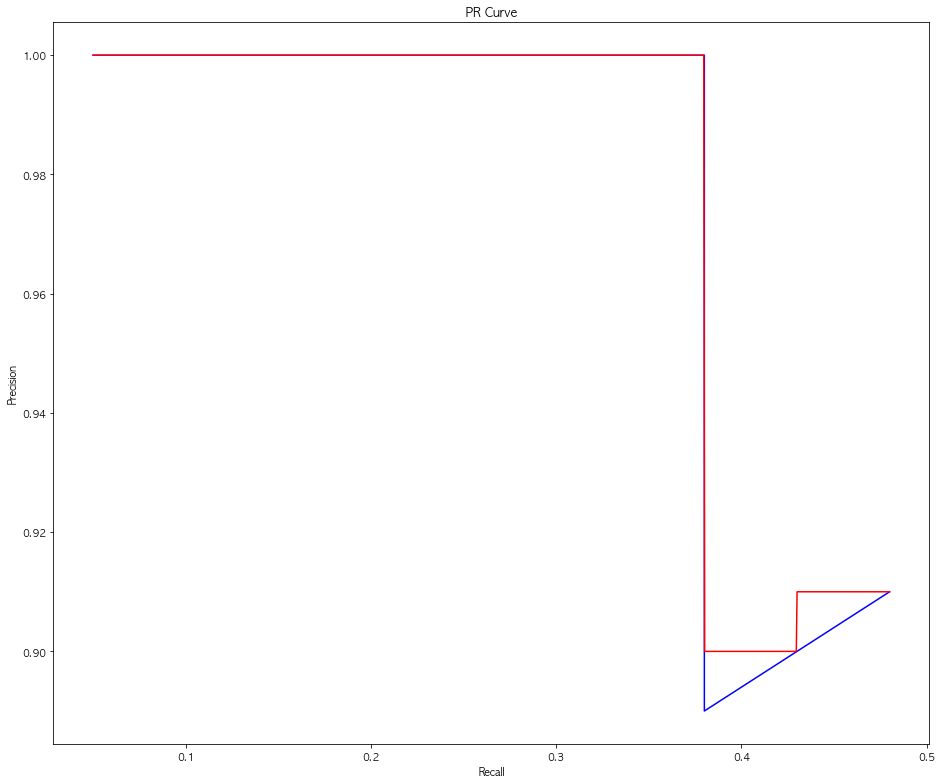

ap is 0.37425925925925924

검출되어야 할 개수 : 21

   time Confidense Result
0     1     76.06%     TP
1     2     72.38%     FP
2     3     77.45%     TP
3     4     64.71%     FP
4     5     82.43%     TP
5     6     90.45%     TP
6     7     79.18%     TP
7     8    -45.96%     No
8     9     56.62%     No
9    10     23.84%     No
10   11     77.39%     TP
11   12     44.74%     No
12   13     93.73%     TP
13   14     78.53%     TP
14   15     92.79%     TP
15   16     74.48%     FP
16   17     59.86%     No
17   18     49.72%     No
18   19     52.18%     No
19   20     74.96%     FP
20   21      72.7%     FP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     76.06%       TP     1     0    1/1=1.0  1/21=0.05   
1     1     72.38%       FP     1     1    1/2=0.5  1/21=0.05   
2     2     77.45%       TP     2     1   2/3=0.67   2/21=0.1   
3     3     64.71%       FP     2     2    2/4=0.5   2/21=0.1   
4     4     82.43%       TP     3     2    3/5=0.6  3/21=0.

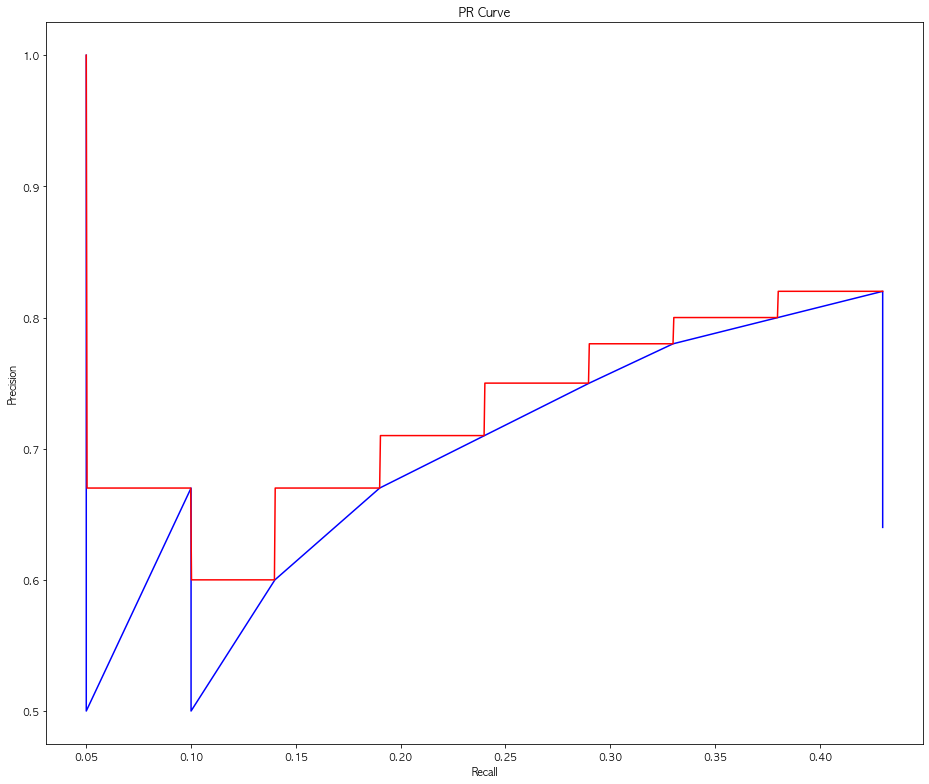

ap is 0.23316176176176176

검출되어야 할 개수 : 21

   time Confidense Result
0     1     70.23%     FP
1     2     68.58%     FP
2     3     70.52%     FP
3     4     59.74%     No
4     5     75.94%     TP
5     6     61.96%     FP
6     7     65.46%     FP
7     8      74.3%     FP
8     9     52.42%     No
9    10     13.32%     No
10   11     35.41%     No
11   12     95.39%     TP
12   13     68.72%     FP
13   14     68.17%     FP
14   15     55.28%     No
15   16     69.84%     FP
16   17     58.07%     No
17   18     54.59%     No
18   19     61.47%     FP
19   20     98.38%     TP
20   21     94.16%     TP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     70.23%       FP     0     1    0/1=0.0   0/21=0.0   
1     1     68.58%       FP     0     2    0/2=0.0   0/21=0.0   
2     2     70.52%       FP     0     3    0/3=0.0   0/21=0.0   
3     4     75.94%       TP     1     3   1/4=0.25  1/21=0.05   
4     5     61.96%       FP     1     4    1/5=0.2  1/21=0.

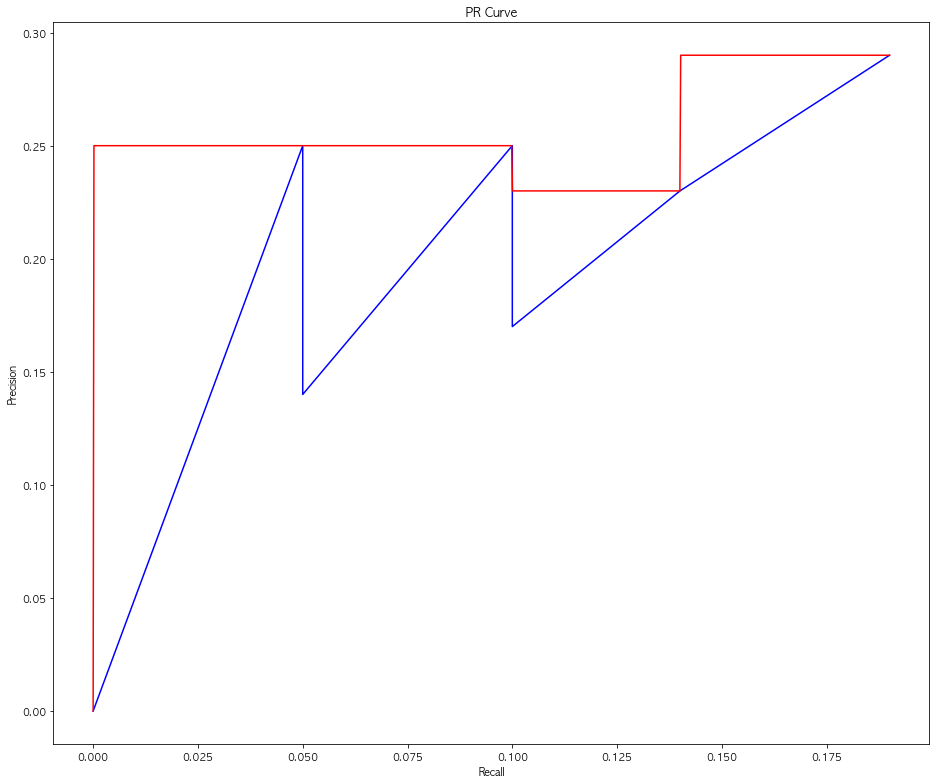

ap is 0.03410110110110111

검출되어야 할 개수 : 21

   time Confidense Result
0     1     74.01%     FP
1     2     70.43%     FP
2     3     73.33%     FP
3     4     65.61%     FP
4     5     97.03%     TP
5     6   -706.68%     No
6     7     36.94%     No
7     8      30.6%     No
8     9     63.35%     FP
9    10     30.36%     No
10   11     51.62%     No
11   12     19.71%     No
12   13      67.0%     FP
13   14    -88.17%     No
14   15   -147.87%     No
15   16   -460.24%     No
16   17    -47.15%     No
17   18   -594.08%     No
18   19    -13.16%     No
19   20    -17.07%     No
20   21     83.39%     TP
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    0     74.01%       FP     0     1   0/1=0.0   0/21=0.0             0.00   
1    1     70.43%       FP     0     2   0/2=0.0   0/21=0.0             0.00   
2    2     73.33%       FP     0     3   0/3=0.0   0/21=0.0             0.00   
3    3     65.61%       FP     0     4   0/4=0.0   0/21=0.0     

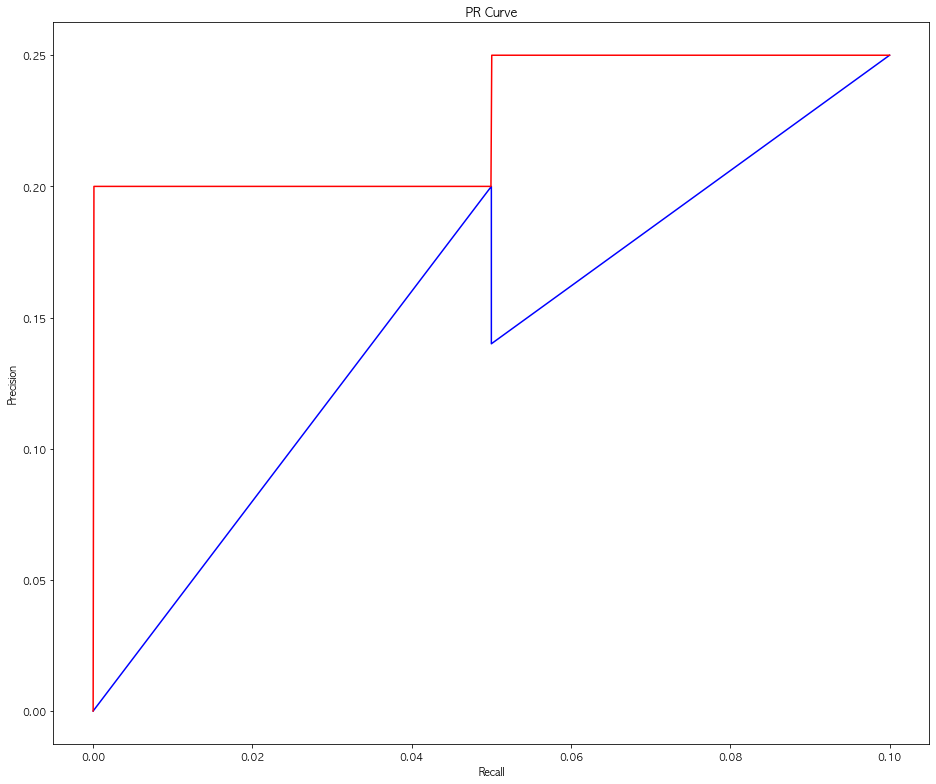

ap is 0.009969969969969971

검출되어야 할 개수 : 21

   time Confidense Result
0     1     75.02%     TP
1     2     71.39%     FP
2     3     78.56%     TP
3     4     72.77%     FP
4     5     93.04%     TP
5     6     78.27%     TP
6     7     74.77%     FP
7     8    -39.37%     No
8     9     90.83%     TP
9    10     33.64%     No
10   11     78.44%     TP
11   12    -78.15%     No
12   13     -91.4%     No
13   14  -1018.42%     No
14   15  -4979.39%     No
15   16  -1406.14%     No
16   17   -275.52%     No
17   18     69.31%     FP
18   19     60.39%     FP
19   20     82.31%     TP
20   21     78.28%     TP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     75.02%       TP     1     0    1/1=1.0  1/21=0.05   
1     1     71.39%       FP     1     1    1/2=0.5  1/21=0.05   
2     2     78.56%       TP     2     1   2/3=0.67   2/21=0.1   
3     3     72.77%       FP     2     2    2/4=0.5   2/21=0.1   
4     4     93.04%       TP     3     2    3/5=0.6  3/21=0

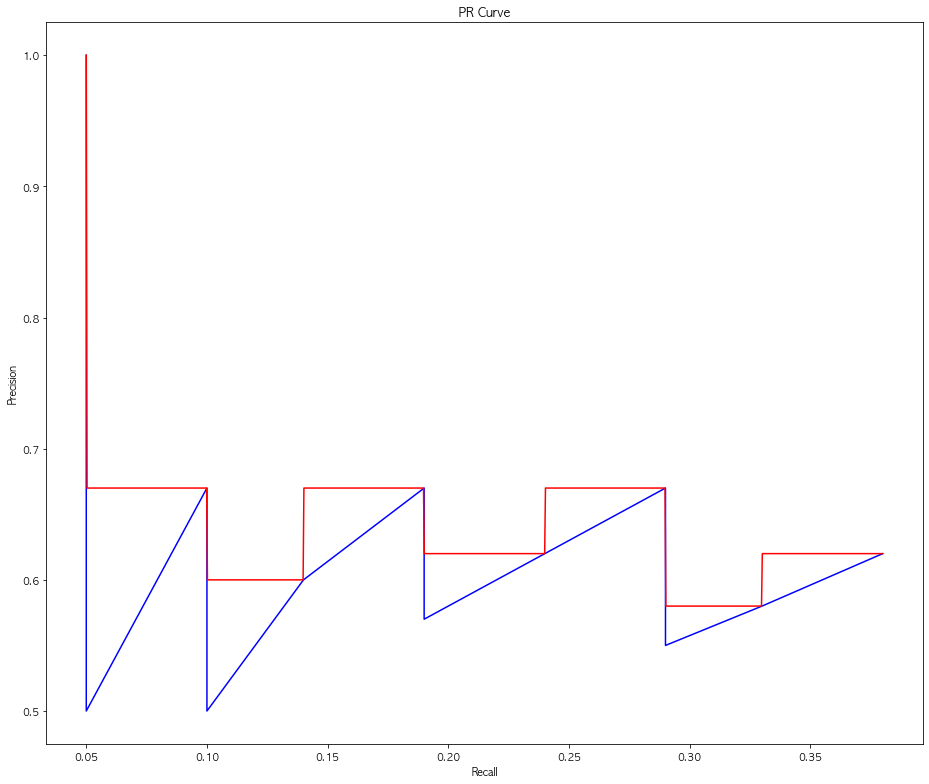

ap is 0.17729489489489492

검출되어야 할 개수 : 21

   time Confidense Result
0     1     78.23%     TP
1     2     72.38%     FP
2     3     80.86%     TP
3     4     72.77%     FP
4     5     84.73%     TP
5     6  -1271.94%     No
6     7   -179.75%     No
7     8    -28.87%     No
8     9     65.43%     FP
9    10     93.67%     TP
10   11     94.03%     TP
11   12   -181.76%     No
12   13   -520.44%     No
13   14   -625.89%     No
14   15   -326.45%     No
15   16    -200.1%     No
16   17   -119.71%     No
17   18     34.65%     No
18   19     81.71%     TP
19   20     48.29%     No
20   21     83.39%     TP
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    0     78.23%       TP     1     0   1/1=1.0  1/21=0.05             1.00   
1    1     72.38%       FP     1     1   1/2=0.5  1/21=0.05             0.50   
2    2     80.86%       TP     2     1  2/3=0.67   2/21=0.1             0.67   
3    3     72.77%       FP     2     2   2/4=0.5   2/21=0.1     

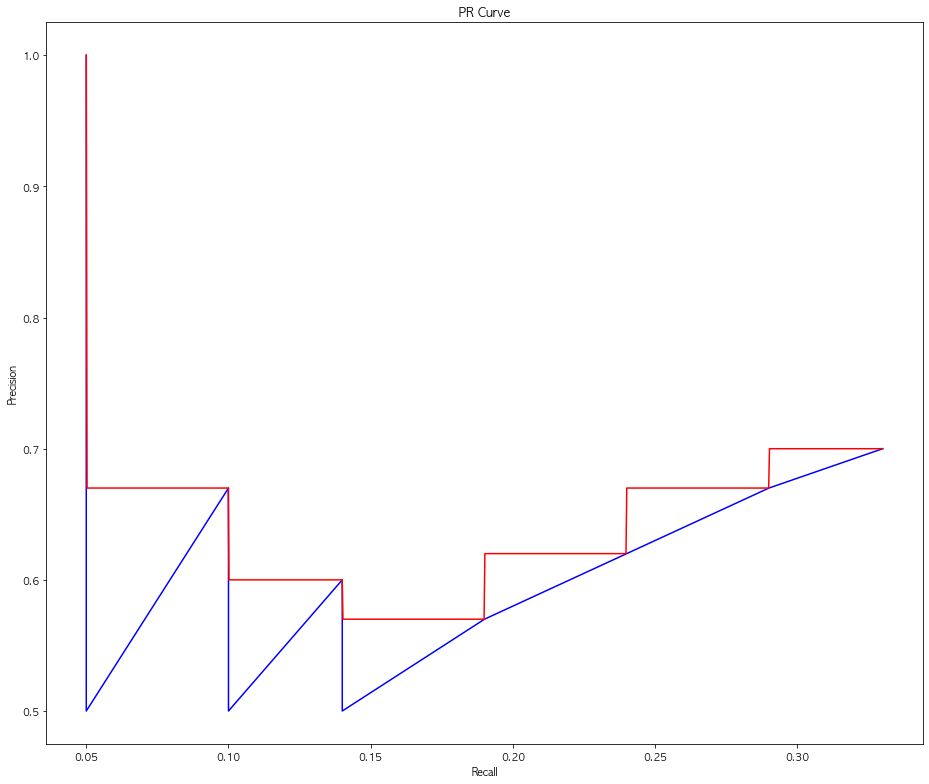

ap is 0.14957997997998002

검출되어야 할 개수 : 21

   time Confidense Result
0     1     79.36%     TP
1     2     76.62%     TP
2     3     80.86%     TP
3     4     70.57%     FP
4     5     87.41%     TP
5     6     81.12%     TP
6     7     82.05%     TP
7     8     98.14%     TP
8     9     78.51%     TP
9    10     23.25%     No
10   11     54.64%     No
11   12     57.11%     No
12   13     97.46%     TP
13   14     99.88%     TP
14   15      81.7%     TP
15   16     76.15%     TP
16   17     70.79%     FP
17   18      72.5%     FP
18   19     81.71%     TP
19   20     90.97%     TP
20   21     98.34%     TP
   Time Confidense TP or FP 누적 TP 누적 FP   Precision      Recall  \
0     0     79.36%       TP     1     0     1/1=1.0   1/21=0.05   
1     1     76.62%       TP     2     0     2/2=1.0    2/21=0.1   
2     2     80.86%       TP     3     0     3/3=1.0   3/21=0.14   
3     3     70.57%       FP     3     1    3/4=0.75   3/21=0.14   
4     4     87.41%       TP     4     1     4/5=0

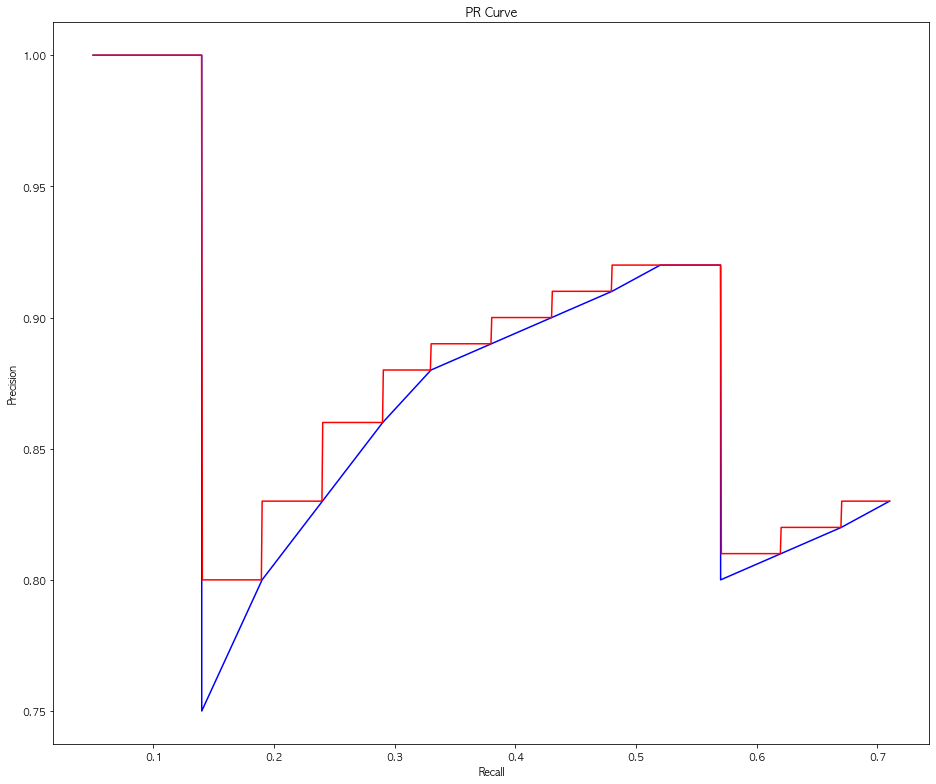

ap is 0.5430762762762762

검출되어야 할 개수 : 21

   time  Confidense Result
0     1      80.52%     TP
1     2      75.52%     TP
2     3      79.69%     TP
3     4       68.5%     FP
4     5      79.95%     TP
5     6   -1491.24%     No
6     7      -4.18%     No
7     8      35.92%     No
8     9      94.34%     TP
9    10      36.24%     No
10   11      83.83%     TP
11   12    -181.76%     No
12   13    -1090.4%     No
13   14  -24450.69%     No
14   15    -369.11%     No
15   16    -346.34%     No
16   17    -275.52%     No
17   18      77.19%     TP
18   19      90.43%     TP
19   20      80.64%     TP
20   21      83.39%     TP
   Time Confidense TP or FP 누적 TP 누적 FP   Precision      Recall  \
0     0     80.52%       TP     1     0     1/1=1.0   1/21=0.05   
1     1     75.52%       TP     2     0     2/2=1.0    2/21=0.1   
2     2     79.69%       TP     3     0     3/3=1.0   3/21=0.14   
3     3      68.5%       FP     3     1    3/4=0.75   3/21=0.14   
4     4     79.95%       TP 

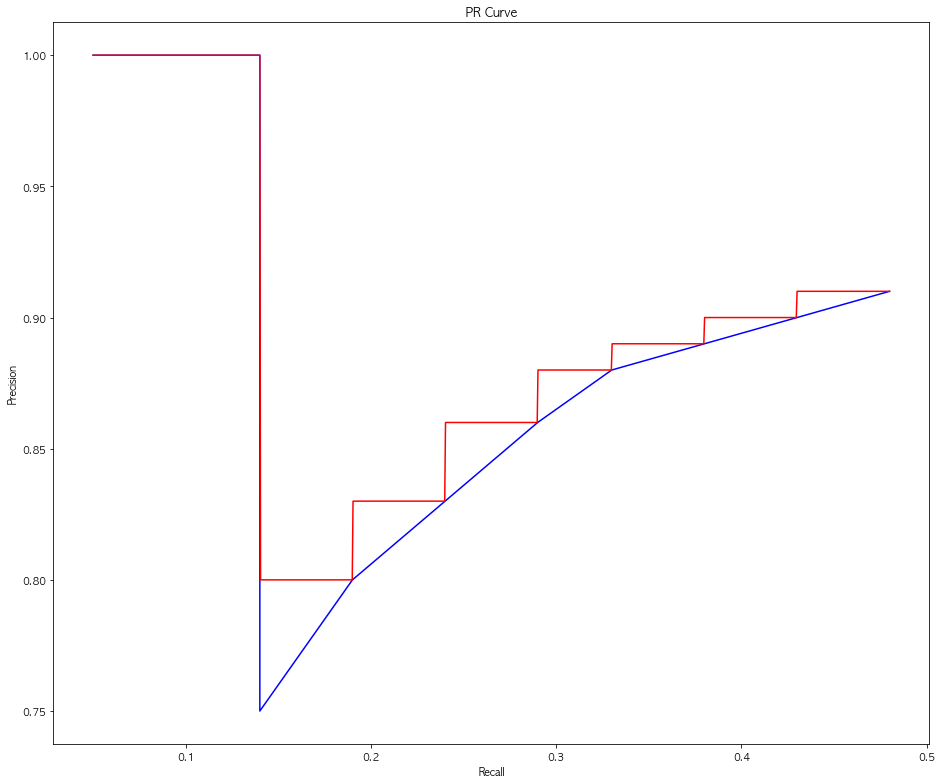

ap is 0.3366654654654655

검출되어야 할 개수 : 21

   time Confidense Result
0     1     81.72%     TP
1     2     75.52%     TP
2     3     82.06%     TP
3     4     73.92%     FP
4     5     97.75%     TP
5     6     43.68%     No
6     7    -40.39%     No
7     8   -167.14%     No
8     9    -44.29%     No
9    10     98.48%     TP
10   11    -36.61%     No
11   12    -45.62%     No
12   13      98.5%     TP
13   14     92.87%     TP
14   15     63.89%     FP
15   16     75.74%     TP
16   17     67.05%     FP
17   18     59.45%     No
18   19     55.54%     No
19   20     78.46%     TP
20   21     78.28%     TP
   Time Confidense TP or FP 누적 TP 누적 FP   Precision      Recall  \
0     0     81.72%       TP     1     0     1/1=1.0   1/21=0.05   
1     1     75.52%       TP     2     0     2/2=1.0    2/21=0.1   
2     2     82.06%       TP     3     0     3/3=1.0   3/21=0.14   
3     3     73.92%       FP     3     1    3/4=0.75   3/21=0.14   
4     4     97.75%       TP     4     1     4/5=0.

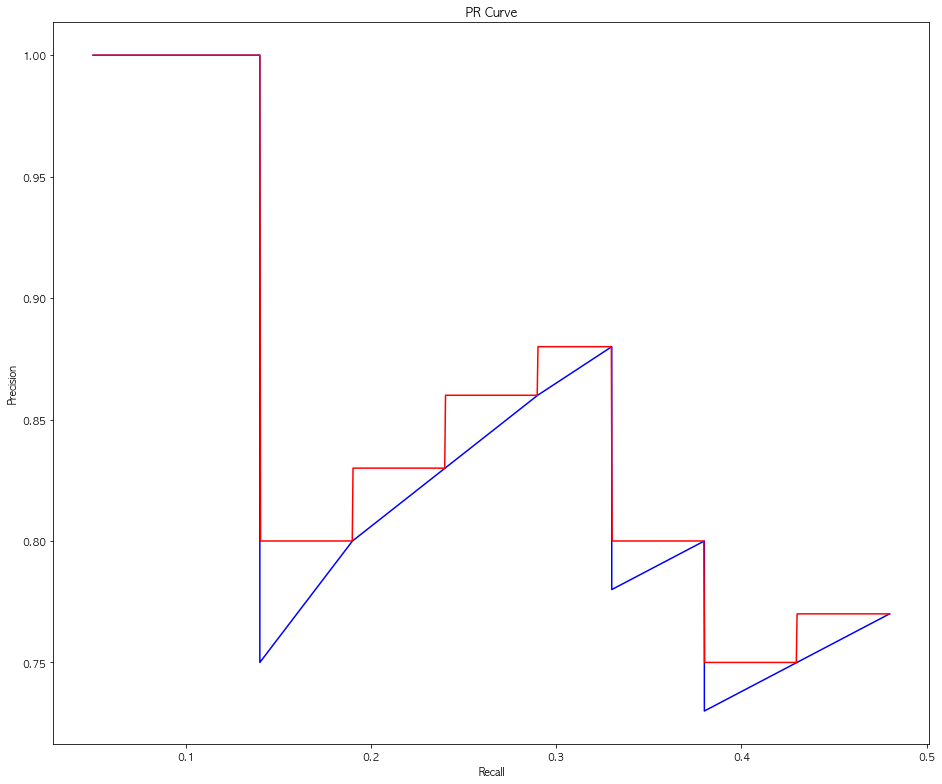

ap is 0.3247855855855856

검출되어야 할 개수 : 21

   time Confidense Result
0     1     77.13%     TP
1     2      73.4%     FP
2     3     77.45%     TP
3     4     62.12%     FP
4     5     76.95%     TP
5     6     70.26%     FP
6     7     67.27%     FP
7     8     81.24%     TP
8     9     50.89%     No
9    10     13.71%     No
10   11     35.41%     No
11   12     99.25%     TP
12   13     72.81%     FP
13   14     76.29%     TP
14   15     61.96%     FP
15   16     72.09%     FP
16   17     64.83%     FP
17   18     54.59%     No
18   19     55.54%     No
19   20     74.96%     FP
20   21     77.09%     TP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     77.13%       TP     1     0    1/1=1.0  1/21=0.05   
1     1      73.4%       FP     1     1    1/2=0.5  1/21=0.05   
2     2     77.45%       TP     2     1   2/3=0.67   2/21=0.1   
3     3     62.12%       FP     2     2    2/4=0.5   2/21=0.1   
4     4     76.95%       TP     3     2    3/5=0.6  3/21=0.1

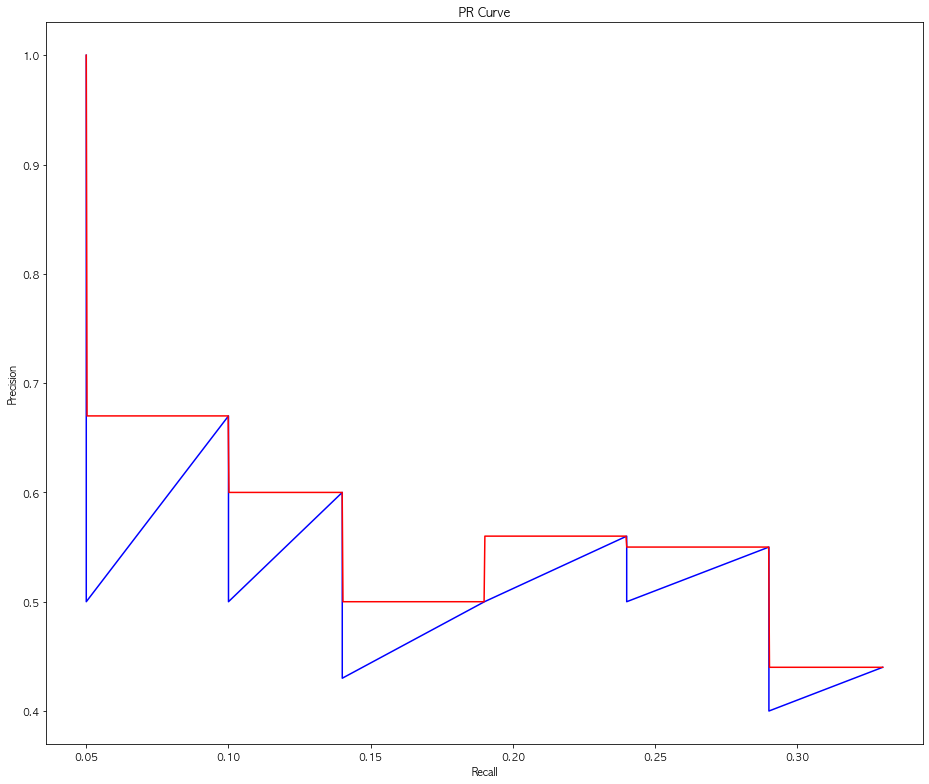

ap is 0.13714394394394394

검출되어야 할 개수 : 21

   time Confidense Result
0     1     70.23%     FP
1     2      73.4%     FP
2     3     75.34%     TP
3     4     63.82%     FP
4     5     93.23%     TP
5     6   -785.38%     No
6     7    -45.44%     No
7     8     65.53%     FP
8     9     99.76%     TP
9    10     16.18%     No
10   11     34.61%     No
11   12     28.34%     No
12   13     46.09%     No
13   14     74.31%     FP
14   15    -30.56%     No
15   16  -1406.14%     No
16   17    -56.65%     No
17   18     89.81%     TP
18   19     78.15%     TP
19   20     94.68%     TP
20   21      79.5%     TP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     70.23%       FP     0     1    0/1=0.0   0/21=0.0   
1     1      73.4%       FP     0     2    0/2=0.0   0/21=0.0   
2     2     75.34%       TP     1     2   1/3=0.33  1/21=0.05   
3     3     63.82%       FP     1     3   1/4=0.25  1/21=0.05   
4     4     93.23%       TP     2     3    2/5=0.4   2/21=0

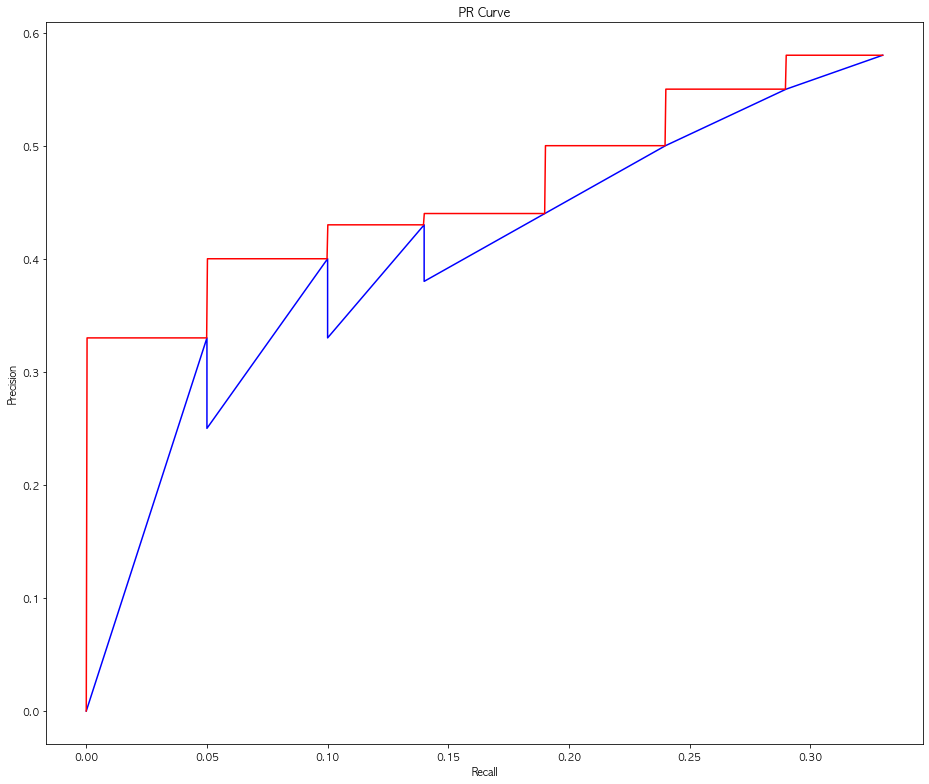

ap is 0.1271903903903904

검출되어야 할 개수 : 21

   time Confidense Result
0     1     77.13%     TP
1     2     74.44%     FP
2     3     80.86%     TP
3     4     72.77%     FP
4     5     99.43%     TP
5     6      41.5%     No
6     7      47.2%     No
7     8     50.07%     No
8     9     94.34%     TP
9    10     21.85%     No
10   11     86.91%     TP
11   12    -67.77%     No
12   13     89.31%     TP
13   14     60.65%     FP
14   15     78.61%     TP
15   16   -103.16%     No
16   17   -148.24%     No
17   18     92.93%     TP
18   19     57.28%     No
19   20    -26.85%     No
20   21     55.02%     No
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     77.13%       TP     1     0    1/1=1.0  1/21=0.05   
1     1     74.44%       FP     1     1    1/2=0.5  1/21=0.05   
2     2     80.86%       TP     2     1   2/3=0.67   2/21=0.1   
3     3     72.77%       FP     2     2    2/4=0.5   2/21=0.1   
4     4     99.43%       TP     3     2    3/5=0.6  3/21=0.1

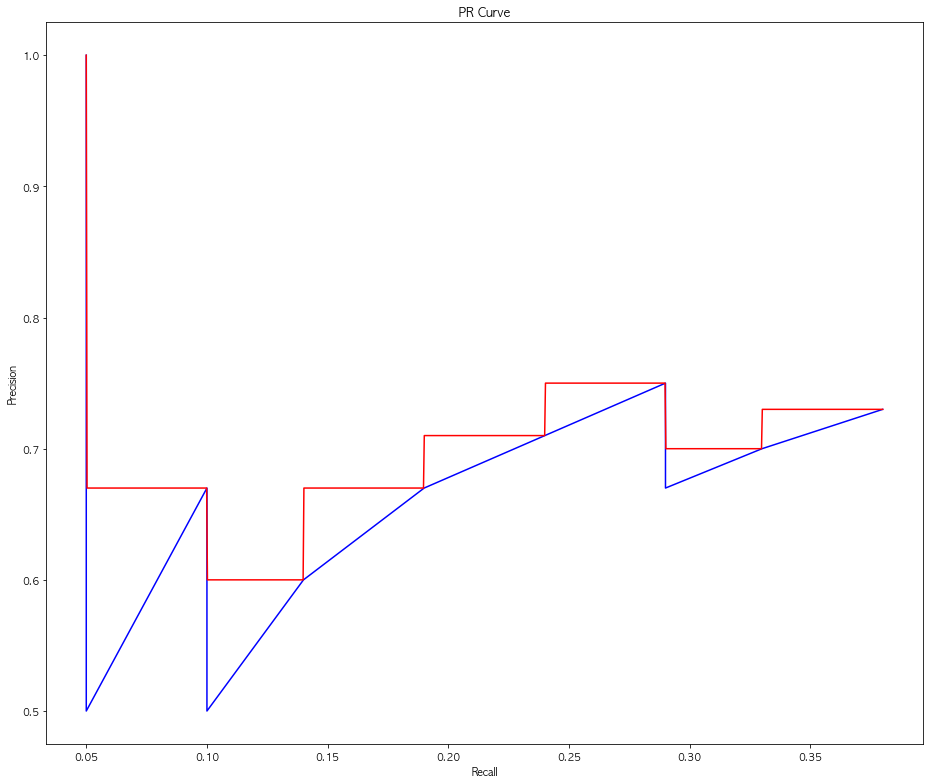

ap is 0.19050480480480483

검출되어야 할 개수 : 21

   time Confidense Result
0     1      63.4%     FP
1     2     42.62%     No
2     3     17.42%     No
3     4     63.42%     FP
4     5    -49.38%     No
5     6   -237.54%     No
6     7      47.2%     No
7     8     24.91%     No
8     9     89.47%     TP
9    10     24.74%     No
10   11     62.26%     FP
11   12     19.71%     No
12   13     63.29%     FP
13   14     15.52%     No
14   15     40.95%     No
15   16   -346.34%     No
16   17     31.82%     No
17   18     79.17%     TP
18   19     61.47%     FP
19   20     82.31%     TP
20   21     84.78%     TP
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    0      63.4%       FP     0     1   0/1=0.0   0/21=0.0             0.00   
1    3     63.42%       FP     0     2   0/2=0.0   0/21=0.0             0.00   
2    8     89.47%       TP     1     2  1/3=0.33  1/21=0.05             0.33   
3   10     62.26%       FP     1     3  1/4=0.25  1/21=0.05     

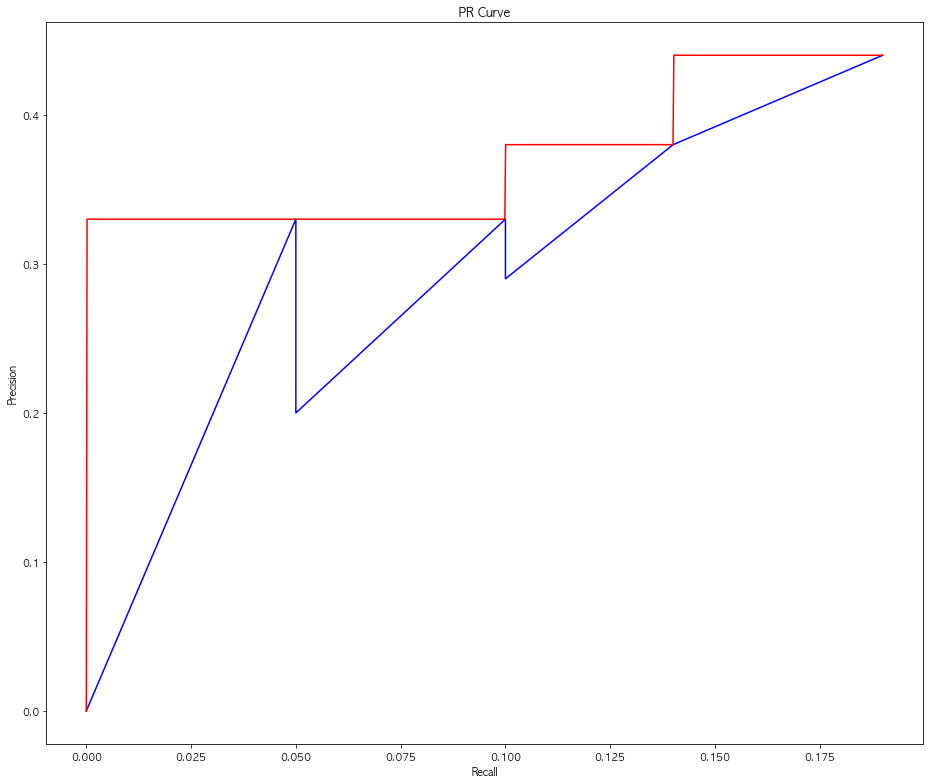

ap is 0.04806486486486487

검출되어야 할 개수 : 21

   time Confidense Result
0     1     77.13%     TP
1     2      73.4%     FP
2     3     80.86%     TP
3     4     72.77%     FP
4     5     93.04%     TP
5     6    -59.34%     No
6     7   -813.72%     No
7     8   -178.21%     No
8     9      15.3%     No
9    10     73.08%     FP
10   11     97.42%     TP
11   12   -203.22%     No
12   13   -3850.7%     No
13   14   -257.45%     No
14   15    -88.72%     No
15   16   -139.52%     No
16   17     38.77%     No
17   18     79.17%     TP
18   19     71.67%     FP
19   20     86.55%     TP
20   21     84.78%     TP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     77.13%       TP     1     0    1/1=1.0  1/21=0.05   
1     1      73.4%       FP     1     1    1/2=0.5  1/21=0.05   
2     2     80.86%       TP     2     1   2/3=0.67   2/21=0.1   
3     3     72.77%       FP     2     2    2/4=0.5   2/21=0.1   
4     4     93.04%       TP     3     2    3/5=0.6  3/21=0.

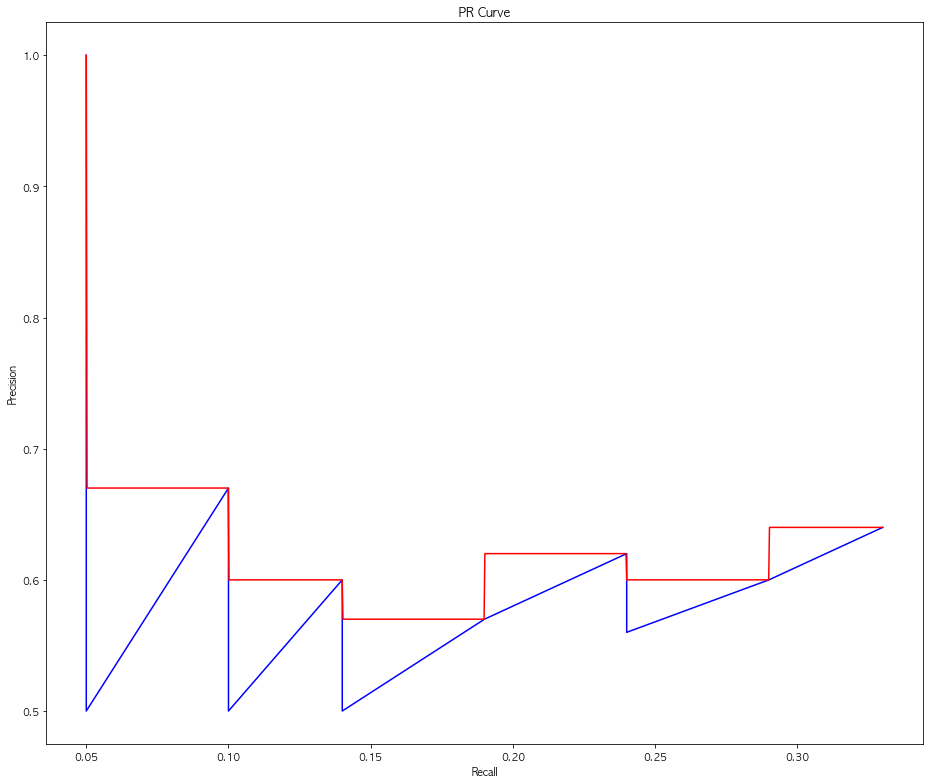

ap is 0.1460876876876877

검출되어야 할 개수 : 21

   time Confidense Result
0     1     76.06%     TP
1     2      73.4%     FP
2     3     80.86%     TP
3     4     72.77%     FP
4     5     97.03%     TP
5     6    -12.62%     No
6     7   -473.94%     No
7     8   -568.01%     No
8     9   -399.25%     No
9    10      38.6%     No
10   11     11.18%     No
11   12   -1691.9%     No
12   13  -2530.57%     No
13   14  -1018.42%     No
14   15   -299.77%     No
15   16   -346.34%     No
16   17    -74.71%     No
17   18     89.38%     TP
18   19     76.42%     TP
19   20     94.68%     TP
20   21     86.21%     TP
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    0     76.06%       TP     1     0   1/1=1.0  1/21=0.05             1.00   
1    1      73.4%       FP     1     1   1/2=0.5  1/21=0.05             0.50   
2    2     80.86%       TP     2     1  2/3=0.67   2/21=0.1             0.67   
3    3     72.77%       FP     2     2   2/4=0.5   2/21=0.1      

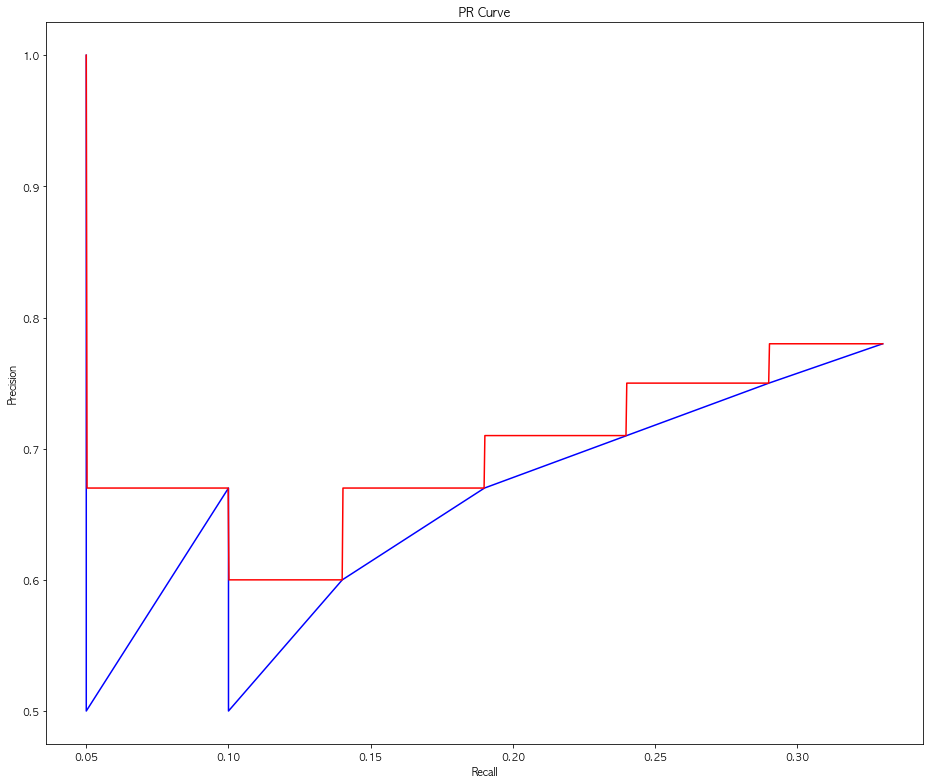

ap is 0.16299699699699705

검출되어야 할 개수 : 21

   time Confidense Result
0     1     80.52%     TP
1     2     76.62%     TP
2     3     79.69%     TP
3     4      68.5%     FP
4     5     88.75%     TP
5     6     95.55%     TP
6     7      76.1%     TP
7     8     32.85%     No
8     9     36.34%     No
9    10     35.67%     No
10   11     82.69%     TP
11   12     54.21%     No
12   13     97.46%     TP
13   14      86.6%     TP
14   15     71.71%     FP
15   16     79.78%     TP
16   17     69.44%     FP
17   18     59.45%     No
18   19     60.39%     FP
19   20      79.7%     TP
20   21     80.75%     TP
   Time Confidense TP or FP 누적 TP 누적 FP   Precision      Recall  \
0     0     80.52%       TP     1     0     1/1=1.0   1/21=0.05   
1     1     76.62%       TP     2     0     2/2=1.0    2/21=0.1   
2     2     79.69%       TP     3     0     3/3=1.0   3/21=0.14   
3     3      68.5%       FP     3     1    3/4=0.75   3/21=0.14   
4     4     88.75%       TP     4     1     4/5=0

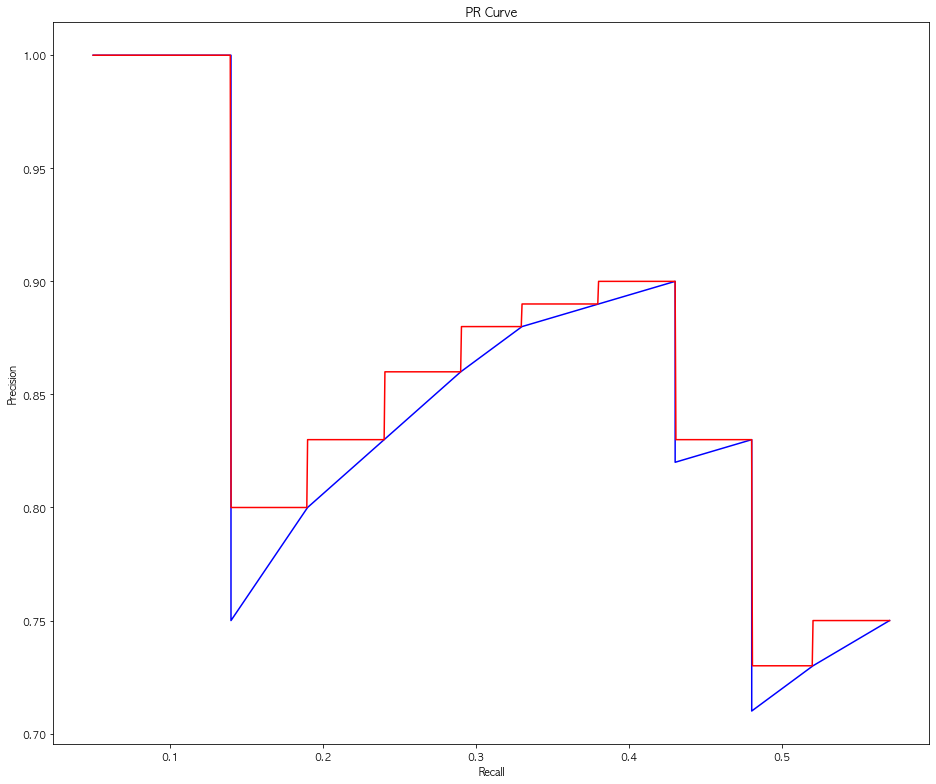

ap is 0.4059695695695696

검출되어야 할 개수 : 21

   time Confidense Result
0     1     80.52%     TP
1     2      73.4%     FP
2     3     78.56%     TP
3     4     69.52%     FP
4     5     86.11%     TP
5     6     74.71%     FP
6     7     75.66%     TP
7     8     87.11%     TP
8     9     73.52%     FP
9    10     16.63%     No
10   11     40.12%     No
11   12     80.84%     TP
12   13     81.27%     TP
13   14      86.6%     TP
14   15     67.02%     FP
15   16     79.78%     TP
16   17     69.44%     FP
17   18     58.41%     No
18   19     57.38%     No
19   20     78.46%     TP
20   21      79.5%     TP
   Time Confidense TP or FP 누적 TP 누적 FP   Precision      Recall  \
0     0     80.52%       TP     1     0     1/1=1.0   1/21=0.05   
1     1      73.4%       FP     1     1     1/2=0.5   1/21=0.05   
2     2     78.56%       TP     2     1    2/3=0.67    2/21=0.1   
3     3     69.52%       FP     2     2     2/4=0.5    2/21=0.1   
4     4     86.11%       TP     3     2     3/5=0.

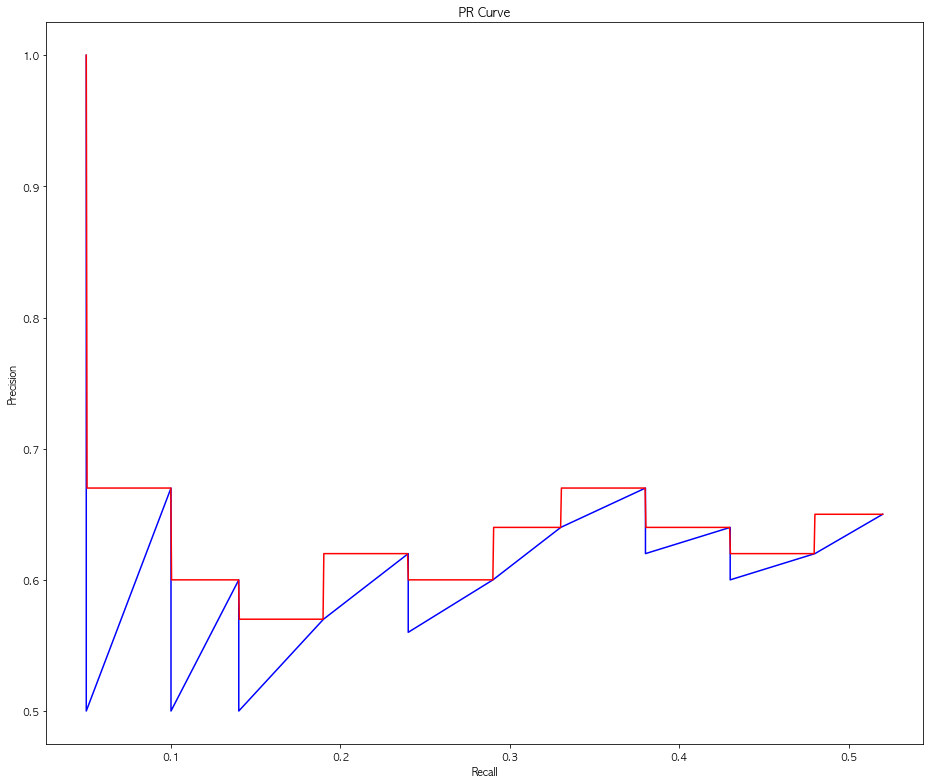

ap is 0.2661498498498498

검출되어야 할 개수 : 21

   time  Confidense Result
0     1      79.36%     TP
1     2      75.52%     TP
2     3      84.58%     TP
3     4      71.65%     FP
4     5      69.08%     FP
5     6     -38.58%     No
6     7      25.21%     No
7     8     -39.37%     No
8     9      24.63%     No
9    10      41.02%     No
10   11   -2849.63%     No
11   12     -720.7%     No
12   13    -821.12%     No
13   14  -24450.69%     No
14   15    -326.45%     No
15   16    -310.05%     No
16   17      31.82%     No
17   18      79.17%     TP
18   19      64.93%     FP
19   20       96.5%     TP
20   21      83.39%     TP
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    0     79.36%       TP     1     0   1/1=1.0  1/21=0.05             1.00   
1    1     75.52%       TP     2     0   2/2=1.0   2/21=0.1             1.00   
2    2     84.58%       TP     3     0   3/3=1.0  3/21=0.14             1.00   
3    3     71.65%       FP     3     1  3/4

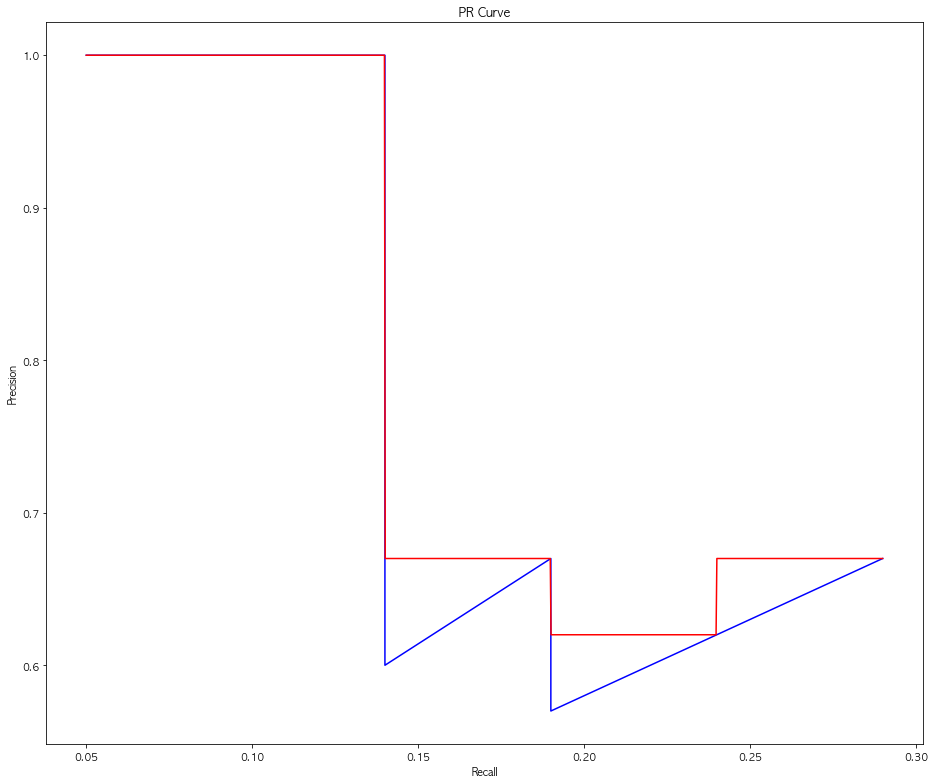

ap is 0.1540012012012012

검출되어야 할 개수 : 21

   time Confidense Result
0     1     77.13%     TP
1     2     75.52%     TP
2     3     82.06%     TP
3     4     76.33%     TP
4     5     84.73%     TP
5     6     -3.46%     No
6     7     -58.5%     No
7     8   -110.64%     No
8     9      4.92%     No
9    10    -46.52%     No
10   11     93.65%     TP
11   12   -856.26%     No
12   13   -299.71%     No
13   14   -2661.1%     No
14   15   -587.66%     No
15   16   -422.14%     No
16   17     24.25%     No
17   18     79.17%     TP
18   19     66.18%     FP
19   20     86.55%     TP
20   21     86.21%     TP
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    0     77.13%       TP     1     0   1/1=1.0  1/21=0.05             1.00   
1    1     75.52%       TP     2     0   2/2=1.0   2/21=0.1             1.00   
2    2     82.06%       TP     3     0   3/3=1.0  3/21=0.14             1.00   
3    3     76.33%       TP     4     0   4/4=1.0  4/21=0.19      

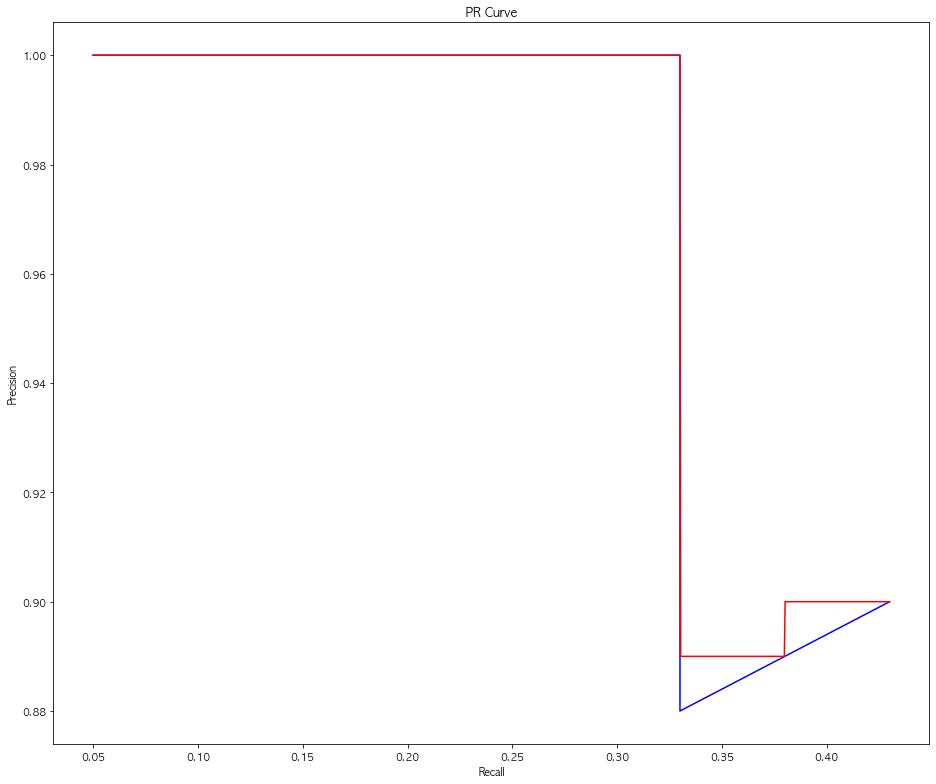

ap is 0.32396996996997

검출되어야 할 개수 : 21

   time Confidense Result
0     1     79.36%     TP
1     2     74.44%     FP
2     3      83.3%     TP
3     4     71.65%     FP
4     5     86.98%     TP
5     6      4.94%     No
6     7  -1314.27%     No
7     8   -469.44%     No
8     9    -71.33%     No
9    10     30.36%     No
10   11     78.44%     TP
11   12    -285.0%     No
12   13  -1552.57%     No
13   14   -257.45%     No
14   15   -136.02%     No
15   16    -94.87%     No
16   17     51.07%     No
17   18     49.54%     No
18   19     77.52%     TP
19   20     56.91%     No
20   21     62.82%     FP
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    0     79.36%       TP     1     0   1/1=1.0  1/21=0.05             1.00   
1    1     74.44%       FP     1     1   1/2=0.5  1/21=0.05             0.50   
2    2      83.3%       TP     2     1  2/3=0.67   2/21=0.1             0.67   
3    3     71.65%       FP     2     2   2/4=0.5   2/21=0.1        

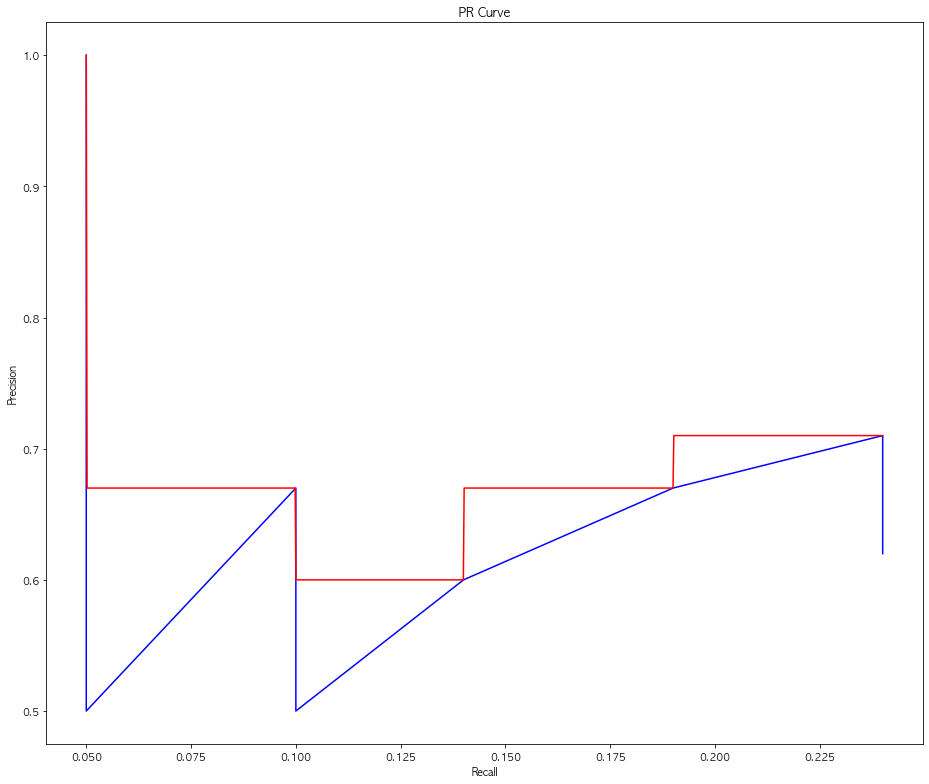

ap is 0.09060850850850852

검출되어야 할 개수 : 21

   time Confidense Result
0     1     81.14%     TP
1     2     84.39%     TP
2     3     66.16%     FP
3     4      89.3%     TP
4     5     30.81%     No
5     6    -74.41%     No
6     7   -423.43%     No
7     8    -39.37%     No
8     9   -154.46%     No
9    10     26.87%     No
10   11     89.16%     TP
11   12     46.68%     No
12   13   -331.41%     No
13   14   -124.67%     No
14   15  -1657.85%     No
15   16  -1197.87%     No
16   17  -1197.94%     No
17   18     49.54%     No
18   19     98.13%     TP
19   20     80.64%     TP
20   21     84.54%     TP
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    0     81.14%       TP     1     0   1/1=1.0  1/21=0.05             1.00   
1    1     84.39%       TP     2     0   2/2=1.0   2/21=0.1             1.00   
2    2     66.16%       FP     2     1  2/3=0.67   2/21=0.1             0.67   
3    3      89.3%       TP     3     1  3/4=0.75  3/21=0.14     

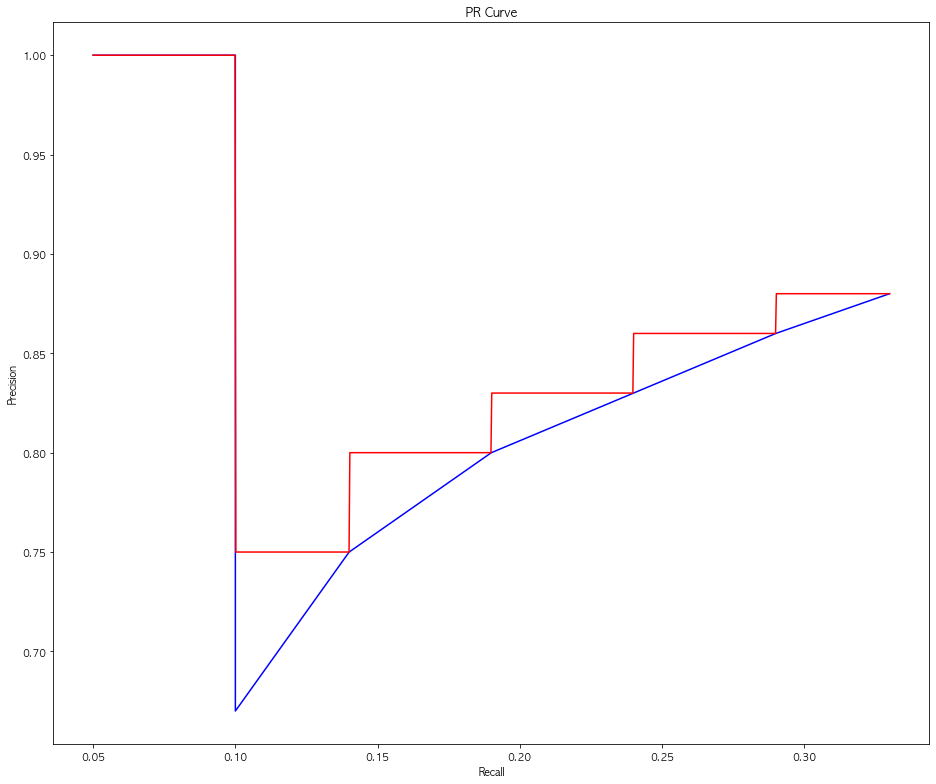

ap is 0.2035087087087087

검출되어야 할 개수 : 21

   time Confidense Result
0     1     98.68%     TP
1     2     99.89%     TP
2     3     87.92%     TP
3     4     98.89%     TP
4     5     35.62%     No
5     6     19.83%     No
6     7    -128.4%     No
7     8    -28.87%     No
8     9     65.43%     FP
9    10     55.67%     No
10   11     98.48%     TP
11   12    -285.0%     No
12   13   -253.41%     No
13   14   -685.21%     No
14   15   -180.11%     No
15   16  -1406.14%     No
16   17   -223.88%     No
17   18     89.38%     TP
18   19     95.96%     TP
19   20     14.84%     No
20   21     66.41%     FP
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    0     98.68%       TP     1     0   1/1=1.0  1/21=0.05             1.00   
1    1     99.89%       TP     2     0   2/2=1.0   2/21=0.1             1.00   
2    2     87.92%       TP     3     0   3/3=1.0  3/21=0.14             1.00   
3    3     98.89%       TP     4     0   4/4=1.0  4/21=0.19      

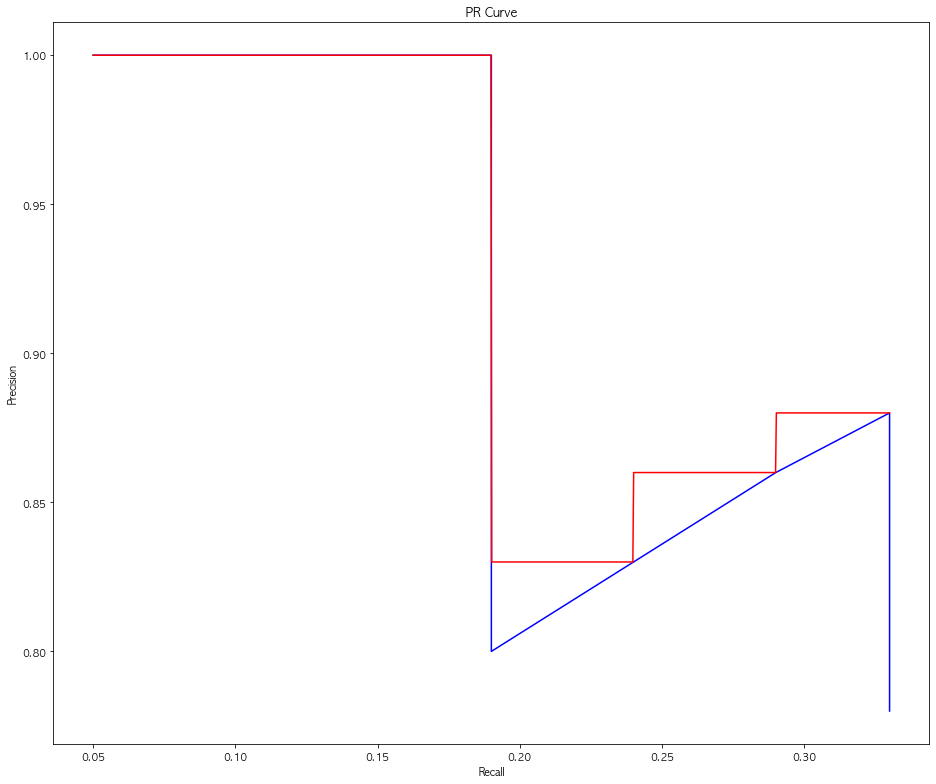

ap is 0.2239411411411412

검출되어야 할 개수 : 21

   time Confidense Result
0     1     78.51%     TP
1     2     84.39%     TP
2     3      78.0%     TP
3     4     96.65%     TP
4     5     62.88%     FP
5     6     85.41%     TP
6     7      7.29%     No
7     8    -45.96%     No
8     9   -881.94%     No
9    10     70.31%     FP
10   11      2.15%     No
11   12    -37.49%     No
12   13     68.49%     FP
13   14     72.49%     FP
14   15     90.74%     TP
15   16     93.76%     TP
16   17     94.72%     TP
17   18     87.46%     TP
18   19     83.84%     TP
19   20      83.4%     TP
20   21     89.54%     TP
   Time Confidense TP or FP 누적 TP 누적 FP   Precision      Recall  \
0     0     78.51%       TP     1     0     1/1=1.0   1/21=0.05   
1     1     84.39%       TP     2     0     2/2=1.0    2/21=0.1   
2     2      78.0%       TP     3     0     3/3=1.0   3/21=0.14   
3     3     96.65%       TP     4     0     4/4=1.0   4/21=0.19   
4     4     62.88%       FP     4     1     4/5=0.

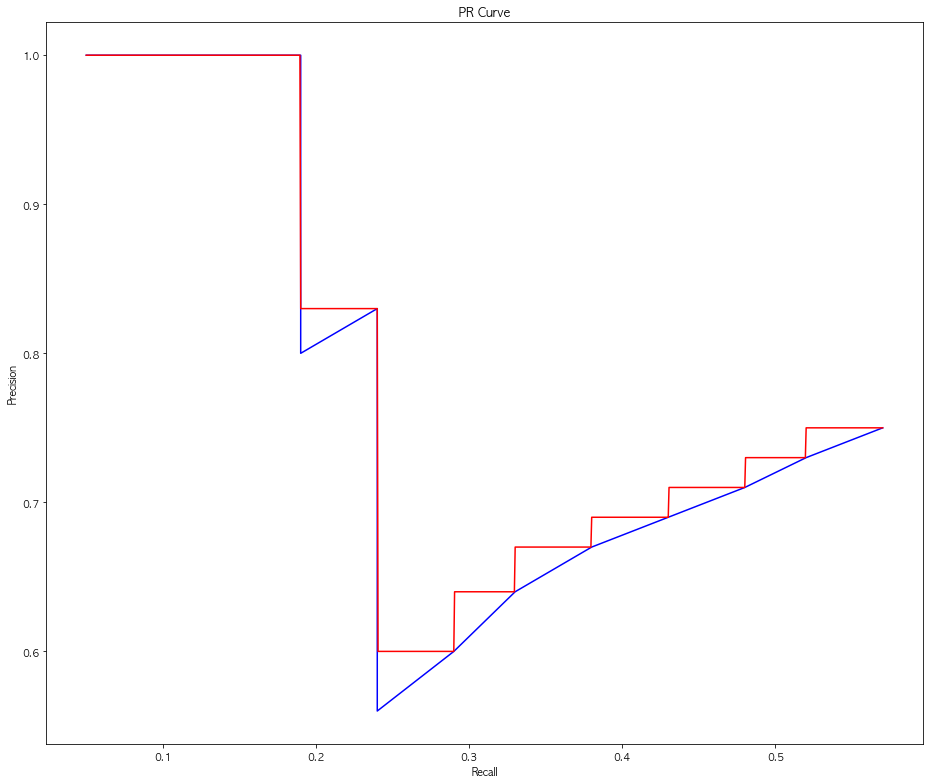

ap is 0.36684724724724727

검출되어야 할 개수 : 21

   time Confidense Result
0     1      94.8%     TP
1     2     98.22%     TP
2     3     90.15%     TP
3     4     94.95%     TP
4     5     82.39%     TP
5     6     95.55%     TP
6     7     94.87%     TP
7     8     76.41%     TP
8     9     88.52%     TP
9    10     30.95%     No
10   11     58.61%     No
11   12      25.9%     No
12   13      78.3%     TP
13   14     75.58%     TP
14   15     97.19%     TP
15   16     88.47%     TP
16   17     70.79%     FP
17   18     97.68%     TP
18   19     98.13%     TP
19   20     74.71%     FP
20   21     76.13%     TP
   Time Confidense TP or FP 누적 TP 누적 FP   Precision      Recall  \
0     0      94.8%       TP     1     0     1/1=1.0   1/21=0.05   
1     1     98.22%       TP     2     0     2/2=1.0    2/21=0.1   
2     2     90.15%       TP     3     0     3/3=1.0   3/21=0.14   
3     3     94.95%       TP     4     0     4/4=1.0   4/21=0.19   
4     4     82.39%       TP     5     0     5/5=1

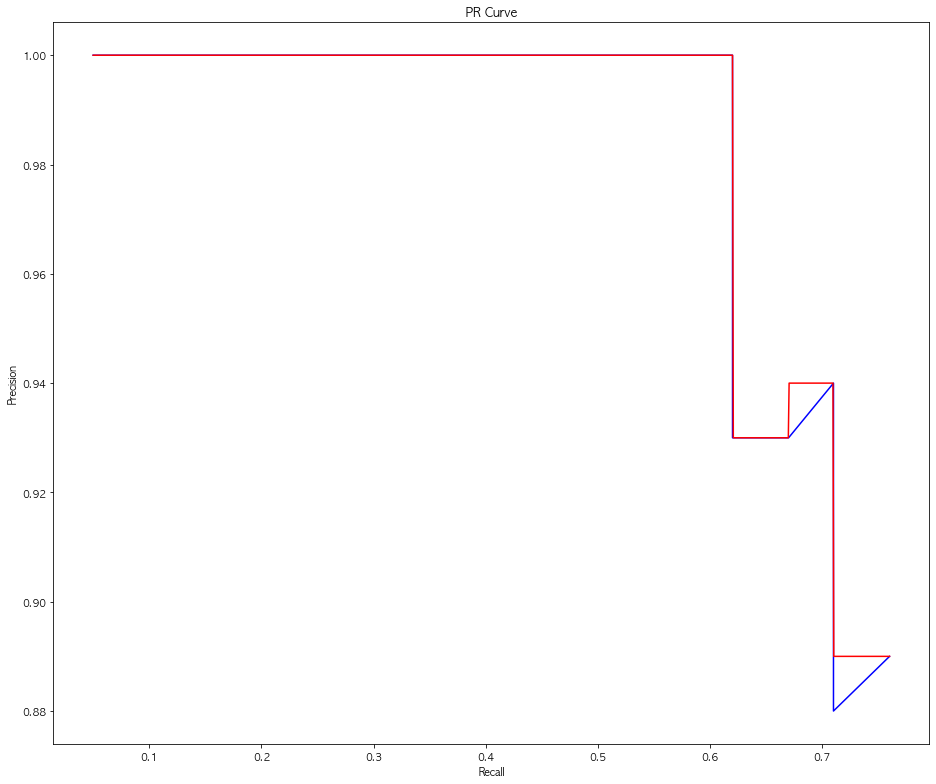

ap is 0.65234004004004

검출되어야 할 개수 : 21

   time Confidense Result
0     1     81.14%     TP
1     2     89.29%     TP
2     3     75.24%     TP
3     4     98.97%     TP
4     5      1.85%     No
5     6  -2435.01%     No
6     7   -250.12%     No
7     8     80.88%     TP
8     9     54.41%     No
9    10     22.92%     No
10   11     47.55%     No
11   12     81.99%     TP
12   13      55.2%     No
13   14     99.06%     TP
14   15      77.7%     TP
15   16     90.06%     TP
16   17     12.28%     No
17   18      72.5%     FP
18   19     89.29%     TP
19   20      21.4%     No
20   21     36.44%     No
   Time Confidense TP or FP 누적 TP 누적 FP   Precision      Recall  \
0     0     81.14%       TP     1     0     1/1=1.0   1/21=0.05   
1     1     89.29%       TP     2     0     2/2=1.0    2/21=0.1   
2     2     75.24%       TP     3     0     3/3=1.0   3/21=0.14   
3     3     98.97%       TP     4     0     4/4=1.0   4/21=0.19   
4     7     80.88%       TP     5     0     5/5=1.0 

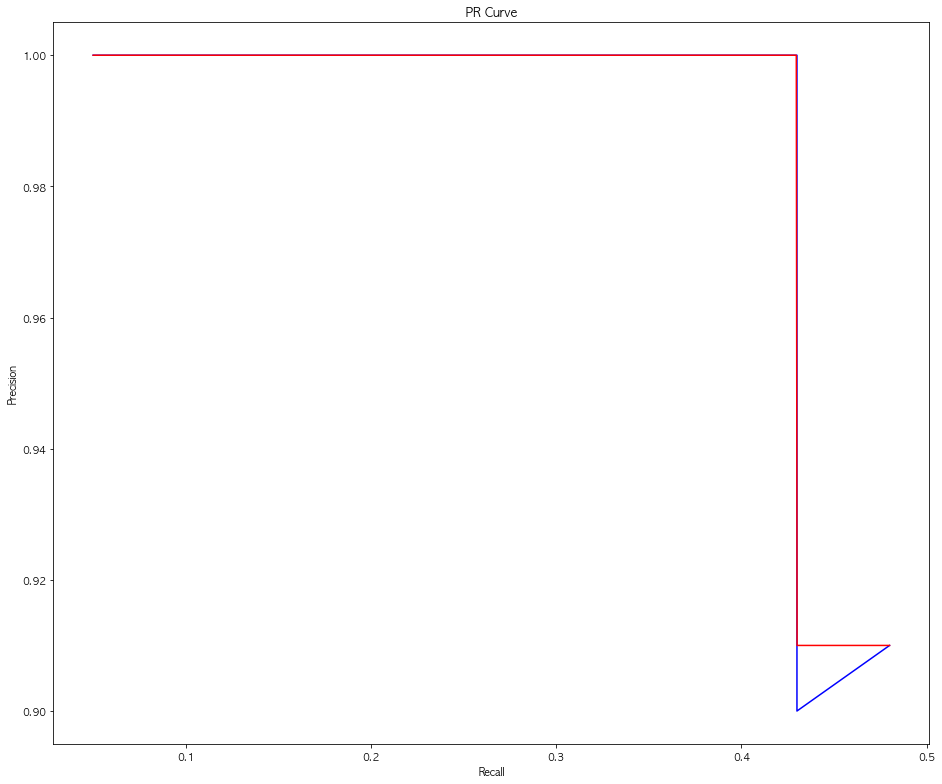

ap is 0.37963963963963965

검출되어야 할 개수 : 21

   time Confidense Result
0     1     75.76%     TP
1     2     76.18%     TP
2     3     80.64%     TP
3     4     98.89%     TP
4     5     56.06%     No
5     6   -560.63%     No
6     7   -107.61%     No
7     8    -77.58%     No
8     9     70.45%     FP
9    10     32.47%     No
10   11     69.42%     FP
11   12   -114.76%     No
12   13    -60.39%     No
13   14   -124.67%     No
14   15   -881.78%     No
15   16   -139.52%     No
16   17  -1197.94%     No
17   18    -207.1%     No
18   19    -13.16%     No
19   20    -17.07%     No
20   21     55.02%     No
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    0     75.76%       TP     1     0   1/1=1.0  1/21=0.05             1.00   
1    1     76.18%       TP     2     0   2/2=1.0   2/21=0.1             1.00   
2    2     80.64%       TP     3     0   3/3=1.0  3/21=0.14             1.00   
3    3     98.89%       TP     4     0   4/4=1.0  4/21=0.19     

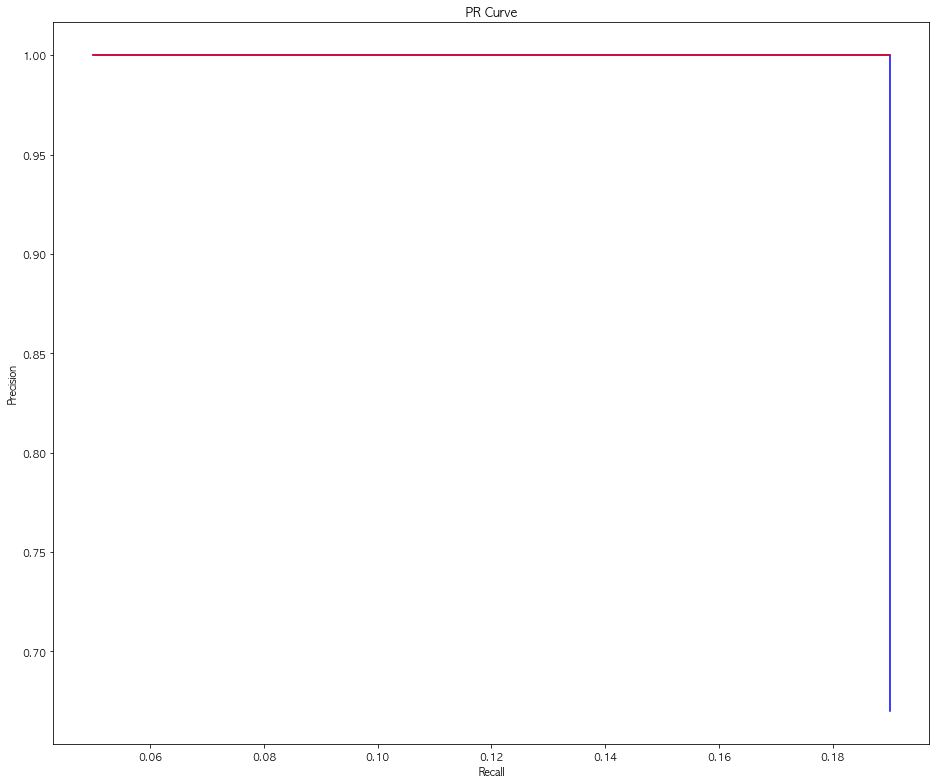

ap is 0

검출되어야 할 개수 : 21

   time  Confidense Result
0     1      81.14%     TP
1     2      95.91%     TP
2     3      75.24%     TP
3     4      91.87%     TP
4     5       1.85%     No
5     6     -406.0%     No
6     7     -22.91%     No
7     8       30.6%     No
8     9      63.35%     FP
9    10       42.9%     No
10   11      81.07%     TP
11   12     -18.78%     No
12   13     -130.8%     No
13   14    -511.31%     No
14   15    -656.03%     No
15   16  -21360.36%     No
16   17    -243.93%     No
17   18      49.54%     No
18   19      92.73%     TP
19   20      52.73%     No
20   21      73.05%     FP
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    0     81.14%       TP     1     0   1/1=1.0  1/21=0.05             1.00   
1    1     95.91%       TP     2     0   2/2=1.0   2/21=0.1             1.00   
2    2     75.24%       TP     3     0   3/3=1.0  3/21=0.14             1.00   
3    3     91.87%       TP     4     0   4/4=1.0  4/21=0.19 

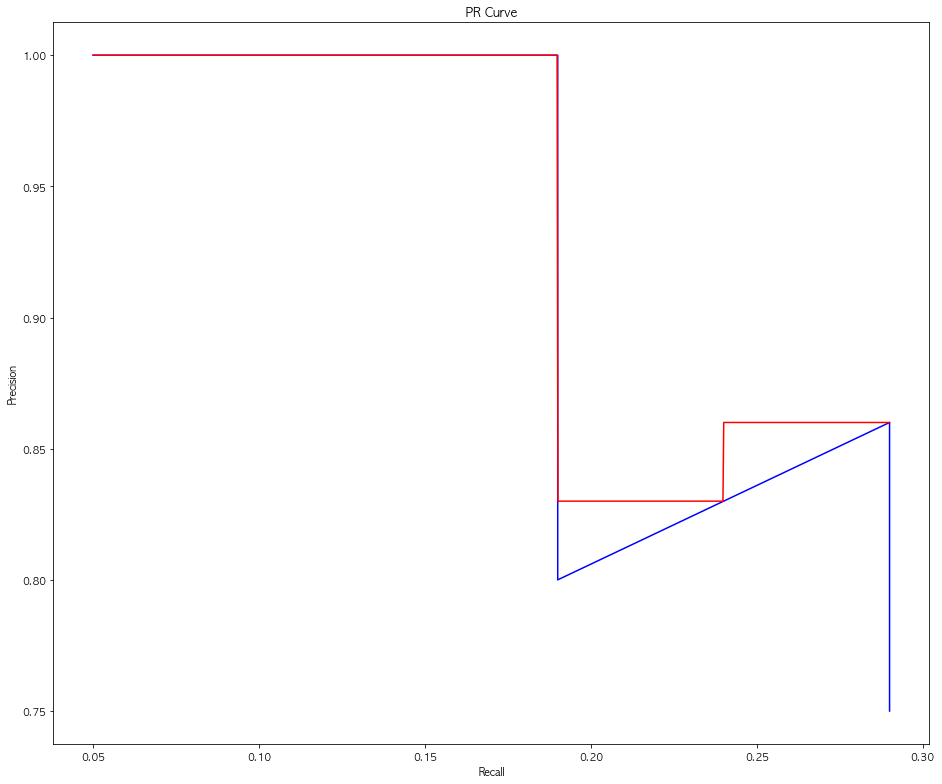

ap is 0.1810954954954955

검출되어야 할 개수 : 21

   time Confidense Result
0     1     98.68%     TP
1     2     93.79%     TP
2     3     90.15%     TP
3     4     94.31%     TP
4     5     48.53%     No
5     6    -91.34%     No
6     7     31.28%     No
7     8     65.53%     FP
8     9     64.52%     FP
9    10     26.87%     No
10   11     59.21%     No
11   12     15.06%     No
12   13     70.52%     FP
13   14     88.03%     TP
14   15    -44.29%     No
15   16   -150.56%     No
16   17    -47.15%     No
17   18     77.19%     TP
18   19     66.18%     FP
19   20     94.68%     TP
20   21     83.39%     TP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     98.68%       TP     1     0    1/1=1.0  1/21=0.05   
1     1     93.79%       TP     2     0    2/2=1.0   2/21=0.1   
2     2     90.15%       TP     3     0    3/3=1.0  3/21=0.14   
3     3     94.31%       TP     4     0    4/4=1.0  4/21=0.19   
4     7     65.53%       FP     4     1    4/5=0.8  4/21=0.1

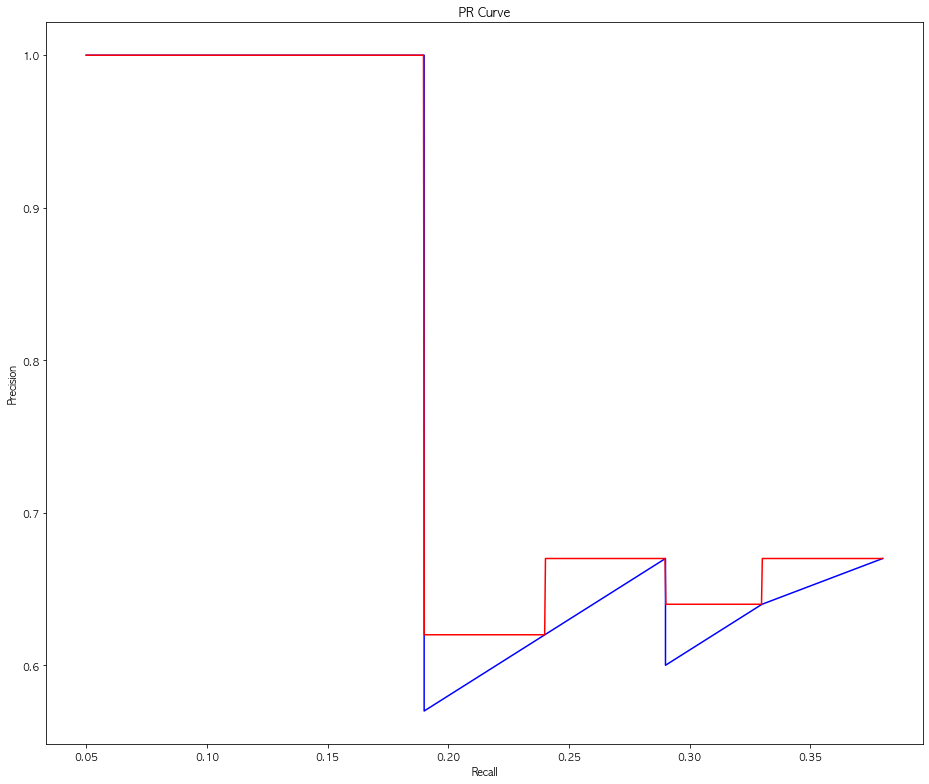

ap is 0.22922282282282289

검출되어야 할 개수 : 21

   time Confidense Result
0     1     84.23%     TP
1     2     78.94%     TP
2     3      85.9%     TP
3     4     78.91%     TP
4     5     91.23%     TP
5     6    -455.1%     No
6     7    -89.29%     No
7     8   -283.35%     No
8     9      -6.7%     No
9    10     37.71%     No
10   11     71.48%     FP
11   12   -145.04%     No
12   13    -75.02%     No
13   14   -171.75%     No
14   15   -147.87%     No
15   16   -375.51%     No
16   17   -727.54%     No
17   18     49.54%     No
18   19     51.13%     No
19   20     27.52%     No
20   21     59.03%     No
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    0     84.23%       TP     1     0   1/1=1.0  1/21=0.05             1.00   
1    1     78.94%       TP     2     0   2/2=1.0   2/21=0.1             1.00   
2    2      85.9%       TP     3     0   3/3=1.0  3/21=0.14             1.00   
3    3     78.91%       TP     4     0   4/4=1.0  4/21=0.19     

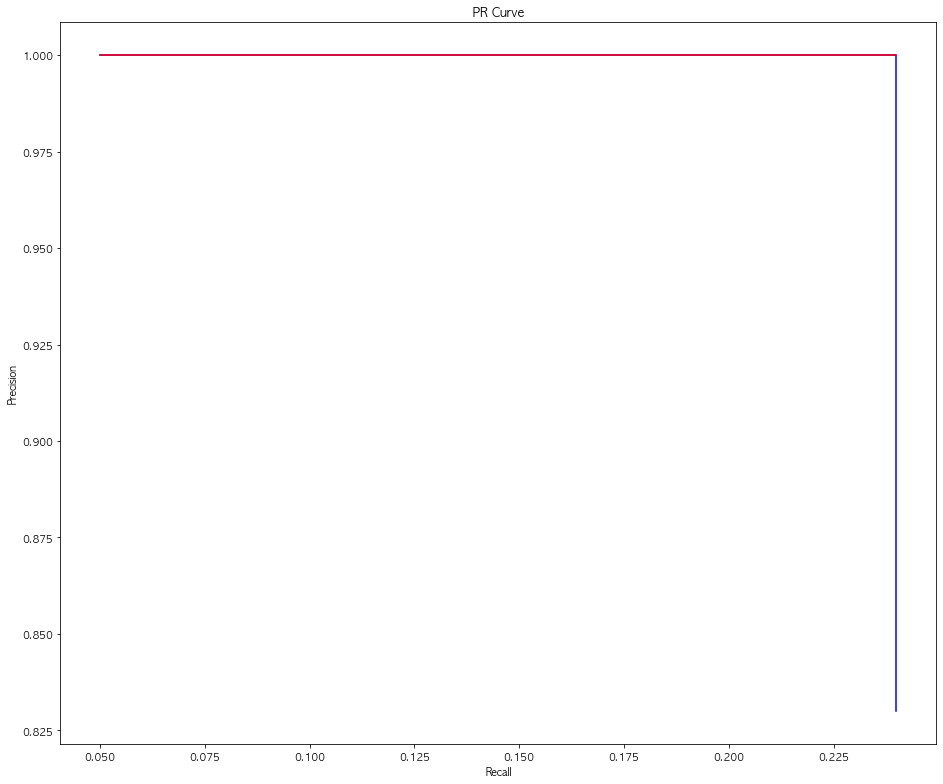

ap is 0

검출되어야 할 개수 : 21

   time Confidense Result
0     1     75.76%     TP
1     2     84.39%     TP
2     3     75.24%     TP
3     4     94.31%     TP
4     5     66.05%     FP
5     6    -12.62%     No
6     7     -82.3%     No
7     8    -366.5%     No
8     9   -140.01%     No
9    10     62.36%     FP
10   11  -1147.83%     No
11   12    -22.74%     No
12   13      78.3%     TP
13   14     84.02%     TP
14   15     85.09%     TP
15   16     97.05%     TP
16   17     94.72%     TP
17   18     81.09%     TP
18   19     74.77%     FP
19   20     88.56%     TP
20   21     89.54%     TP
   Time Confidense TP or FP 누적 TP 누적 FP   Precision      Recall  \
0     0     75.76%       TP     1     0     1/1=1.0   1/21=0.05   
1     1     84.39%       TP     2     0     2/2=1.0    2/21=0.1   
2     2     75.24%       TP     3     0     3/3=1.0   3/21=0.14   
3     3     94.31%       TP     4     0     4/4=1.0   4/21=0.19   
4     4     66.05%       FP     4     1     4/5=0.8   4/21=0.19   


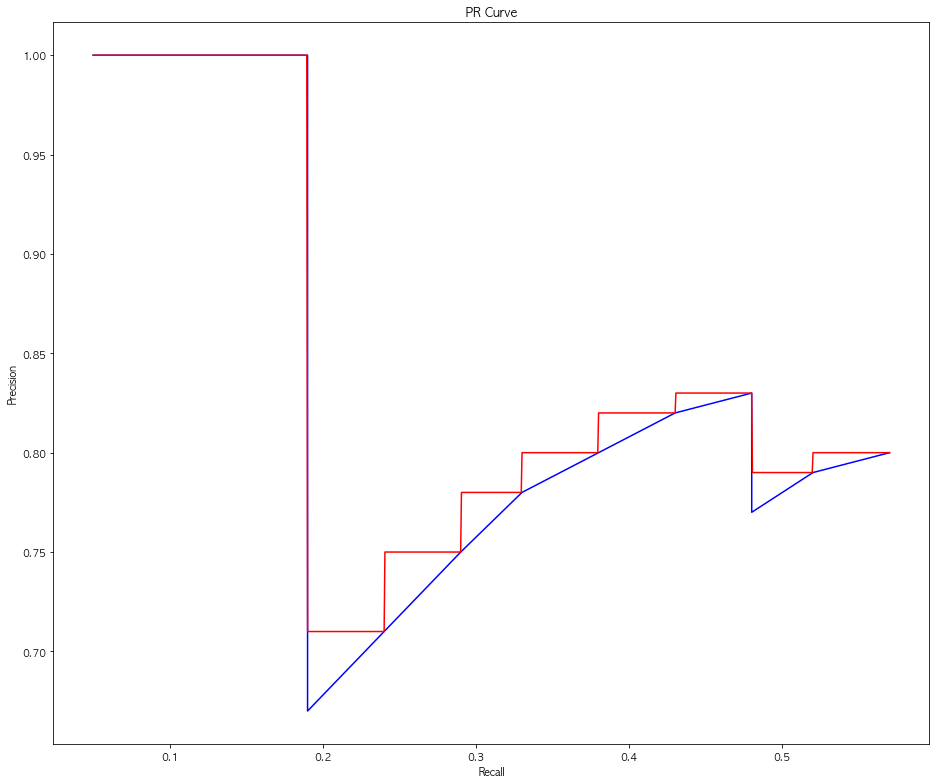

ap is 0.39493453453453464

검출되어야 할 개수 : 21

   time Confidense Result
0     1     90.61%     TP
1     2     79.04%     TP
2     3      92.3%     TP
3     4     89.49%     TP
4     5     93.23%     TP
5     6     97.95%     TP
6     7     82.12%     TP
7     8      91.8%     TP
8     9   -109.68%     No
9    10     22.15%     No
10   11     60.07%     FP
11   12      25.9%     No
12   13     81.26%     TP
13   14     84.02%     TP
14   15     99.55%     TP
15   16     96.21%     TP
16   17     92.47%     TP
17   18     79.17%     TP
18   19     76.42%     TP
19   20     74.71%     FP
20   21     87.09%     TP
   Time Confidense TP or FP 누적 TP 누적 FP   Precision      Recall  \
0     0     90.61%       TP     1     0     1/1=1.0   1/21=0.05   
1     1     79.04%       TP     2     0     2/2=1.0    2/21=0.1   
2     2      92.3%       TP     3     0     3/3=1.0   3/21=0.14   
3     3     89.49%       TP     4     0     4/4=1.0   4/21=0.19   
4     4     93.23%       TP     5     0     5/5=1

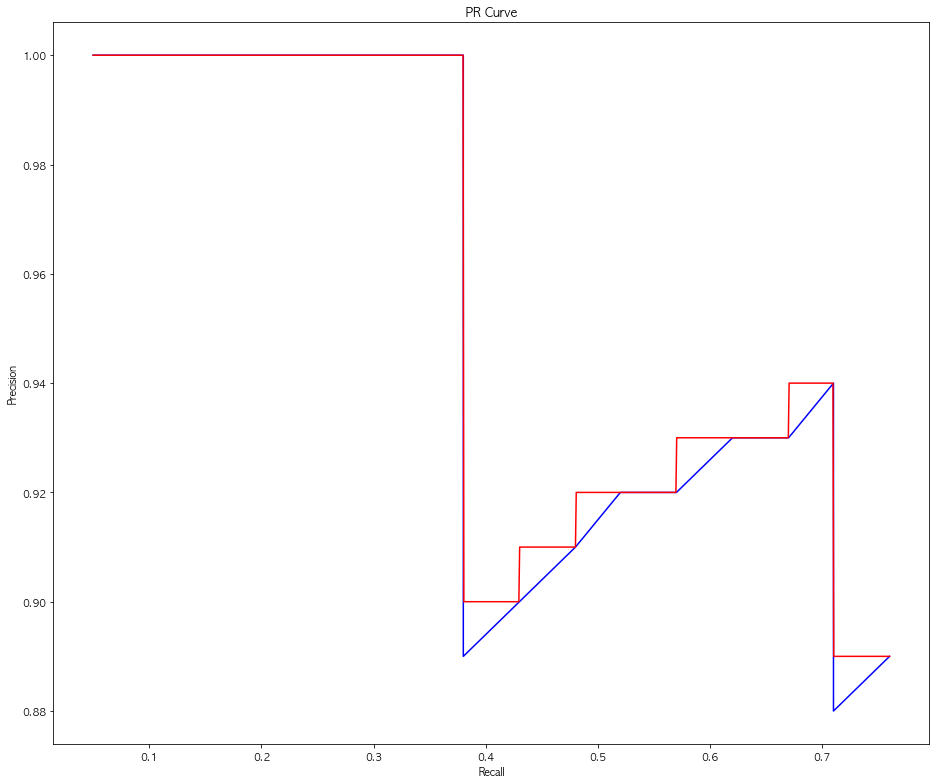

ap is 0.6301871871871871

검출되어야 할 개수 : 21

   time Confidense Result
0     1     88.39%     TP
1     2     95.91%     TP
2     3     80.64%     TP
3     4     98.89%     TP
4     5    -20.83%     No
5     6   -169.13%     No
6     7     77.92%     TP
7     8      78.1%     TP
8     9     68.33%     FP
9    10     19.16%     No
10   11     41.79%     No
11   12     32.35%     No
12   13      67.0%     FP
13   14     15.52%     No
14   15    -30.56%     No
15   16    -67.05%     No
16   17   -243.93%     No
17   18     -6.16%     No
18   19     73.02%     FP
19   20     43.58%     No
20   21     66.41%     FP
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    0     88.39%       TP     1     0   1/1=1.0  1/21=0.05             1.00   
1    1     95.91%       TP     2     0   2/2=1.0   2/21=0.1             1.00   
2    2     80.64%       TP     3     0   3/3=1.0  3/21=0.14             1.00   
3    3     98.89%       TP     4     0   4/4=1.0  4/21=0.19      

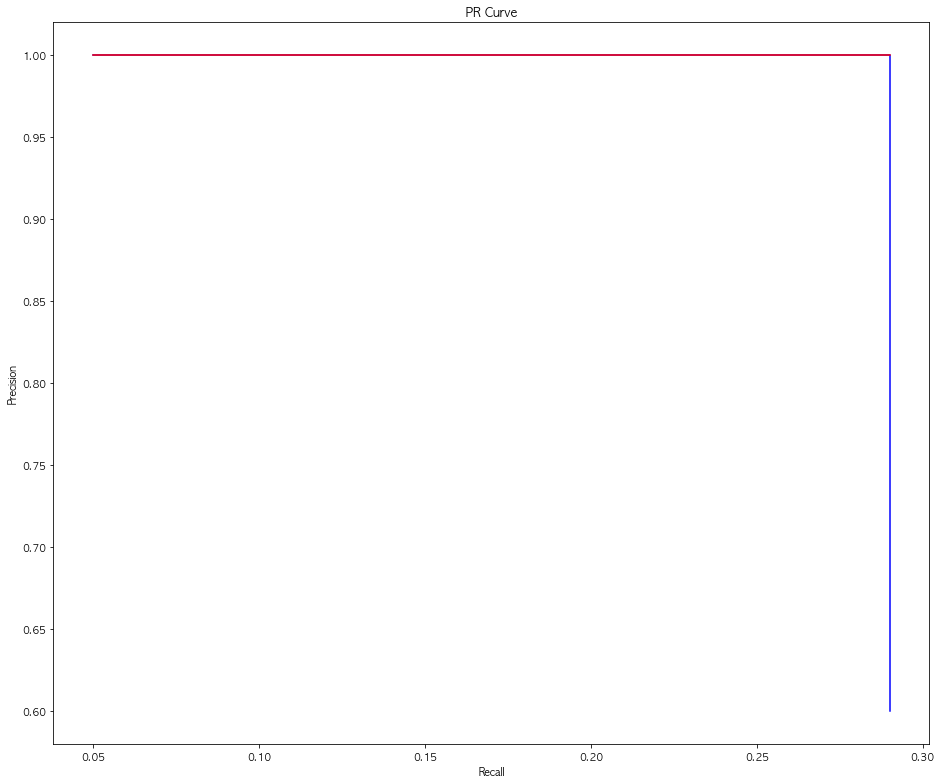

ap is 0

검출되어야 할 개수 : 21

   time Confidense Result
0     1      94.8%     TP
1     2     96.41%     TP
2     3     85.59%     TP
3     4      89.3%     TP
4     5    -12.71%     No
5     6      36.0%     No
6     7    -22.91%     No
7     8     91.85%     TP
8     9     59.04%     No
9    10     19.16%     No
10   11     41.08%     No
11   12     28.34%     No
12   13     73.86%     FP
13   14     60.65%     FP
14   15     66.78%     FP
15   16   -5462.0%     No
16   17   -1567.7%     No
17   18   -841.61%     No
18   19     62.94%     FP
19   20      64.6%     FP
20   21     76.13%     TP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0      94.8%       TP     1     0    1/1=1.0  1/21=0.05   
1     1     96.41%       TP     2     0    2/2=1.0   2/21=0.1   
2     2     85.59%       TP     3     0    3/3=1.0  3/21=0.14   
3     3      89.3%       TP     4     0    4/4=1.0  4/21=0.19   
4     7     91.85%       TP     5     0    5/5=1.0  5/21=0.24   
5    12     

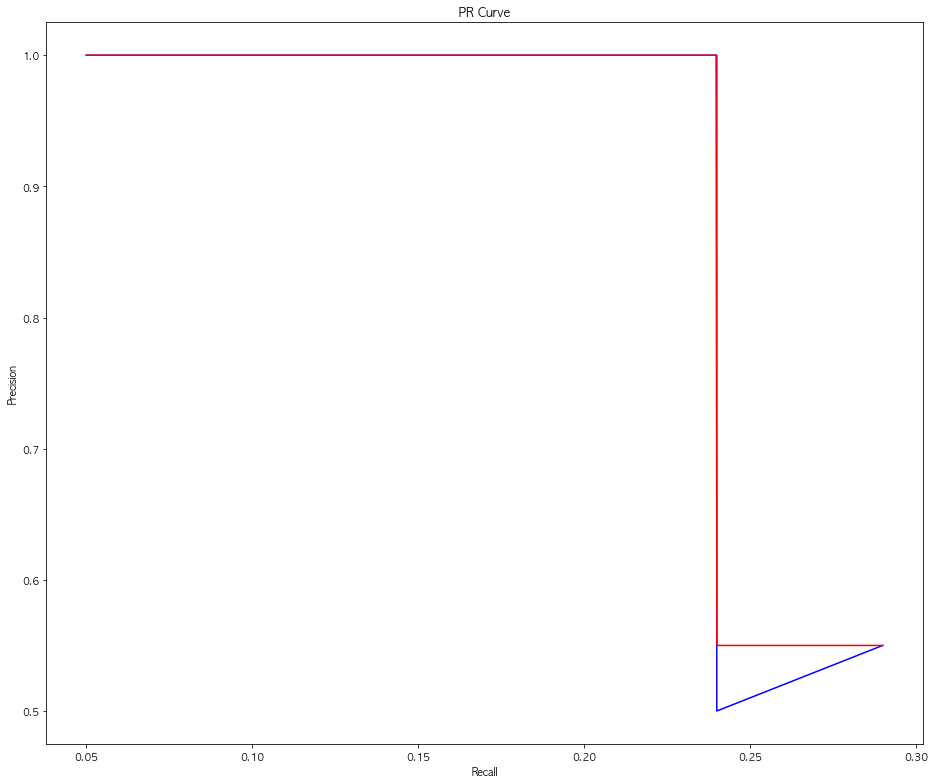

ap is 0.18978978978978978

검출되어야 할 개수 : 21

   time Confidense Result
0     1     90.61%     TP
1     2     97.94%     TP
2     3     85.59%     TP
3     4     96.65%     TP
4     5     40.16%     No
5     6   -186.79%     No
6     7    -22.91%     No
7     8      30.6%     No
8     9     47.72%     No
9    10     44.96%     No
10   11     93.65%     TP
11   12   -145.04%     No
12   13   -253.41%     No
13   14      27.9%     No
14   15     11.76%     No
15   16     19.12%     No
16   17    -63.86%     No
17   18   -127.34%     No
18   19    -27.18%     No
19   20    -26.85%     No
20   21    -19.94%     No
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    0     90.61%       TP     1     0   1/1=1.0  1/21=0.05              1.0   
1    1     97.94%       TP     2     0   2/2=1.0   2/21=0.1              1.0   
2    2     85.59%       TP     3     0   3/3=1.0  3/21=0.14              1.0   
3    3     96.65%       TP     4     0   4/4=1.0  4/21=0.19     

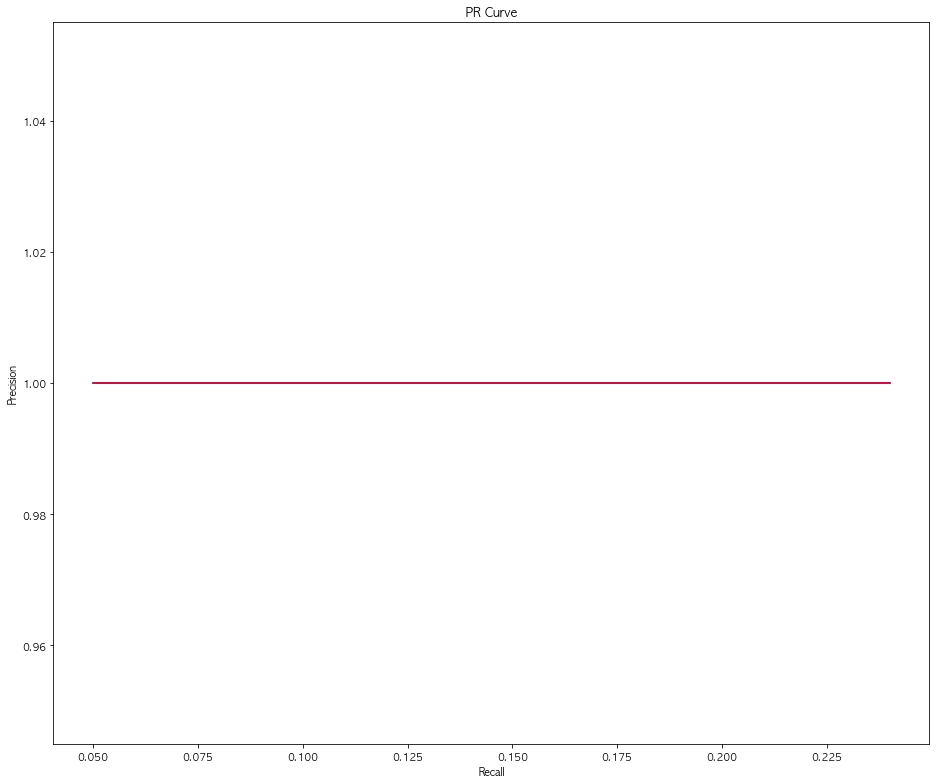

ap is 0

검출되어야 할 개수 : 21

   time  Confidense Result
0     1       44.0%     No
1     2      51.56%     No
2     3      28.76%     No
3     4      21.72%     No
4     5     -20.83%     No
5     6   -1271.94%     No
6     7      80.91%     TP
7     8      61.97%     FP
8     9      90.83%     TP
9    10      67.78%     FP
10   11      47.05%     No
11   12    -464.76%     No
12   13  -23326.06%     No
13   14    -424.65%     No
14   15     -88.72%     No
15   16     -11.45%     No
16   17      38.77%     No
17   18      75.59%     TP
18   19      68.81%     FP
19   20      85.09%     TP
20   21      80.75%     TP
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    6     80.91%       TP     1     0   1/1=1.0  1/21=0.05             1.00   
1    7     61.97%       FP     1     1   1/2=0.5  1/21=0.05             0.50   
2    8     90.83%       TP     2     1  2/3=0.67   2/21=0.1             0.67   
3    9     67.78%       FP     2     2   2/4=0.5   2/21=0.1 

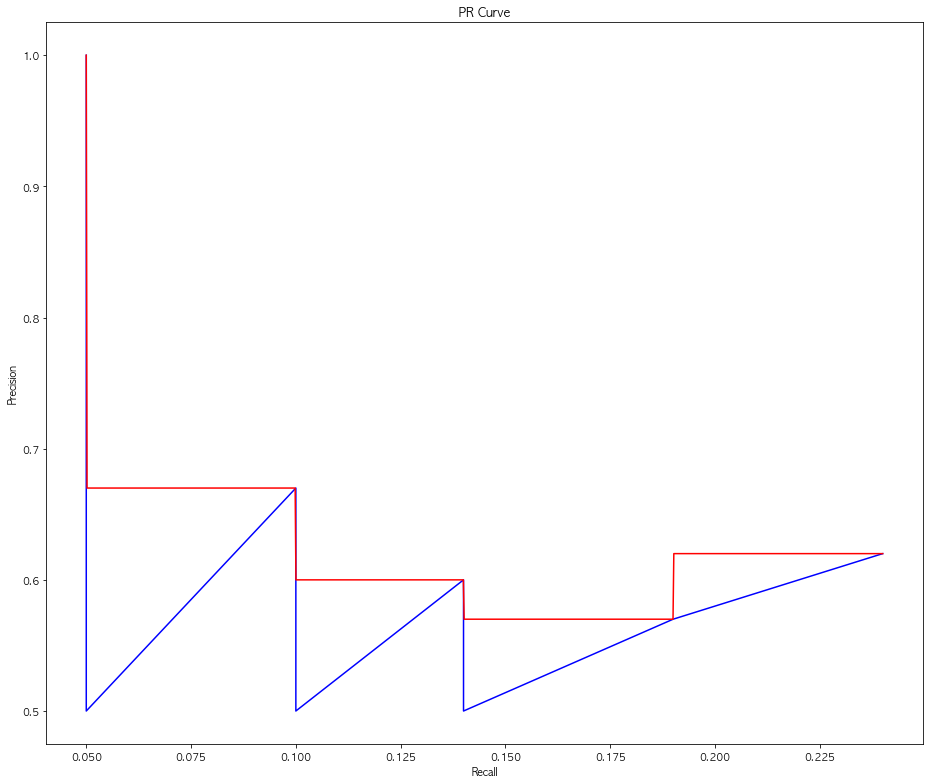

ap is 0.08562552552552553

검출되어야 할 개수 : 21

   time  Confidense Result
0     1      77.13%     TP
1     2       73.4%     FP
2     3      80.86%     TP
3     4      73.92%     FP
4     5      97.75%     TP
5     6      43.68%     No
6     7     -582.5%     No
7     8  -24879.47%     No
8     9    -311.02%     No
9    10      67.78%     FP
10   11      75.97%     TP
11   12     -89.37%     No
12   13     -24.54%     No
13   14     -88.17%     No
14   15      11.76%     No
15   16    -125.14%     No
16   17    -161.66%     No
17   18    -263.58%     No
18   19      95.96%     TP
19   20      56.91%     No
20   21      76.13%     TP
  Time Confidense TP or FP 누적 TP 누적 FP Precision     Recall  Precision Value  \
0    0     77.13%       TP     1     0   1/1=1.0  1/21=0.05             1.00   
1    1      73.4%       FP     1     1   1/2=0.5  1/21=0.05             0.50   
2    2     80.86%       TP     2     1  2/3=0.67   2/21=0.1             0.67   
3    3     73.92%       FP     2     2   2

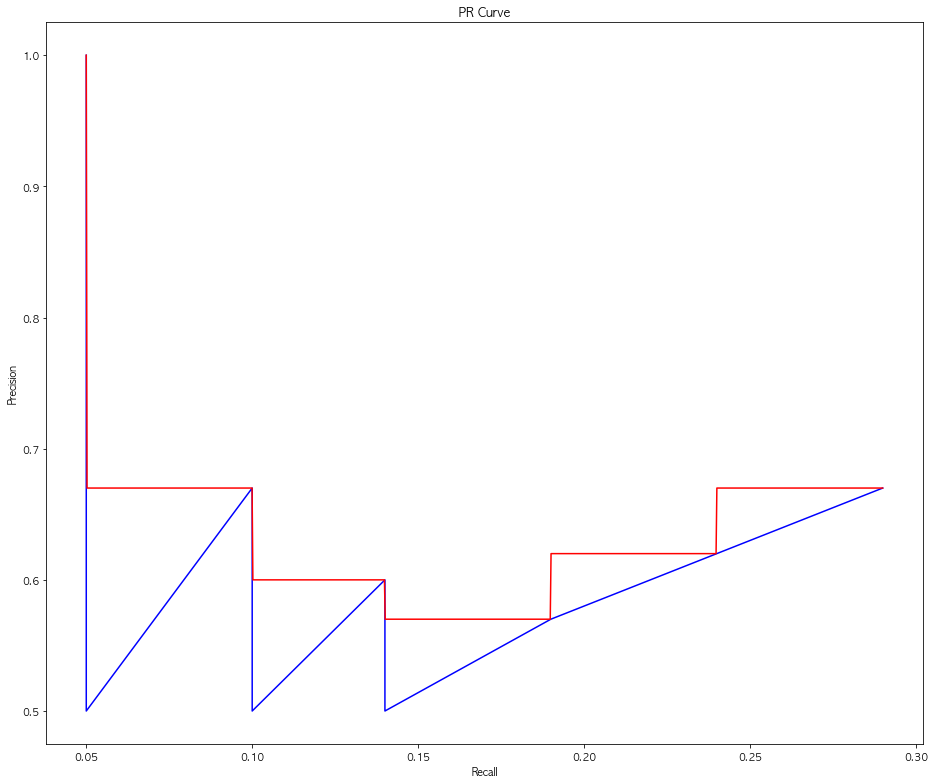

ap is 0.11628108108108108

검출되어야 할 개수 : 21

   time Confidense Result
0     1     78.51%     TP
1     2      86.9%     TP
2     3     75.24%     TP
3     4     91.87%     TP
4     5     71.98%     FP
5     6     -3.46%     No
6     7   -119.42%     No
7     8    -366.5%     No
8     9   -245.44%     No
9    10   -134.82%     No
10   11   -665.09%     No
11   12   -242.63%     No
12   13    -54.75%     No
13   14    -53.72%     No
14   15     76.47%     TP
15   16     68.91%     FP
16   17     66.37%     FP
17   18     97.68%     TP
18   19     85.93%     TP
19   20     80.64%     TP
20   21     84.54%     TP
   Time Confidense TP or FP 누적 TP 누적 FP  Precision     Recall  \
0     0     78.51%       TP     1     0    1/1=1.0  1/21=0.05   
1     1      86.9%       TP     2     0    2/2=1.0   2/21=0.1   
2     2     75.24%       TP     3     0    3/3=1.0  3/21=0.14   
3     3     91.87%       TP     4     0    4/4=1.0  4/21=0.19   
4     4     71.98%       FP     4     1    4/5=0.8  4/21=0.

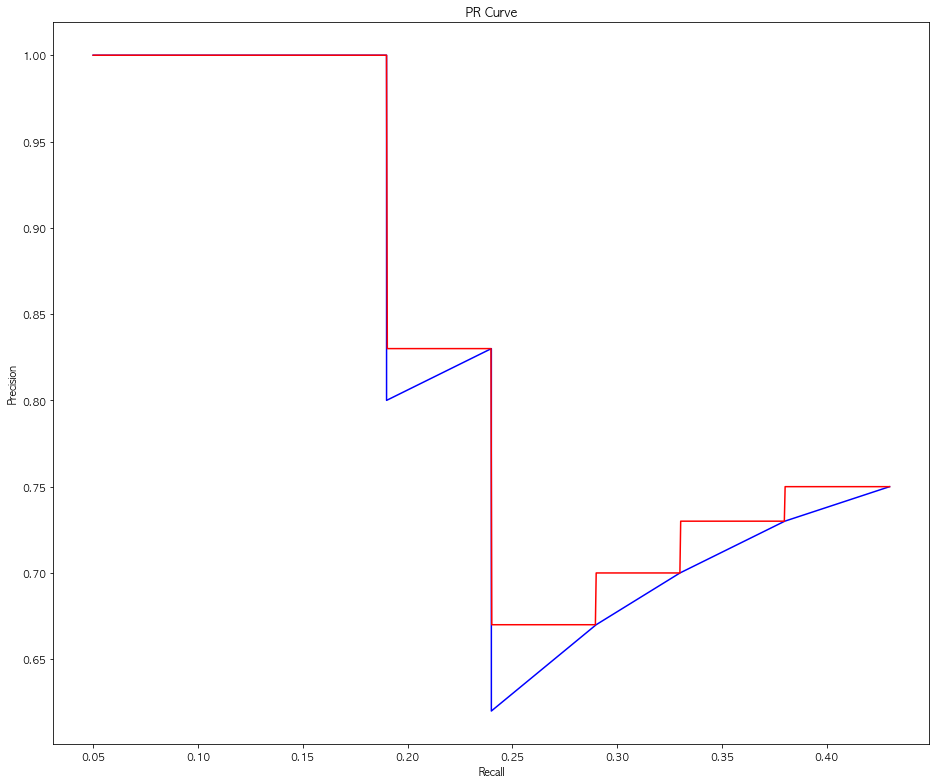

ap is 0.27821021021021025

검출되어야 할 개수 : 21

   time Confidense Result
0     1     90.61%     TP
1     2     96.41%     TP
2     3     96.34%     TP
3     4     94.95%     TP
4     5     89.14%     TP
5     6     95.96%     TP
6     7     90.12%     TP
7     8     63.48%     FP
8     9     90.84%     TP
9    10     23.25%     No
10   11     57.22%     No
11   12     44.74%     No
12   13      98.5%     TP
13   14     84.02%     TP
14   15     90.74%     TP
15   16     97.05%     TP
16   17      95.1%     TP
17   18      83.1%     TP
18   19     95.96%     TP
19   20     71.51%     FP
20   21     66.41%     FP
   Time Confidense TP or FP 누적 TP 누적 FP   Precision      Recall  \
0     0     90.61%       TP     1     0     1/1=1.0   1/21=0.05   
1     1     96.41%       TP     2     0     2/2=1.0    2/21=0.1   
2     2     96.34%       TP     3     0     3/3=1.0   3/21=0.14   
3     3     94.95%       TP     4     0     4/4=1.0   4/21=0.19   
4     4     89.14%       TP     5     0     5/5=1

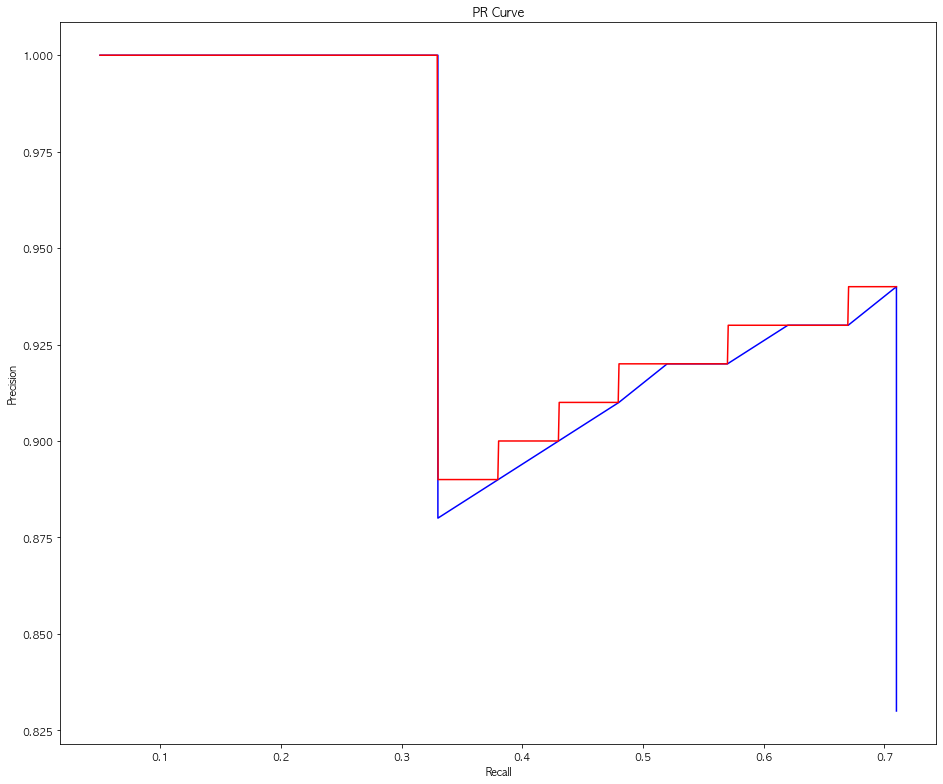

ap is 0.5874660660660661



In [183]:
# Mean Average Precision Prototype ( with visualization )
# model init
pr_test = TMA[0]

# list init
p_list = pr_test.predicts_list.copy()
o_list = pr_test.norm_datas['test'].values.reshape(-1,24)[:,3:].copy()
# Note : 3 is predict_length

APs = np.array([])
# operate APs
for idx, test_o in enumerate(o_list):
    test_p = p_list[0]
    print("검출되어야 할 개수 : {}\n".format(len(test_o)))
    threshold = 40
    conf_threshold = 25
    detect_df = pd.DataFrame(columns=['time', 'Confidense', 'Result'])
    for idx,o in enumerate(test_o):
        p = test_p[idx]
        th = abs(o) * threshold / 100
        conf_th = abs(o) * conf_threshold / 100
        err = abs(abs(o) - abs(p))

        result = "TP" if err < conf_th else "FP" if err < th else "No"

#         print("## info ##")
#         print("original: {}, predict: {}".format(p, o))
#         print("threshold : err < {}, err : {}".format(th, err))
#         print("result : {}".format(result))

        detect_df = detect_df.append({
            "time": idx + 1,
            "Confidense": "{}%".format(
                round((abs(o) - err) / abs(o) * 100, 2)
            ),
            "Result": result
        }, ignore_index=True)

    print(detect_df)
    
    detect_size = len(detect_df)
    
    # protect-recall curve init
    pr_check_df = detect_df[(
        detect_df['Result'] == "TP"
    ) | (
        detect_df['Result'] == "FP"    
    )]
    pr_df = pd.DataFrame(columns=['Time', 'Confidense', 'TP or FP',
                                 '누적 TP', '누적 FP', 'Precision', 'Recall',
                                 "Precision Value", "Recall Value"])

    detect = 0
    tp_detect = 0
    fp_detect = 0
    for idx in pr_check_df.index:
        is_tp = pr_check_df.loc[idx]['Result'] == "TP"
        if is_tp:
            tp_detect += 1
        else:
            fp_detect += 1
        detect += 1

        pr_df = pr_df.append({
            "Time": idx,
            "Confidense": pr_check_df.loc[idx]['Confidense'],
            "TP or FP": pr_check_df.loc[idx]['Result'],
            "누적 TP": tp_detect,
            "누적 FP": fp_detect,
            "Precision": "{}/{}={}".format(
                tp_detect,
                detect,
                round(tp_detect / detect, 2)
            ),
            "Recall": "{}/{}={}".format(
                tp_detect,
                detect_size,
                round(tp_detect / detect_size, 2)
            ),
            "Precision Value": round(tp_detect / detect, 2),
            "Recall Value": round(tp_detect / detect_size, 2)
        }, ignore_index=True)
    
    print(pr_df)
    
    # protect-recall curve visualization
    x = pr_df['Recall Value'].values
    y = pr_df['Precision Value'].values
    
    fn = interp1d(x,y,kind='next')
    
    xint = np.linspace(x.min(), x.max(), 1000)
    yintn = fn(xint)
    
    
    # xint, yintl
    check_x = xint.copy()
    check_y = yintn.copy()
    ap = 0
    x_point = check_x[0]
    y_point = check_y[0]
    for idx, _ in enumerate(check_y):
        if y_point != _:
            area_x_start = x_point
            area_x_end = check_x[idx - 1]

            width = area_x_end - area_x_start #width
            ap += (width * y_point)
            
            x_point = check_x[idx]
            y_point = _
            
    plt.plot(x,y, "b")
    plt.plot(xint, yintn, 'r')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("PR Curve")
    plt.show()
    print("ap is {}".format(ap))
    print()
    APs = np.append(APs, [ap])
    
    
    
    
    

In [187]:
MAP = APs.mean()
print("mean average precision : {}".format(MAP))

mean average precision : 0.15684555214555213


In [38]:
test_p = p_list[0]

In [39]:
test_o = o_list[0]

In [45]:
for idx,o in enumerate(o_list):
    print("검출되어야 할 개수 : {}".format(len(o.flatten())))

검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 

In [72]:
test_p = p_list[0]
print("검출되어야 할 개수 : {}\n".format(len(test_o)))
threshold = 40
conf_threshold = 25
detect_df = pd.DataFrame(columns=['time', 'Confidense', 'Result'])
for idx,o in enumerate(test_o):
    p = test_p[idx]
    th = abs(o) * threshold / 100
    conf_th = abs(o) * conf_threshold / 100
    err = abs(abs(o) - abs(p))
    
    result = "TP" if err < conf_th else "FP" if err < th else "No"
    
    print("## info ##")
    print("original: {}, predict: {}".format(p, o))
    print("threshold : err < {}, err : {}".format(th, err))
    print("result : {}".format(result))
    
    detect_df = detect_df.append({
        "time": idx + 1,
        "Confidense": "{}%".format(
            round((abs(o) - err) / abs(o) * 100, 2)
        ),
        "Result": result
    }, ignore_index=True)
    
    print()

검출되어야 할 개수 : 21

## info ##
original: -1.0076878070831299, predict: -1.3798505065638196
threshold : err < 0.5519402026255278, err : 0.3721626994806897
result : FP

## info ##
original: -0.9588831663131714, predict: -1.3981976328551382
threshold : err < 0.5592790531420553, err : 0.4393144665419668
result : FP

## info ##
original: -1.0119035243988037, predict: -1.3248091276898641
threshold : err < 0.5299236510759456, err : 0.31290560329106043
result : TP

## info ##
original: -0.857227087020874, predict: -1.3981976328551382
threshold : err < 0.5592790531420553, err : 0.5409705458342642
result : FP

## info ##
original: -1.061845302581787, predict: -1.3248091276898641
threshold : err < 0.5299236510759456, err : 0.26296382510807703
result : TP

## info ##
original: -0.8663457632064819, predict: -1.3064620013985455
threshold : err < 0.5225848005594181, err : 0.4401162381920636
result : FP

## info ##
original: -0.8912578225135803, predict: -1.3248091276898641
threshold : err < 0.5299236510

In [73]:
detect_df

,time,Confidense,Result
0,1,73.03%,FP
1,2,68.58%,FP
2,3,76.38%,TP
3,4,61.31%,FP
4,5,80.15%,TP
5,6,66.31%,FP
6,7,67.27%,FP
7,8,82.53%,TP
8,9,95.48%,TP
9,10,19.0%,No


In [75]:
len(detect_df)

21

In [98]:
detect_size = len(detect_df)
pr_check_df = detect_df[(
    detect_df['Result'] == "TP"
) | (
    detect_df['Result'] == "FP"    
)]
pr_df = pd.DataFrame(columns=['Time', 'Confidense', 'TP or FP',
                             '누적 TP', '누적 FP', 'Precision', 'Recall',
                             "Precision Value", "Recall Value"])

detect = 0
tp_detect = 0
fp_detect = 0
for idx in pr_check_df.index:
    is_tp = pr_check_df.loc[idx]['Result'] == "TP"
    if is_tp:
        tp_detect += 1
    else:
        fp_detect += 1
    detect += 1
    
    pr_df = pr_df.append({
        "Time": idx,
        "Confidense": pr_check_df.loc[idx]['Confidense'],
        "TP or FP": pr_check_df.loc[idx]['Result'],
        "누적 TP": tp_detect,
        "누적 FP": fp_detect,
        "Precision": "{}/{}={}".format(
            tp_detect,
            detect,
            round(tp_detect / detect, 2)
        ),
        "Recall": "{}/{}={}".format(
            tp_detect,
            detect_size,
            round(tp_detect / detect_size, 2)
        ),
        "Precision Value": round(tp_detect / detect, 2),
        "Recall Value": round(tp_detect / detect_size, 2)
    }, ignore_index=True)

In [99]:
pr_df

,Time,Confidense,TP or FP,누적 TP,누적 FP,Precision,Recall,Precision Value,Recall Value
0,0,73.03%,FP,0,1,0/1=0.0,0/21=0.0,0.00,0.00
1,1,68.58%,FP,0,2,0/2=0.0,0/21=0.0,0.00,0.00
2,2,76.38%,TP,1,2,1/3=0.33,1/21=0.05,0.33,0.05
3,3,61.31%,FP,1,3,1/4=0.25,1/21=0.05,0.25,0.05
4,4,80.15%,TP,2,3,2/5=0.4,2/21=0.1,0.40,0.10
5,5,66.31%,FP,2,4,2/6=0.33,2/21=0.1,0.33,0.10
6,6,67.27%,FP,2,5,2/7=0.29,2/21=0.1,0.29,0.10
7,7,82.53%,TP,3,5,3/8=0.38,3/21=0.14,0.38,0.14
8,8,95.48%,TP,4,5,4/9=0.44,4/21=0.19,0.44,0.19
9,11,94.82%,TP,5,5,5/10=0.5,5/21=0.24,0.50,0.24


In [114]:
x = pr_df['Recall Value'].values
y = pr_df['Precision Value'].values
print(x)
print(y)

[0.   0.   0.05 0.05 0.1  0.1  0.1  0.14 0.19 0.24 0.24 0.29 0.29 0.29
 0.29 0.29 0.33 0.38]
[0.   0.   0.33 0.25 0.4  0.33 0.29 0.38 0.44 0.5  0.45 0.5  0.46 0.43
 0.4  0.38 0.41 0.44]


In [ ]:
curve_x = list()
curve_y = list()

for idx, _ in 

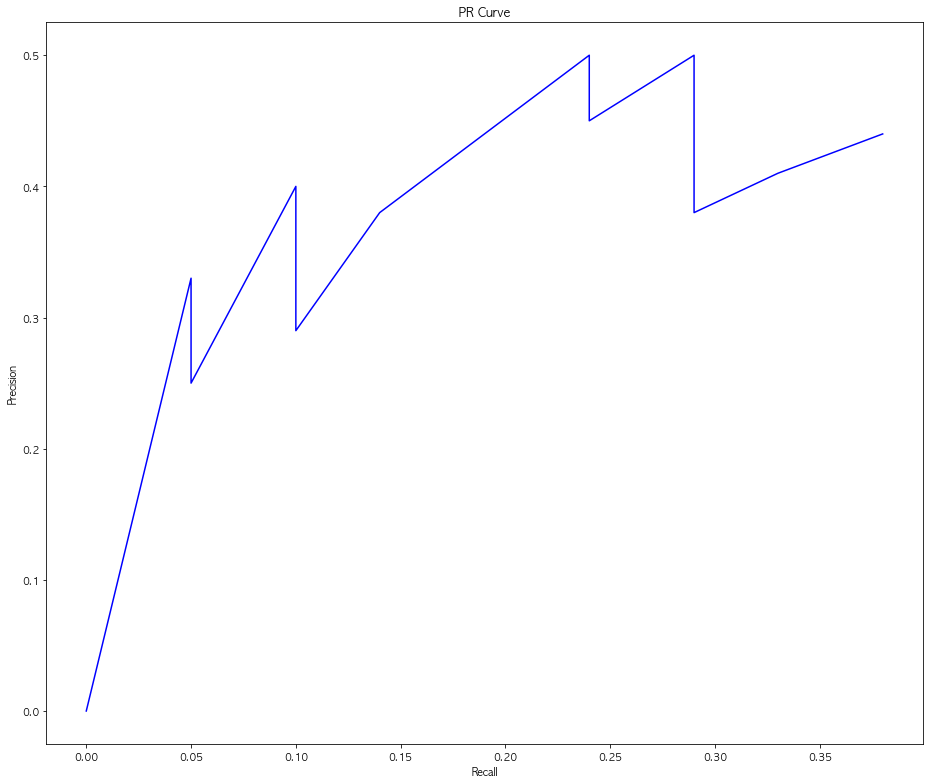

In [107]:
import matplotlib.pyplot as plt

plt.plot(x,y, "b")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve")
plt.show()

In [141]:
# linear
# nearest
fn = interp1d(x,y,kind='next')
fn

In [146]:
xint = np.linspace(x.min(), x.max(), 1000)
yintl = fl(xint)

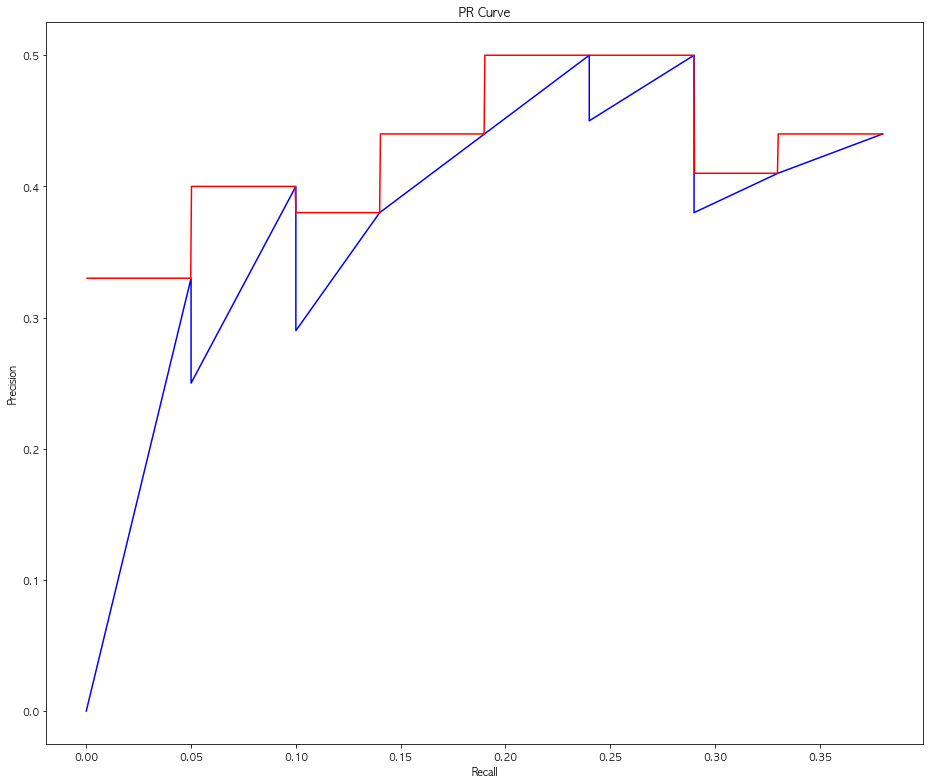

In [153]:
import matplotlib.pyplot as plt

plt.plot(x,y, "b")
plt.plot(xint[1:], yintl[1:], 'r')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve")
plt.show()

In [166]:
xint[0:133]

array([0.        , 0.00038038, 0.00076076, 0.00114114, 0.00152152,
       0.0019019 , 0.00228228, 0.00266266, 0.00304304, 0.00342342,
       0.0038038 , 0.00418418, 0.00456456, 0.00494494, 0.00532533,
       0.00570571, 0.00608609, 0.00646647, 0.00684685, 0.00722723,
       0.00760761, 0.00798799, 0.00836837, 0.00874875, 0.00912913,
       0.00950951, 0.00988989, 0.01027027, 0.01065065, 0.01103103,
       0.01141141, 0.01179179, 0.01217217, 0.01255255, 0.01293293,
       0.01331331, 0.01369369, 0.01407407, 0.01445445, 0.01483483,
       0.01521522, 0.0155956 , 0.01597598, 0.01635636, 0.01673674,
       0.01711712, 0.0174975 , 0.01787788, 0.01825826, 0.01863864,
       0.01901902, 0.0193994 , 0.01977978, 0.02016016, 0.02054054,
       0.02092092, 0.0213013 , 0.02168168, 0.02206206, 0.02244244,
       0.02282282, 0.0232032 , 0.02358358, 0.02396396, 0.02434434,
       0.02472472, 0.02510511, 0.02548549, 0.02586587, 0.02624625,
       0.02662663, 0.02700701, 0.02738739, 0.02776777, 0.02814

In [164]:
yintl[0:132]

array([0.  , 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33])

In [171]:
# xint, yintl
check_x = xint.copy()
check_y = yintl.copy()
ap = 0
x_point = check_x[0]
y_point = check_y[0]
for idx, _ in enumerate(check_y):
    if y_point != _:
        area_x_start = x_point
        area_x_end = check_x[idx - 1]
            
        x = area_x_end - area_x_start #width
        ap += (x * y_point)
        
        print("Before Change: {}".format(y_point))
        x_point = check_x[idx]
        y_point = _
        print("After Change: {}".format(y_point))

Before Change: 0.0
After Change: 0.33
Before Change: 0.33
After Change: 0.4
Before Change: 0.4
After Change: 0.38
Before Change: 0.38
After Change: 0.44
Before Change: 0.44
After Change: 0.5
Before Change: 0.5
After Change: 0.41
Before Change: 0.41
After Change: 0.44


In [172]:
ap

0.13908228228228228

In [150]:
ap = 0
point_list = list(set(yintl))
for idx,_ in enumerate(point_list):
    if (idx + 1) >= len(point_list):
        break
        
    area_start = point_list[idx]
    area_end = point_list[idx - 1]
    
    x = area_end - area_start
    

[0.0, 0.4, 0.38, 0.33, 0.44, 0.5, 0.41]